In [19]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.decomposition import PCA

C:\Users\r09922110\anaconda3\envs\ML\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\r09922110\anaconda3\envs\ML\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\r09922110\anaconda3\envs\ML\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\r09922110\anaconda3\envs\ML\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\r09922110\anaconda3\envs\ML\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc si

In [2]:
import datetime,time
a = datetime.datetime.strptime('2015-07-01',"%Y-%m-%d")
b = datetime.datetime.strptime('2015-07-02',"%Y-%m-%d")
(b - a).days

1

In [3]:
import numpy as np

In [20]:
train = pd.read_csv('./train.csv')
train_label = pd.read_csv('./train_label.csv')

In [21]:
train.shape

(91531, 33)

In [574]:
train

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,date_difference,stays_total_nights,booking_total_revenue
0,0,Resort Hotel,0,342,2015,07,27,01,0,0,...,Transient,-6.305161,0,0,Check-Out,2015-07-01,2015-07-01,1 days,0,-6.305161
1,1,City Hotel,0,257,2015,07,27,01,0,2,...,Transient,75.052227,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,225.156681
2,2,City Hotel,0,257,2015,07,27,01,0,2,...,Transient,74.546401,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,223.639203
3,3,City Hotel,0,257,2015,07,27,01,0,2,...,Transient,76.376288,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,229.128863
4,4,City Hotel,0,257,2015,07,27,01,0,2,...,Transient,49.411647,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,148.234941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91525,91525,Resort Hotel,0,72,2017,03,13,31,3,7,...,Contract,79.453407,0,1,Check-Out,2017-04-10,2017-03-31,11 days,10,873.987482
91527,91527,Resort Hotel,0,28,2017,03,13,31,0,2,...,Transient,-6.822102,0,0,Check-Out,2017-04-02,2017-03-31,3 days,2,-20.466305
91528,91528,Resort Hotel,0,2,2017,03,13,31,0,1,...,Transient,90.814554,0,2,Check-Out,2017-04-01,2017-03-31,2 days,1,181.629107
91529,91529,Resort Hotel,0,30,2017,03,13,31,3,7,...,Transient,38.135565,0,1,Check-Out,2017-04-10,2017-03-31,11 days,10,419.491216


In [542]:
# meal, 
def preprocessing(train):
    month_to_num ={'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}
    train_month_to_num = train.copy()
    train_month_to_num.arrival_date_month = train_month_to_num.arrival_date_month.map(month_to_num)
    train_month_to_num.arrival_date_day_of_month = train_month_to_num.arrival_date_day_of_month.astype('str')
    day_to_str = {}
    for i in range(1,32):
        if i<10:
            day_to_str[str(i)]='0'+str(i)
        else:
            day_to_str[str(i)]=str(i)
    train_month_to_num.arrival_date_day_of_month = train_month_to_num.arrival_date_day_of_month.map(day_to_str)
    train_groupby_date_count = train_month_to_num.groupby(['arrival_date_year','arrival_date_month','arrival_date_day_of_month']).count()
    train_groupby_date_count.index = [train_groupby_date_count.index.map('{0[0]}-{0[1]}-{0[2]}'.format)]
    train_groupby_date_count.index.names = ['arrival_date']
    count_df = train_groupby_date_count['ID']
    count_df.name = 'count'
    train_groupby_date_sum = train_month_to_num.groupby(['arrival_date_year','arrival_date_month','arrival_date_day_of_month']).sum()
    train_groupby_date_sum.index = [train_groupby_date_sum.index.map('{0[0]}-{0[1]}-{0[2]}'.format)]
    train_groupby_date_sum.index.names = ['arrival_date']
    train_groupby_date_sum = train_groupby_date_sum.join(count_df)
    ret = train_groupby_date_sum.drop(['ID','lead_time','arrival_date_week_number','agent','company'],axis=1)
    return ret

In [543]:
train_processed1 = preprocessing(train)

In [544]:
#train_processed1['is_not_canceled'] = train_processed1['count'] - train_processed1['is_canceled']
arrival_date_per_adr = train_processed1['adr']

# train data processing

In [545]:
train = pd.read_csv('./train.csv')
train_label = pd.read_csv('./train_label.csv')

In [546]:
# 丟掉 canceled 且 no deposit 的資料
train.drop(train[(train['is_canceled']==1)&(train['deposit_type']=='No Deposit')].index,inplace=True)
train

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,Check-Out,2015-07-01
1,1,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,Check-Out,2015-07-03
2,2,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,Check-Out,2015-07-03
3,3,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,Check-Out,2015-07-03
4,4,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91525,91525,Resort Hotel,0,72,2017,March,13,31,3,7,...,No Deposit,40.0,NaN,0,Contract,79.453407,0,1,Check-Out,2017-04-10
91527,91527,Resort Hotel,0,28,2017,March,13,31,0,2,...,No Deposit,NaN,NaN,0,Transient,-6.822102,0,0,Check-Out,2017-04-02
91528,91528,Resort Hotel,0,2,2017,March,13,31,0,1,...,No Deposit,NaN,NaN,0,Transient,90.814554,0,2,Check-Out,2017-04-01
91529,91529,Resort Hotel,0,30,2017,March,13,31,3,7,...,No Deposit,250.0,NaN,0,Transient,38.135565,0,1,Check-Out,2017-04-10


In [547]:
#檢查有沒有丟乾淨
train[(train.is_canceled==1) & (train.deposit_type=="No deposit")]

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [548]:
#將arrival_date做出來
day_to_str = {}
for i in range(1,32):
    if i<10:
        day_to_str[str(i)]='0'+str(i)
    else:
        day_to_str[str(i)]=str(i)
train['arrival_date_year'] = train['arrival_date_year'].astype(str)
train['arrival_date_month'] = train['arrival_date_month'].map({'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'})
train['arrival_date_day_of_month'] = train['arrival_date_day_of_month'].astype(str).map(day_to_str)
train['arrival_date'] = train['arrival_date_year'] + '-' + train['arrival_date_month'] + '-' + train['arrival_date_day_of_month']
train

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,0,Resort Hotel,0,342,2015,07,27,01,0,0,...,NaN,NaN,0,Transient,-6.305161,0,0,Check-Out,2015-07-01,2015-07-01
1,1,City Hotel,0,257,2015,07,27,01,0,2,...,6.0,NaN,0,Transient,75.052227,0,0,Check-Out,2015-07-03,2015-07-01
2,2,City Hotel,0,257,2015,07,27,01,0,2,...,6.0,NaN,0,Transient,74.546401,0,0,Check-Out,2015-07-03,2015-07-01
3,3,City Hotel,0,257,2015,07,27,01,0,2,...,6.0,NaN,0,Transient,76.376288,0,0,Check-Out,2015-07-03,2015-07-01
4,4,City Hotel,0,257,2015,07,27,01,0,2,...,6.0,NaN,0,Transient,49.411647,0,0,Check-Out,2015-07-03,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91525,91525,Resort Hotel,0,72,2017,03,13,31,3,7,...,40.0,NaN,0,Contract,79.453407,0,1,Check-Out,2017-04-10,2017-03-31
91527,91527,Resort Hotel,0,28,2017,03,13,31,0,2,...,NaN,NaN,0,Transient,-6.822102,0,0,Check-Out,2017-04-02,2017-03-31
91528,91528,Resort Hotel,0,2,2017,03,13,31,0,1,...,NaN,NaN,0,Transient,90.814554,0,2,Check-Out,2017-04-01,2017-03-31
91529,91529,Resort Hotel,0,30,2017,03,13,31,3,7,...,250.0,NaN,0,Transient,38.135565,0,1,Check-Out,2017-04-10,2017-03-31


In [549]:
#算出total待的夜晚和待的天數
train['date_difference'] = (pd.to_datetime(train['reservation_status_date']) - pd.to_datetime(train['arrival_date']) + datetime.timedelta(days=1))
train['stays_total_nights'] = train['stays_in_week_nights'] + train['stays_in_weekend_nights']
train

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,date_difference,stays_total_nights
0,0,Resort Hotel,0,342,2015,07,27,01,0,0,...,0,Transient,-6.305161,0,0,Check-Out,2015-07-01,2015-07-01,1 days,0
1,1,City Hotel,0,257,2015,07,27,01,0,2,...,0,Transient,75.052227,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2
2,2,City Hotel,0,257,2015,07,27,01,0,2,...,0,Transient,74.546401,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2
3,3,City Hotel,0,257,2015,07,27,01,0,2,...,0,Transient,76.376288,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2
4,4,City Hotel,0,257,2015,07,27,01,0,2,...,0,Transient,49.411647,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91525,91525,Resort Hotel,0,72,2017,03,13,31,3,7,...,0,Contract,79.453407,0,1,Check-Out,2017-04-10,2017-03-31,11 days,10
91527,91527,Resort Hotel,0,28,2017,03,13,31,0,2,...,0,Transient,-6.822102,0,0,Check-Out,2017-04-02,2017-03-31,3 days,2
91528,91528,Resort Hotel,0,2,2017,03,13,31,0,1,...,0,Transient,90.814554,0,2,Check-Out,2017-04-01,2017-03-31,2 days,1
91529,91529,Resort Hotel,0,30,2017,03,13,31,3,7,...,0,Transient,38.135565,0,1,Check-Out,2017-04-10,2017-03-31,11 days,10


In [550]:
#算出當日到房的所得，每筆訂單付的全額=adr*待的天數
#若取消則只算adr
# train['booking_total_revenue'] = ((train['date_difference'] / np.timedelta64(1, 'D')).astype(int))*train['adr']
train['booking_total_revenue'] = np.where(train['is_canceled']==0,(train['stays_total_nights']+1)*train['adr'],train['adr'])
train

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,date_difference,stays_total_nights,booking_total_revenue
0,0,Resort Hotel,0,342,2015,07,27,01,0,0,...,Transient,-6.305161,0,0,Check-Out,2015-07-01,2015-07-01,1 days,0,-6.305161
1,1,City Hotel,0,257,2015,07,27,01,0,2,...,Transient,75.052227,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,225.156681
2,2,City Hotel,0,257,2015,07,27,01,0,2,...,Transient,74.546401,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,223.639203
3,3,City Hotel,0,257,2015,07,27,01,0,2,...,Transient,76.376288,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,229.128863
4,4,City Hotel,0,257,2015,07,27,01,0,2,...,Transient,49.411647,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,148.234941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91525,91525,Resort Hotel,0,72,2017,03,13,31,3,7,...,Contract,79.453407,0,1,Check-Out,2017-04-10,2017-03-31,11 days,10,873.987482
91527,91527,Resort Hotel,0,28,2017,03,13,31,0,2,...,Transient,-6.822102,0,0,Check-Out,2017-04-02,2017-03-31,3 days,2,-20.466305
91528,91528,Resort Hotel,0,2,2017,03,13,31,0,1,...,Transient,90.814554,0,2,Check-Out,2017-04-01,2017-03-31,2 days,1,181.629107
91529,91529,Resort Hotel,0,30,2017,03,13,31,3,7,...,Transient,38.135565,0,1,Check-Out,2017-04-10,2017-03-31,11 days,10,419.491216


In [551]:
mask = train['arrival_date']=='2017-03-27'
train.loc[mask,'booking_total_revenue'].sum()

38296.46692395161

In [552]:
train_booking_total_tmp = train.groupby('arrival_date').sum()
train_booking_total_tmp['arrival_date'] = train_booking_total_tmp.index
train_booking_total_tmp

,ID,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stays_total_nights,booking_total_revenue,arrival_date
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,6406,0,19600,2781,38,276,186,2.0,0,1,...,33,6187.0,584.0,0,7094.546385,4,24,314,27405.733006,2015-07-01
2015-07-02,6188,0,2518,972,55,150,71,2.0,0,0,...,3,6143.0,0.0,0,3098.361671,5,26,205,19629.006947,2015-07-02
2015-07-03,8901,0,2419,999,37,123,74,3.0,0,0,...,4,4557.0,0.0,0,3270.453785,7,12,160,16237.167949,2015-07-03
2015-07-04,20878,23,11415,1836,129,202,135,5.0,2,0,...,6,6229.0,0.0,0,4493.307965,7,31,331,21973.962221,2015-07-04
2015-07-05,14393,0,2789,1036,86,140,72,8.0,0,0,...,10,6357.0,0.0,0,3614.545744,13,18,226,23206.004222,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,14437057,45,15621,2067,167,263,296,0.0,0,9,...,28,29834.0,2361.0,0,12079.085543,8,101,430,38296.466924,2017-03-27
2017-03-28,6093282,0,3520,871,33,223,120,3.0,1,7,...,7,5325.0,1508.0,0,4502.192254,4,46,256,20687.369957,2017-03-28
2017-03-29,11838144,0,5347,1690,31,333,215,7.0,2,17,...,28,9054.0,3317.0,0,8865.047802,13,83,364,32867.303327,2017-03-29


In [553]:
train_booking_total = train_booking_total_tmp[['arrival_date','booking_total_revenue']]
train_booking_total


,arrival_date,booking_total_revenue
arrival_date,,
2015-07-01,2015-07-01,27405.733006
2015-07-02,2015-07-02,19629.006947
2015-07-03,2015-07-03,16237.167949
2015-07-04,2015-07-04,21973.962221
2015-07-05,2015-07-05,23206.004222
...,...,...
2017-03-27,2017-03-27,38296.466924
2017-03-28,2017-03-28,20687.369957
2017-03-29,2017-03-29,32867.303327


In [554]:
#另一種處理
tmp = train[['adr','date_difference','arrival_date']]
tmp

,adr,date_difference,arrival_date
0,-6.305161,1 days,2015-07-01
1,75.052227,3 days,2015-07-01
2,74.546401,3 days,2015-07-01
3,76.376288,3 days,2015-07-01
4,49.411647,3 days,2015-07-01
...,...,...,...
91525,79.453407,11 days,2017-03-31
91527,-6.822102,3 days,2017-03-31
91528,90.814554,2 days,2017-03-31
91529,38.135565,11 days,2017-03-31


In [555]:
train_date_revenue = pd.DataFrame(columns=['adr'])
tmp_arrival_date = tmp['arrival_date'].unique()
train_date_revenue.insert(loc=0,column='date',value=tmp_arrival_date)
train_date_revenue.fillna(0,inplace=True)
train_date_revenue

,date,adr
0,2015-07-01,0
1,2015-07-02,0
2,2015-07-03,0
3,2015-07-04,0
4,2015-07-05,0
...,...,...
635,2017-03-27,0
636,2017-03-28,0
637,2017-03-29,0
638,2017-03-30,0


In [556]:
#算出當日的所有adr累加
for index,row in tmp.iterrows():
    for i in range(0,row['date_difference'].days+1):
        nowdate = datetime.datetime.strftime(datetime.datetime.strptime(row['arrival_date'],"%Y-%m-%d")+datetime.timedelta(days=i),"%Y-%m-%d")
        train_date_revenue.loc[(train_date_revenue['date']==nowdate),'adr'] = train_date_revenue.loc[(train_date_revenue['date']==nowdate),'adr'] + row['adr']

In [557]:
train_date_revenue

,date,adr
0,2015-07-01,7094.546385
1,2015-07-02,10192.908056
2,2015-07-03,13500.586137
3,2015-07-04,16303.776774
4,2015-07-05,14419.583193
...,...,...
635,2017-03-27,43723.097378
636,2017-03-28,34691.112094
637,2017-03-29,38303.408373
638,2017-03-30,43269.273847


In [563]:
#第三種方法 ADR 直接依arrival_date加總
train_adr_sum_tmp = train.groupby('arrival_date').sum()
train_adr_sum_tmp['arrival_date'] = train_adr_sum_tmp.index
train_adr_sum = train_adr_sum_tmp[['arrival_date','adr']]
train_adr_sum

,arrival_date,adr
arrival_date,,
2015-07-01,2015-07-01,7094.546385
2015-07-02,2015-07-02,3098.361671
2015-07-03,2015-07-03,3270.453785
2015-07-04,2015-07-04,4493.307965
2015-07-05,2015-07-05,3614.545744
...,...,...
2017-03-27,2017-03-27,12079.085543
2017-03-28,2017-03-28,4502.192254
2017-03-29,2017-03-29,8865.047802


In [269]:
train_label

,arrival_date,label
0,2015-07-01,2.0
1,2015-07-02,1.0
2,2015-07-03,1.0
3,2015-07-04,1.0
4,2015-07-05,1.0
...,...,...
635,2017-03-27,2.0
636,2017-03-28,1.0
637,2017-03-29,2.0
638,2017-03-30,3.0


In [413]:
x = train_date_revenue.set_index('date').values
y = train_label.set_index('arrival_date').values

In [422]:
x = train_booking_total.set_index('arrival_date').values
y = train_label.set_index('arrival_date').values

In [267]:
train_label.label.unique()

array([2., 1., 3., 5., 4., 6., 9., 0., 8., 7.])

In [425]:
y = np.reshape(y,(640,))

In [415]:
x = train_date_revenue.values
x.shape

(640, 2)

In [408]:
x[:,1]

array([27405.733006268274, 19629.006947370846, 16237.167948903701,
       21973.96222127881, 23206.004221814608, 25080.799757586872,
       13363.898673128657, 14632.752412159085, 12680.105792233302,
       28113.028154933, 33818.69323242929, 27061.155129104227,
       25108.60316807793, 18246.238507083464, 19589.78100207602,
       29261.740004666928, 45955.88974213357, 45217.05673077108,
       24682.388246026127, 44133.32374939691, 18478.154790038516,
       17409.563134779863, 27086.50538786606, 35455.44919993568,
       48614.01650299174, 28575.685489578864, 43976.74157101881,
       12980.617772435568, 16723.792586845953, 26960.414627457256,
       28105.733943920848, 64223.289338776216, 39917.773336390055,
       48876.01198964029, 25996.02342480836, 27724.38865738425,
       23678.007800068124, 35751.76311484895, 58425.54676285505,
       48470.01400396884, 78429.32875461833, 38590.513745682096,
       25994.42734278861, 33053.46718772895, 63908.358975592004,
       69589.29614

In [339]:
?ax.xaxis

In [564]:
def format_plot(ax, title):
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=200))
#     ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('date', color='gray')
    ax.set_ylabel('feature for train', color='gray')
    ax.set_title(title, color='gray')

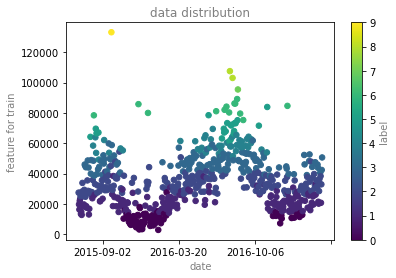

In [565]:
x = train_booking_total.values
y = train_label.set_index('arrival_date').values
fig, ax = plt.subplots()
pts = ax.scatter(x[:,0], x[:,1], c=y, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)
# format the plot
format_plot(ax, 'data distribution')
# cb.set_ticks([]) 
cb.set_label('label', color='gray')

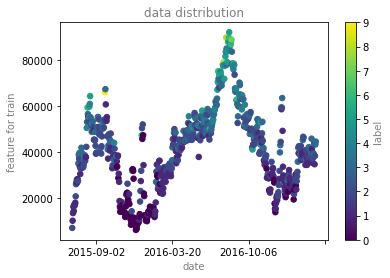

In [566]:
x = train_date_revenue.values
y = train_label.set_index('arrival_date').values
fig, ax = plt.subplots()
pts = ax.scatter(x[:,0], x[:,1], c=y, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)
# format the plot
format_plot(ax, 'data distribution')
# cb.set_ticks([]) 
cb.set_label('label', color='gray')

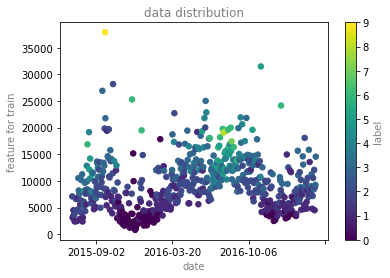

In [567]:
x = train_adr_sum.values
y = train_label.set_index('arrival_date').values
fig, ax = plt.subplots()
pts = ax.scatter(x[:,0], x[:,1], c=y, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)
# format the plot
format_plot(ax, 'data distribution')
# cb.set_ticks([]) 
cb.set_label('label', color='gray')

# learning

In [249]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [423]:
x.shape

(640, 1)

In [426]:
y.shape

(640,)

In [427]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [428]:
x_train.shape

(512, 1)

In [429]:
x_test.shape

(128, 1)

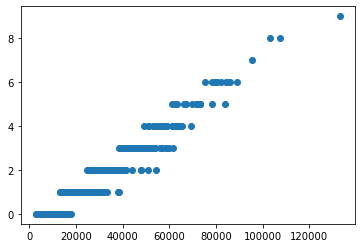

In [430]:
plt.scatter(x_train,y_train)

In [262]:
?svm.SVC

In [310]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression

## Linear Regression 

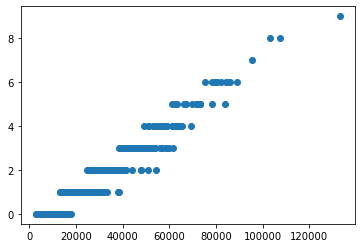

In [482]:
# 用每筆預約付的總金額拿來train
x = train_booking_total.set_index('arrival_date').values
y = train_label.set_index('arrival_date').values
y = np.reshape(y,(640,))
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
plt.scatter(x_train,y_train)

In [483]:
clf = LinearRegression().fit(x_train,y_train)

In [484]:
y_predict = clf.predict(x_test)

In [485]:
y.shape

(640,)

In [472]:
?plt.plot

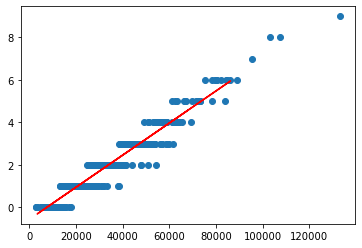

In [486]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_predict,color='red')

In [489]:
err_func(transfer_label(y_predict),y_test)

0.1171875

In [490]:
transfer_label(y_predict)

array([0., 2., 1., 3., 3., 0., 1., 2., 3., 2., 1., 1., 2., 1., 2., 3., 3.,
       2., 2., 2., 4., 2., 3., 0., 0., 1., 1., 2., 5., 3., 2., 0., 2., 3.,
       3., 4., 1., 6., 0., 3., 2., 0., 3., 2., 2., 3., 2., 2., 2., 0., 3.,
       2., 2., 2., 2., 2., 3., 2., 0., 2., 1., 0., 1., 2., 3., 1., 2., 1.,
       2., 3., 1., 1., 2., 0., 2., 0., 2., 3., 1., 1., 0., 4., 5., 1., 4.,
       0., 2., 4., 4., 1., 2., 3., 0., 1., 1., 2., 1., 2., 2., 4., 2., 2.,
       0., 6., 2., 2., 0., 4., 2., 1., 3., 5., 2., 1., 1., 3., 3., 4., 2.,
       3., 1., 2., 3., 6., 1., 1., 5., 5.])

In [491]:
y_test

array([0., 2., 1., 3., 2., 0., 1., 2., 3., 3., 1., 1., 2., 1., 3., 3., 4.,
       2., 1., 2., 4., 2., 3., 0., 0., 1., 1., 2., 5., 3., 2., 0., 2., 3.,
       3., 4., 1., 6., 0., 3., 2., 0., 3., 2., 1., 3., 1., 2., 2., 0., 3.,
       2., 2., 2., 2., 0., 3., 2., 0., 1., 1., 0., 1., 2., 3., 1., 2., 1.,
       2., 3., 1., 1., 3., 0., 2., 0., 2., 3., 1., 1., 0., 4., 5., 1., 4.,
       1., 2., 4., 5., 1., 2., 3., 0., 1., 1., 2., 1., 2., 2., 4., 2., 2.,
       0., 6., 2., 2., 0., 4., 2., 2., 3., 5., 2., 1., 1., 3., 3., 4., 2.,
       3., 1., 2., 3., 6., 1., 2., 5., 5.])

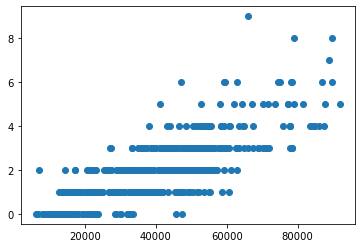

In [492]:
# 用每日的總adr拿來train
x = train_date_revenue.set_index('date').values
y = train_label.set_index('arrival_date').values
y = np.reshape(y,(640,))
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
plt.scatter(x_train,y_train)

In [494]:
clf = LinearRegression().fit(x_train,y_train)

In [495]:
y_predict = clf.predict(x_test)

In [497]:
err_func(transfer_label(y_predict),y_test)

0.6015625

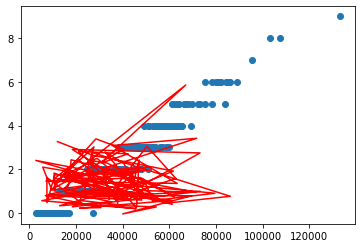

In [568]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_predict,color='red')

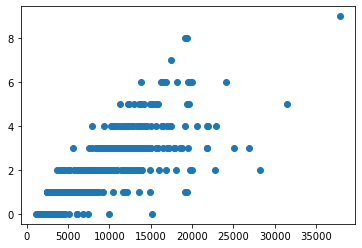

In [569]:
# 用adr groupby date拿來train
x = train_adr_sum.set_index('arrival_date').values
y = train_label.set_index('arrival_date').values
y = np.reshape(y,(640,))
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
plt.scatter(x_train,y_train)

In [570]:
clf = LinearRegression().fit(x_train,y_train)

In [571]:
y_predict = clf.predict(x_test)

In [572]:
err_func(transfer_label(y_predict),y_test)

0.6640625

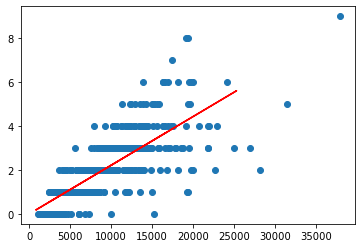

In [573]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_predict,color='red')

# Linear Regression with Cross Validation

In [524]:
# 用每筆預約付的總金額拿來train
x = train_booking_total.set_index('arrival_date').values
y = train_label.set_index('arrival_date').values
y = np.reshape(y,(640,))

In [526]:
from sklearn.model_selection import KFold

In [528]:
kf = KFold(n_splits=5)
err = []
for train_index,test_index in kf.split(x):
    clf = LinearRegression().fit(x[train_index],y[train_index])
    y_predict = clf.predict(x[test_index])
    err.append(err_func(transfer_label(y_predict),y[test_index]))

In [529]:
err

[0.265625, 0.078125, 0.1953125, 0.1328125, 0.109375]

In [532]:
#Ecv
sum(err)/5

0.15625

In [533]:
1 - sum(err)/5

0.84375

# Testing

In [612]:
train = pd.read_csv('./train.csv')
train_label = pd.read_csv('./train_label.csv')
x,y = preprocess(train,train_label)

In [614]:
# test = pd.read_csv('./test.csv')
# test_nolabel = pd.read_csv('./test_nolabel.csv')
# x_test,notuse_y = preprocess(test,train_label,False)

In [615]:
# import copy
# # x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
# x_train = copy.deepcopy(x)
# y_train = copy.deepcopy(y)
# clf = LinearRegression().fit(x_train,y_train)
# y_predict = clf.predict(x_test)
# y_out = transfer_label(y_predict)

In [602]:
len(y_out)

128

In [598]:
test_nolabel = pd.read_csv('./test_nolabel.csv')
test_nolabel

,arrival_date
0,2017-04-01
1,2017-04-02
2,2017-04-03
3,2017-04-04
4,2017-04-05
...,...
148,2017-08-27
149,2017-08-28
150,2017-08-29
151,2017-08-30


# function

In [5]:
def combine_arrival_date(x_data):
    #將arrival_date做出來
    day_to_str = {}
    for i in range(1,32):
        if i<10:
            day_to_str[str(i)]='0'+str(i)
        else:
            day_to_str[str(i)]=str(i)
    x_data['arrival_date_year'] = x_data['arrival_date_year'].astype(str)
    x_data['arrival_date_month'] = x_data['arrival_date_month'].map({'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'})
    x_data['arrival_date_day_of_month'] = x_data['arrival_date_day_of_month'].astype(str).map(day_to_str)
    x_data['arrival_date'] = x_data['arrival_date_year'] + '-' + x_data['arrival_date_month'] + '-' + x_data['arrival_date_day_of_month']
    # x_data.drop(['arrival_date_year','arrival_date_day_of_month'],axis=1,inplace=True)
    return x_data

In [6]:
def err_func(y_pred,y_test):
    summ = 0.0
    for i in range(0,y_pred.shape[0]):
        summ = summ + abs(y_pred[i]-y_test[i])
    err = summ/y_pred.shape[0]
    return err

In [7]:
def transfer_label(y_pred):
    label = []
    for x in y_pred:
        temp = round(x)
        if temp > 9:
            temp = 9
        elif temp < 0:
            temp = 0
        label.append(float(temp))
    return np.array(label)

In [8]:
def preprocess_x(x_data,is_train=True):
    # 丟掉 canceled 且 no deposit 的資料
    if(is_train):
        x_data.drop(x_data[(x_data['is_canceled']==1)&(x_data['deposit_type']=='No Deposit')].index,inplace=True)
    x_data = combine_arrival_date(x_data)
    if(is_train):
        x_data['date_difference'] = (pd.to_datetime(x_data['reservation_status_date']) - pd.to_datetime(x_data['arrival_date']) + datetime.timedelta(days=1))
    x_data['stays_total_nights'] = x_data['stays_in_week_nights'] + x_data['stays_in_weekend_nights']
    if(is_train):
        x_data['booking_total_revenue'] = np.where(x_data['is_canceled']==0,(x_data['stays_total_nights']+1)*x_data['adr'],x_data['adr'])
    else:
        x_data['booking_total_revenue'] = (x_data['stays_total_nights']+1)*x_data['adr']
    train_booking_total_tmp = x_data.groupby('arrival_date').sum()
    train_booking_total_tmp['arrival_date'] = train_booking_total_tmp.index
    train_booking_total = train_booking_total_tmp[['arrival_date','booking_total_revenue']]
    x = train_booking_total.set_index('arrival_date').values
#     y = y_data.set_index('arrival_date').values
#     y = np.reshape(y,(640,))
    return x,x_data
def preprocess_y(y_data):
    y = y_data.set_index('arrival_date').values
    y = np.reshape(y,(640,))
    return y

In [9]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# 先預測 booking total 或 adr

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.decomposition import PCA
import datetime,time

In [11]:
# function
def pre_adr_model(train,test):
    x,booking_total = preprocess_x(train)
    test = combine_arrival_date(test)
    # 丟掉一些沒用到的 features
    booking_total.drop(['country','company','is_canceled','reservation_status','reservation_status_date','date_difference','stays_total_nights'],axis=1,inplace=True)
    test.drop(['country','company'],axis=1,inplace=True)
    # children 補眾數(補 0)
    booking_total['children'].fillna(0,inplace=True)
    # agent 沒有的補 0
    # booking_total['agent'].fillna(0,inplace=True)
    # test['agent'].fillna(0,inplace=True)
    booking_total.drop(['agent'],axis=1,inplace=True)
    test.drop(['agent'],axis=1,inplace=True)

    # datatype 轉成一樣
    booking_total.hotel =booking_total.hotel.astype('category')
    test.hotel = test.hotel.astype('category')
    booking_total.children = booking_total["children"].astype(int)
    test.children = test["children"].astype(int)
    # meal 的 undefined 和 SC 是一樣的
    booking_total['meal'].replace('Undefined','SC',inplace=True)
    test['meal'].replace('Undefined','SC',inplace=True)
    X_booking = pd.get_dummies(data=booking_total,columns=["hotel","arrival_date_week_number","arrival_date_year","arrival_date_day_of_month","arrival_date_month","meal","market_segment",
    "distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"])
    test = pd.get_dummies(data=test,columns=["hotel","arrival_date_week_number","arrival_date_year","arrival_date_day_of_month","arrival_date_month","meal","market_segment",
    "distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"])
    X_booking['assigned_room_type_P'] = 0
    X_booking['reserved_room_type_P'] = 0
    test['reserved_room_type_L'] = 0
    test['arrival_date_month_01'] = 0
    test['arrival_date_month_02'] = 0
    test['arrival_date_month_03'] = 0
    test['arrival_date_month_09'] = 0
    test['arrival_date_month_10'] = 0
    test['arrival_date_month_11'] = 0
    test['arrival_date_month_12'] = 0
    test['distribution_channel_Undefined'] = 0
    X_booking_ret = copy.deepcopy(X_booking)
    test_ret = copy.deepcopy(test)
    X_booking.drop(['arrival_date','ID'],axis=1,inplace=True)
    test.drop(['arrival_date','ID'],axis=1,inplace=True)
    X = X_booking.drop(['booking_total_revenue','adr'],axis=1).values
    test = test.values
    Y = X_booking['adr']
    return X,Y,test,X_booking_ret,test_ret

In [15]:
import copy

In [16]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [17]:
X,Y,test_X,X_booking_ret,test_ret = pre_adr_model(train,test)

In [18]:
X_booking_ret.groupby('arrival_date').sum().drop(['ID','adr','booking_total_revenue'],axis=1).to_csv('train_new.csv')

In [19]:
test_ret.groupby('arrival_date').sum().drop(['ID'],axis=1).to_csv('test_new.csv')

In [478]:
x,booking_total = preprocess_x(train)
booking_total

,ID,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,date_difference,stays_total_nights,booking_total_revenue
0,0,Resort Hotel,0,342,07,27,0,0,2,0.0,...,Transient,-6.305161,0,0,Check-Out,2015-07-01,2015-07-01,1 days,0,-6.305161
1,1,City Hotel,0,257,07,27,0,2,1,0.0,...,Transient,75.052227,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,225.156681
2,2,City Hotel,0,257,07,27,0,2,2,0.0,...,Transient,74.546401,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,223.639203
3,3,City Hotel,0,257,07,27,0,2,2,0.0,...,Transient,76.376288,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,229.128863
4,4,City Hotel,0,257,07,27,0,2,2,0.0,...,Transient,49.411647,0,0,Check-Out,2015-07-03,2015-07-01,3 days,2,148.234941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91525,91525,Resort Hotel,0,72,03,13,3,7,2,0.0,...,Contract,79.453407,0,1,Check-Out,2017-04-10,2017-03-31,11 days,10,873.987482
91527,91527,Resort Hotel,0,28,03,13,0,2,2,0.0,...,Transient,-6.822102,0,0,Check-Out,2017-04-02,2017-03-31,3 days,2,-20.466305
91528,91528,Resort Hotel,0,2,03,13,0,1,2,0.0,...,Transient,90.814554,0,2,Check-Out,2017-04-01,2017-03-31,2 days,1,181.629107
91529,91529,Resort Hotel,0,30,03,13,3,7,2,0.0,...,Transient,38.135565,0,1,Check-Out,2017-04-10,2017-03-31,11 days,10,419.491216


In [479]:
test = combine_arrival_date(test)

In [480]:
# 看 train和 test 沒有共同有的 features
for feature in booking_total.columns:
    if feature not in test.columns:
        print(feature)

is_canceled
adr
reservation_status
reservation_status_date
date_difference
stays_total_nights
booking_total_revenue


In [481]:
#看 nan 數量
test.isna().sum()

ID                                    0
hotel                                 0
lead_time                             0
arrival_date_month                    0
arrival_date_week_number              0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              20
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3123
company                           26676
days_in_waiting_list                  0
customer_type                         0


In [482]:
# 看 nan 占比
test.apply(lambda x:sum(x.isnull()/len(x)),axis=0)

ID                                0.000000
hotel                             0.000000
lead_time                         0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000000
babies                            0.000000
meal                              0.000000
country                           0.000718
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent                             0.112100
company                           0.957536
days_in_wai

#### 觀察
* country : 數量太多
* agent : 有 miss
* company : miss 太多，直接drop

In [483]:
booking_total.apply(lambda x:sum(x.isnull()/len(x)),axis=0)

ID                                0.000000
hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000000
babies                            0.000000
meal                              0.000000
country                           0.006032
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent                             0.164412
company    

* train 的 children 能用補的
* 其他 drop 掉

In [484]:
# 丟掉一些沒用到的 features
booking_total.drop(['country','company','is_canceled','reservation_status','reservation_status_date','date_difference','stays_total_nights'],axis=1,inplace=True)
test.drop(['country','company'],axis=1,inplace=True)
# children 補眾數
booking_total['children'].fillna(booking_total['children'].mode()[0],inplace=True)
# agent 沒有的補 0
# booking_total['agent'].fillna(0,inplace=True)
# test['agent'].fillna(0,inplace=True)
booking_total.drop(['agent'],axis=1,inplace=True)
test.drop(['agent'],axis=1,inplace=True)

# datatype 轉成一樣
booking_total.hotel =booking_total.hotel.astype('category')
test.hotel = test.hotel.astype('category')
booking_total.children = booking_total["children"].astype(int)
test.children = test["children"].astype(int)
# meal 的 undefined 和 SC 是一樣的
booking_total['meal'].replace('Undefined','SC',inplace=True)
test['meal'].replace('Undefined','SC',inplace=True)

In [485]:
#再看一次 miss占比
booking_total.apply(lambda x:sum(x.isnull()/len(x)),axis=0)

ID                                0.0
hotel                             0.0
lead_time                         0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car_parking_spaces       0.0
total_of_special_requests         0.0
arrival_date                      0.0
booking_tota

In [486]:
X_booking = pd.get_dummies(data=booking_total,columns=["hotel","arrival_date_month","meal","market_segment",
"distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"])
test = pd.get_dummies(data=test,columns=["hotel","arrival_date_month","meal","market_segment",
"distribution_channel","reserved_room_type","assigned_room_type","deposit_type","customer_type"])

In [487]:
X_booking.drop(['arrival_date','ID'],axis=1,inplace=True)
test.drop(['arrival_date','ID'],axis=1,inplace=True)

In [488]:
test

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_I,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,75,13,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,208,13,4,10,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,12,13,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,76,13,2,5,3,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,9,13,2,4,2,2,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27854,108,35,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27855,194,35,2,5,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27856,17,35,0,3,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27857,191,35,2,5,2,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [489]:
A = set(X_booking.columns)
B = set(test.columns)
A ^ B

{'adr',
 'arrival_date_month_01',
 'arrival_date_month_02',
 'arrival_date_month_03',
 'arrival_date_month_09',
 'arrival_date_month_10',
 'arrival_date_month_11',
 'arrival_date_month_12',
 'assigned_room_type_P',
 'booking_total_revenue',
 'distribution_channel_Undefined',
 'reserved_room_type_L',
 'reserved_room_type_P'}

In [490]:
A - B

{'adr',
 'arrival_date_month_01',
 'arrival_date_month_02',
 'arrival_date_month_03',
 'arrival_date_month_09',
 'arrival_date_month_10',
 'arrival_date_month_11',
 'arrival_date_month_12',
 'booking_total_revenue',
 'distribution_channel_Undefined',
 'reserved_room_type_L'}

In [491]:
B - A

{'assigned_room_type_P', 'reserved_room_type_P'}

In [492]:
X_booking['assigned_room_type_P'] = 0
X_booking['reserved_room_type_P'] = 0
test['reserved_room_type_L'] = 0
test['arrival_date_month_01'] = 0
test['arrival_date_month_02'] = 0
test['arrival_date_month_03'] = 0
test['arrival_date_month_09'] = 0
test['arrival_date_month_10'] = 0
test['arrival_date_month_11'] = 0
test['arrival_date_month_12'] = 0
test['distribution_channel_Undefined'] = 0

In [493]:
A = set(X_booking.columns)
B = set(test.columns)
A ^ B

{'adr', 'booking_total_revenue'}

In [494]:
X = X_booking.drop(['booking_total_revenue','adr'],axis=1).values
test = test.values

In [495]:
X

array([[342,  27,   0, ...,   0,   0,   0],
       [257,  27,   0, ...,   0,   0,   0],
       [257,  27,   0, ...,   0,   0,   0],
       ...,
       [  2,  13,   0, ...,   0,   0,   0],
       [ 30,  13,   3, ...,   0,   0,   0],
       [  1,  13,   0, ...,   0,   0,   0]], dtype=int64)

In [496]:
# Y = X_booking['booking_total_revenue']
# Y
Y = X_booking['adr']
Y

0        -6.305161
1        75.052227
2        74.546401
3        76.376288
4        49.411647
           ...    
91525    79.453407
91527    -6.822102
91528    90.814554
91529    38.135565
91530    58.196470
Name: adr, Length: 70457, dtype: float64

In [497]:
print(X.shape,Y.shape)

(70457, 72) (70457,)


In [498]:
print(test.shape)

(27859, 72)


#### Linear Regression

In [405]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
#切 validation set 希望每次都切一樣(random state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
clf = LinearRegression().fit(X_train,Y_train)
Y_val_predict = clf.predict(X_test)
mse = np.mean((Y_val_predict - Y_test) ** 2)
r_squared = clf.score(X_test, Y_test)
adj_r_squared = r_squared - (1 - r_squared) * (X_test.shape[1] / (X_test.shape[0] - X_test.shape[1] - 1))
print('mean square error:',mse)
print('r2 score:',r_squared)
print('adjusted r2 score:',adj_r_squared)
# ******* predict adr、no agent ***********
# mean square error: 991.3508848502124
# r2 score: 0.5616839513644333
# adjusted r2 score: 0.5594328096637584
# ******* predict adr、with agent ***********
# mean square error: 989.442687966173
# r2 score: 0.5625276418589016
# adjusted r2 score: 0.5602494650758869

mean square error: 991.3508848502124
r2 score: 0.5616839513644333
adjusted r2 score: 0.5594328096637584


* Q: 真的有那麼準嗎?
* Ans: 不小心把bookings total revenue 一起拿下去練了

#### Random Forest

In [459]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
clf = RandomForestRegressor(oob_score=True).fit(X_train,Y_train)
Y_val_predict = clf.predict(X_test)
mse = np.mean((Y_val_predict - Y_test) ** 2)
r_squared = clf.score(X_test, Y_test)
adj_r_squared = r_squared - (1 - r_squared) * (X_test.shape[1] / (X_test.shape[0] - X_test.shape[1] - 1))
print('mean square error:',mse)
print('r2 score:',r_squared)
print('adjusted r2 score:',adj_r_squared)
print('out of bag score:',clf.oob_score_)
# ******* predict adr、no agent ***********
# mean square error: 478.88158210822274
# r2 score: 0.7882672159356171
# adjusted r2 score: 0.7871797802802468
# out of bag score: 0.6700381618264833
# ******* predict adr、with agent ***********
# mean square error: 365.28636929916394
# r2 score: 0.8384922226242489
# adjusted r2 score: 0.8376511562989223
# out of bag score: 0.6815365460892584
# ******* predict adr、with agent，cut half features ***********
# mean square error: 481.73404086850013
# r2 score: 0.7870060293347805
# adjusted r2 score: 0.786597124527616
# out of bag score: 0.662616586136143

mean square error: 481.73404086850013
r2 score: 0.7870060293347805
adjusted r2 score: 0.786597124527616
out of bag score: 0.662616586136143


In [407]:
feature_importances = pd.Series(data = clf.feature_importances_,index = X_booking.drop(['booking_total_revenue','adr'],axis=1).columns)
feature_importances.sort_values()

reserved_room_type_P              0.000000e+00
assigned_room_type_P              0.000000e+00
distribution_channel_Undefined    9.595639e-08
reserved_room_type_L              8.358756e-06
market_segment_Aviation           5.544686e-05
                                      ...     
deposit_type_Non Refund           5.093018e-02
market_segment_Online TA          5.431613e-02
arrival_date_month_08             7.006804e-02
arrival_date_week_number          8.718516e-02
lead_time                         1.378750e-01
Length: 72, dtype: float64

In [412]:
todrop = feature_importances.sort_values()[:'reserved_room_type_G'].index

In [452]:
X_booking.drop(todrop,axis=1,inplace=True)
test.drop(todrop,axis=1,inplace=True)
X = X_booking.drop(['booking_total_revenue','adr'],axis=1).values
test = test.values
Y = X_booking['adr']

In [457]:
len(X_booking.columns)

29

In [460]:
len(clf.feature_importances_)

27

<AxesSubplot:>

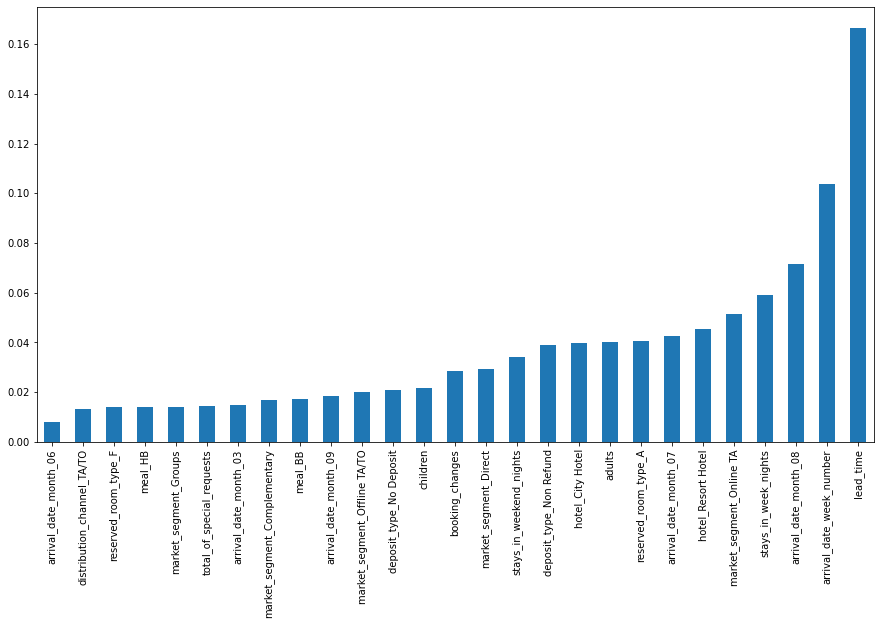

In [461]:
feature_importances = pd.Series(data = clf.feature_importances_,index = X_booking.drop(['booking_total_revenue','adr'],axis=1).columns)
plt.figure(figsize=(15, 8))
feature_importances.sort_values().plot(kind='bar')

#### adaboost

In [501]:
from sklearn.ensemble import AdaBoostRegressor
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
rgr = AdaBoostRegressor(n_estimators=100).fit(X_train,Y_train)
Y_val_predict = rgr.predict(X_test)
mse = np.mean((Y_val_predict - Y_test) ** 2)
r_squared = rgr.score(X_test, Y_test)
adj_r_squared = r_squared - (1 - r_squared) * (X_test.shape[1] / (X_test.shape[0] - X_test.shape[1] - 1))
print('mean square error:',mse)
print('r2 score:',r_squared)
print('adjusted r2 score:',adj_r_squared)

mean square error: 1785.4753165638558
r2 score: 0.210569640222943
adjusted r2 score: 0.2065152150924809


# DNN

In [259]:
import tensorflow as tf

In [261]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import plot_model,to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LambdaCallback
import copy

In [391]:
train = pd.read_csv('./train.csv')
train_label = pd.read_csv('./train_label.csv')
test = pd.read_csv('./test.csv')

In [392]:
not_use,not_use2,not_use3,X_preprocess,test_preprocess = pre_adr_model(train,test)
#X,Y,test,X_booking,test_booking = pre_adr_model(train,test)

In [393]:
X_tmp = X_preprocess.groupby('arrival_date').sum()
test_X_tmp = test_preprocess.groupby('arrival_date').sum()
#leadtime 先保留 (lead time 去掉)
X_tmp.drop(['ID','agent','adr','booking_total_revenue'],axis=1,inplace=True)
test_X_tmp.drop(['ID','agent'],axis=1,inplace=True)

In [394]:
X = X_tmp.values
test_X = test_X_tmp.values

In [395]:
Y = train_label.drop(['arrival_date'],axis=1).values
Y = np.reshape(Y,(Y.shape[0],))
Y.shape

(640,)

In [396]:
X.shape

(640, 72)

In [397]:
test_X.shape

(153, 72)

In [398]:
Y.shape

(640,)

### 5 fold DNN

In [332]:
from tensorflow.keras import regularizers

In [333]:
def create_new_model():
    KB.clear_session()
    model = Sequential()
    model.add(Dense(units=256,input_shape=(71,),activation='relu',kernel_initializer='normal'))
    #model.add(Dropout(0.2))
    model.add(Dense(units=512,activation='relu',kernel_initializer='normal'))
    #model.add(Dropout(0.2))
    # model.add(Dense(units=1024,activation='relu',kernel_initializer='normal'))
    # model.add(Dense(units=512,activation='relu',kernel_initializer='normal'))
    model.add(Dense(units=256,activation='relu',kernel_initializer='normal'))
    model.add(Dense(units=64,activation='relu',kernel_initializer='normal'))
    model.add(Dense(units=1,activation='linear',kernel_initializer='normal'))
    plot_model(model,to_file='./static/model.jpg',show_shapes=True)
    return model

In [369]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
    
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = './saved_models/'
fold_var = 1
def soft_acc(y_true, y_pred):
    return KB.mean(KB.equal(KB.round(y_true),KB.round(y_pred)))
    

for train_index, val_index in kf.split(X):
    training_data = X[train_index]
    training_label = Y[train_index]
    validation_data = X[val_index]
    validation_label = Y[val_index]

    # CREATE NEW MODEL
    model = create_new_model()
    # COMPILE NEW MODEL
    model.compile(loss='mean_absolute_error',
                  optimizer='adam',
                  metrics=[soft_acc])

    # CREATE CALLBACK
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+'model_'+str(fold_var)+'.h5', 
                                                    monitor='val_soft_acc', 
                                                    verbose=1, 
                                                    save_best_only=True, 
                                                    mode='max')
    best_acc = 0
    def saveModel(epoch,logs):
        global best_acc
        val_acc = logs['val_soft_acc']
        acc = logs['soft_acc']
        tmp = (val_acc + acc)/2
        if tmp >= best_acc:
            best_acc = tmp
            model.save_weights(save_dir+'no_lead_model_'+str(fold_var)+'.h5')
            print('best occur in epoch',epoch)
    callbacks_list = [LambdaCallback(on_epoch_end=saveModel)]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    train_history = model.fit(training_data,
                              training_label,
                              epochs=1000,
                              batch_size=100,
                              callbacks=callbacks_list,
                              validation_data=(validation_data,validation_label))
    #PLOT HISTORY
    #:
    #:
    # LOAD BEST MODEL to evaluate the performance of the model
    model = create_new_model()
    model.compile(loss='mean_absolute_error',
                  optimizer='adam',
                  metrics=[soft_acc])
    model.load_weights("./saved_models/no_lead_model_"+str(fold_var)+".h5")

    results = model.evaluate(validation_data,validation_label)
    results = dict(zip(model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['soft_acc'])
    VALIDATION_LOSS.append(results['loss'])

    KB.clear_session()

    fold_var += 1

Train on 512 samples, validate on 128 samples
Epoch 1/1000
512/512 [==============================] - 0s 415us/sample - loss: 15.3588 - soft_acc: 0.0511 - val_loss: 8.1160 - val_soft_acc: 0.0000e+00
Epoch 2/1000
512/512 [==============================] - 0s 67us/sample - loss: 3.9810 - soft_acc: 0.1850 - val_loss: 2.7877 - val_soft_acc: 0.0150
Epoch 3/1000
512/512 [==============================] - 0s 67us/sample - loss: 2.1549 - soft_acc: 0.2539 - val_loss: 1.8033 - val_soft_acc: 0.0886
Epoch 4/1000
512/512 [==============================] - 0s 40us/sample - loss: 1.5371 - soft_acc: 0.2722 - val_loss: 1.5307 - val_soft_acc: 0.2529
Epoch 5/1000
512/512 [==============================] - 0s 68us/sample - loss: 1.1630 - soft_acc: 0.3917 - val_loss: 0.9589 - val_soft_acc: 0.4071
Epoch 6/1000
512/512 [==============================] - 0s 51us/sample - loss: 0.7837 - soft_acc: 0.5011 - val_loss: 0.9106 - val_soft_acc: 0.3993
Epoch 7/1000
512/512 [==============================] - 0s 21us/sa

Epoch 97/1000
512/512 [==============================] - 0s 31us/sample - loss: 0.3150 - soft_acc: 0.7744 - val_loss: 0.5878 - val_soft_acc: 0.5586
Epoch 98/1000
512/512 [==============================] - 0s 16us/sample - loss: 0.3347 - soft_acc: 0.7994 - val_loss: 0.5351 - val_soft_acc: 0.4843
Epoch 99/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.3104 - soft_acc: 0.8294 - val_loss: 0.5971 - val_soft_acc: 0.5300
Epoch 100/1000
512/512 [==============================] - 0s 51us/sample - loss: 0.3343 - soft_acc: 0.7900 - val_loss: 0.5500 - val_soft_acc: 0.6271
Epoch 101/1000
512/512 [==============================] - 0s 18us/sample - loss: 0.3303 - soft_acc: 0.7872 - val_loss: 0.5470 - val_soft_acc: 0.5500
Epoch 102/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.3447 - soft_acc: 0.8100 - val_loss: 0.5633 - val_soft_acc: 0.5607
Epoch 103/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.3345 - soft_acc: 0.8094 - 

512/512 [==============================] - 0s 37us/sample - loss: 0.3300 - soft_acc: 0.8067 - val_loss: 0.5814 - val_soft_acc: 0.5150
Epoch 206/1000
512/512 [==============================] - 0s 20us/sample - loss: 0.2588 - soft_acc: 0.8506 - val_loss: 0.6060 - val_soft_acc: 0.4821
Epoch 207/1000
512/512 [==============================] - 0s 41us/sample - loss: 0.2409 - soft_acc: 0.8744 - val_loss: 0.6408 - val_soft_acc: 0.5100
Epoch 208/1000
512/512 [==============================] - 0s 16us/sample - loss: 0.2479 - soft_acc: 0.8417 - val_loss: 0.6005 - val_soft_acc: 0.4536
Epoch 209/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.2330 - soft_acc: 0.8439 - val_loss: 0.5715 - val_soft_acc: 0.5407
Epoch 210/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.3011 - soft_acc: 0.8517 - val_loss: 0.5827 - val_soft_acc: 0.5893
Epoch 211/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.2577 - soft_acc: 0.8800 - val_loss: 0.

Epoch 260/1000
512/512 [==============================] - 0s 10us/sample - loss: 0.2447 - soft_acc: 0.8594 - val_loss: 0.6132 - val_soft_acc: 0.4357
Epoch 261/1000
512/512 [==============================] - 0s 51us/sample - loss: 0.2483 - soft_acc: 0.8572 - val_loss: 0.6843 - val_soft_acc: 0.4621
Epoch 262/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.2648 - soft_acc: 0.8283 - val_loss: 0.6887 - val_soft_acc: 0.3907
Epoch 263/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.2472 - soft_acc: 0.8506 - val_loss: 0.6800 - val_soft_acc: 0.4314
Epoch 264/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.2241 - soft_acc: 0.8928 - val_loss: 0.6696 - val_soft_acc: 0.4464
Epoch 265/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.2297 - soft_acc: 0.8917 - val_loss: 0.6651 - val_soft_acc: 0.4621
Epoch 266/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.2015 - soft_acc: 0.9133

512/512 [==============================] - 0s 13us/sample - loss: 0.2376 - soft_acc: 0.8861 - val_loss: 0.7214 - val_soft_acc: 0.3400
Epoch 370/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.2006 - soft_acc: 0.9300 - val_loss: 0.6544 - val_soft_acc: 0.3979
Epoch 371/1000
512/512 [==============================] - 0s 10us/sample - loss: 0.1911 - soft_acc: 0.9178 - val_loss: 0.6665 - val_soft_acc: 0.4721
Epoch 372/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.1720 - soft_acc: 0.9139 - val_loss: 0.7470 - val_soft_acc: 0.4271
Epoch 373/1000
512/512 [==============================] - 0s 30us/sample - loss: 0.2094 - soft_acc: 0.9044 - val_loss: 0.6239 - val_soft_acc: 0.5000
Epoch 374/1000
512/512 [==============================] - 0s 33us/sample - loss: 0.1987 - soft_acc: 0.9283 - val_loss: 0.6916 - val_soft_acc: 0.4629
Epoch 375/1000
512/512 [==============================] - 0s 24us/sample - loss: 0.1766 - soft_acc: 0.9278 - val_loss: 0.

512/512 [==============================] - 0s 16us/sample - loss: 0.1858 - soft_acc: 0.9300 - val_loss: 0.7107 - val_soft_acc: 0.4550
Epoch 425/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1977 - soft_acc: 0.9261 - val_loss: 0.7403 - val_soft_acc: 0.3986
Epoch 426/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.1725 - soft_acc: 0.9517 - val_loss: 0.6432 - val_soft_acc: 0.5029
Epoch 427/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1656 - soft_acc: 0.9378 - val_loss: 0.6736 - val_soft_acc: 0.5007
Epoch 428/1000
512/512 [==============================] - 0s 17us/sample - loss: 0.1703 - soft_acc: 0.9189 - val_loss: 0.7545 - val_soft_acc: 0.4321
Epoch 429/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1823 - soft_acc: 0.9250 - val_loss: 0.6492 - val_soft_acc: 0.4114
Epoch 430/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1915 - soft_acc: 0.9417 - val_loss: 0.

512/512 [==============================] - 0s 12us/sample - loss: 0.1739 - soft_acc: 0.9206 - val_loss: 0.6617 - val_soft_acc: 0.4800
Epoch 480/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.1718 - soft_acc: 0.9450 - val_loss: 0.6830 - val_soft_acc: 0.4650
Epoch 481/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.1481 - soft_acc: 0.9650 - val_loss: 0.7772 - val_soft_acc: 0.4450
Epoch 482/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.2195 - soft_acc: 0.8994 - val_loss: 0.7919 - val_soft_acc: 0.4014
Epoch 483/1000
512/512 [==============================] - 0s 25us/sample - loss: 0.2203 - soft_acc: 0.9067 - val_loss: 0.6623 - val_soft_acc: 0.5157
Epoch 484/1000
512/512 [==============================] - 0s 38us/sample - loss: 0.1641 - soft_acc: 0.9450 - val_loss: 0.6689 - val_soft_acc: 0.4114
Epoch 485/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1587 - soft_acc: 0.9461 - val_loss: 0.

512/512 [==============================] - 0s 20us/sample - loss: 0.1391 - soft_acc: 0.9750 - val_loss: 0.6964 - val_soft_acc: 0.4136
Epoch 589/1000
512/512 [==============================] - 0s 39us/sample - loss: 0.1391 - soft_acc: 0.9667 - val_loss: 0.7660 - val_soft_acc: 0.3936
Epoch 590/1000
512/512 [==============================] - 0s 16us/sample - loss: 0.1358 - soft_acc: 0.9700 - val_loss: 0.7783 - val_soft_acc: 0.4321
Epoch 591/1000
512/512 [==============================] - 0s 42us/sample - loss: 0.1233 - soft_acc: 0.9456 - val_loss: 0.7189 - val_soft_acc: 0.3907
Epoch 592/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.1156 - soft_acc: 0.9717 - val_loss: 0.7501 - val_soft_acc: 0.4629
Epoch 593/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1198 - soft_acc: 0.9750 - val_loss: 0.7477 - val_soft_acc: 0.4657
Epoch 594/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.1133 - soft_acc: 0.9644 - val_loss: 0.

512/512 [==============================] - 0s 34us/sample - loss: 0.1265 - soft_acc: 0.9733 - val_loss: 0.7434 - val_soft_acc: 0.3964
Epoch 644/1000
512/512 [==============================] - 0s 23us/sample - loss: 0.1257 - soft_acc: 0.9489 - val_loss: 0.7365 - val_soft_acc: 0.4529
Epoch 645/1000
512/512 [==============================] - 0s 39us/sample - loss: 0.1223 - soft_acc: 0.9667 - val_loss: 0.7675 - val_soft_acc: 0.3836
Epoch 646/1000
512/512 [==============================] - 0s 18us/sample - loss: 0.1274 - soft_acc: 0.9628 - val_loss: 0.7972 - val_soft_acc: 0.3964
Epoch 647/1000
512/512 [==============================] - ETA: 0s - loss: 0.1581 - soft_acc: 0.95 - 0s 42us/sample - loss: 0.1360 - soft_acc: 0.9511 - val_loss: 0.8205 - val_soft_acc: 0.3707
Epoch 648/1000
512/512 [==============================] - 0s 16us/sample - loss: 0.1549 - soft_acc: 0.9683 - val_loss: 0.7697 - val_soft_acc: 0.3786
Epoch 649/1000
512/512 [==============================] - 0s 46us/sample - loss

512/512 [==============================] - 0s 29us/sample - loss: 0.1156 - soft_acc: 0.9750 - val_loss: 0.7416 - val_soft_acc: 0.4314
Epoch 751/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1097 - soft_acc: 0.9406 - val_loss: 0.7571 - val_soft_acc: 0.4700
Epoch 752/1000
512/512 [==============================] - 0s 32us/sample - loss: 0.1243 - soft_acc: 0.9683 - val_loss: 0.7158 - val_soft_acc: 0.4829
Epoch 753/1000
512/512 [==============================] - 0s 23us/sample - loss: 0.1241 - soft_acc: 0.9733 - val_loss: 0.7754 - val_soft_acc: 0.4064
Epoch 754/1000
512/512 [==============================] - 0s 37us/sample - loss: 0.1087 - soft_acc: 0.9833 - val_loss: 0.7785 - val_soft_acc: 0.4321
Epoch 755/1000
512/512 [==============================] - 0s 20us/sample - loss: 0.1197 - soft_acc: 0.9850 - val_loss: 0.8489 - val_soft_acc: 0.4093
Epoch 756/1000
512/512 [==============================] - 0s 42us/sample - loss: 0.1999 - soft_acc: 0.9317 - val_loss: 0.

512/512 [==============================] - 0s 29us/sample - loss: 0.0931 - soft_acc: 0.9506 - val_loss: 0.7267 - val_soft_acc: 0.4721
Epoch 806/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.1063 - soft_acc: 0.9850 - val_loss: 0.6954 - val_soft_acc: 0.4207
Epoch 807/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1037 - soft_acc: 0.9867 - val_loss: 0.6987 - val_soft_acc: 0.4700
Epoch 808/1000
512/512 [==============================] - 0s 22us/sample - loss: 0.1078 - soft_acc: 0.9867 - val_loss: 0.7124 - val_soft_acc: 0.4593
Epoch 809/1000
512/512 [==============================] - 0s 40us/sample - loss: 0.1017 - soft_acc: 0.9867 - val_loss: 0.7527 - val_soft_acc: 0.4543
Epoch 810/1000
512/512 [==============================] - 0s 19us/sample - loss: 0.0878 - soft_acc: 0.9867 - val_loss: 0.6870 - val_soft_acc: 0.4900
Epoch 811/1000
512/512 [==============================] - 0s 43us/sample - loss: 0.0989 - soft_acc: 0.9833 - val_loss: 0.

512/512 [==============================] - 0s 29us/sample - loss: 0.0984 - soft_acc: 0.9833 - val_loss: 0.7327 - val_soft_acc: 0.4750
Epoch 861/1000
512/512 [==============================] - 0s 24us/sample - loss: 0.0941 - soft_acc: 0.9817 - val_loss: 0.7363 - val_soft_acc: 0.4029
Epoch 862/1000
512/512 [==============================] - 0s 36us/sample - loss: 0.1066 - soft_acc: 0.9817 - val_loss: 0.7331 - val_soft_acc: 0.4879
Epoch 863/1000
512/512 [==============================] - 0s 21us/sample - loss: 0.1107 - soft_acc: 0.9783 - val_loss: 0.7038 - val_soft_acc: 0.5643
Epoch 864/1000
512/512 [==============================] - 0s 30us/sample - loss: 0.0975 - soft_acc: 0.9783 - val_loss: 0.7341 - val_soft_acc: 0.5414
Epoch 865/1000
512/512 [==============================] - 0s 19us/sample - loss: 0.0930 - soft_acc: 0.9850 - val_loss: 0.7572 - val_soft_acc: 0.4286
Epoch 866/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0895 - soft_acc: 0.9833 - val_loss: 0.

512/512 [==============================] - 0s 42us/sample - loss: 0.1302 - soft_acc: 0.9667 - val_loss: 0.7577 - val_soft_acc: 0.4107
Epoch 916/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.1167 - soft_acc: 0.9783 - val_loss: 0.7096 - val_soft_acc: 0.4493
Epoch 917/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1234 - soft_acc: 0.9611 - val_loss: 0.7018 - val_soft_acc: 0.5000
Epoch 918/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.0976 - soft_acc: 0.9833 - val_loss: 0.7113 - val_soft_acc: 0.4829
Epoch 919/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.0851 - soft_acc: 0.9728 - val_loss: 0.7437 - val_soft_acc: 0.5157
Epoch 920/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.0849 - soft_acc: 0.9900 - val_loss: 0.7050 - val_soft_acc: 0.5029
Epoch 921/1000
512/512 [==============================] - 0s 53us/sample - loss: 0.0968 - soft_acc: 0.9867 - val_loss: 0.

512/512 [==============================] - 0s 39us/sample - loss: 0.1474 - soft_acc: 0.9378 - val_loss: 0.6992 - val_soft_acc: 0.4621
Epoch 971/1000
512/512 [==============================] - 0s 21us/sample - loss: 0.1401 - soft_acc: 0.9683 - val_loss: 0.7031 - val_soft_acc: 0.4471
Epoch 972/1000
512/512 [==============================] - 0s 41us/sample - loss: 0.1932 - soft_acc: 0.8900 - val_loss: 0.7383 - val_soft_acc: 0.5029
Epoch 973/1000
512/512 [==============================] - 0s 31us/sample - loss: 0.1433 - soft_acc: 0.9667 - val_loss: 0.7609 - val_soft_acc: 0.4286
Epoch 974/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1503 - soft_acc: 0.9517 - val_loss: 0.6925 - val_soft_acc: 0.5179
Epoch 975/1000
512/512 [==============================] - 0s 50us/sample - loss: 0.1235 - soft_acc: 0.9733 - val_loss: 0.7146 - val_soft_acc: 0.4779
Epoch 976/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.1157 - soft_acc: 0.9833 - val_loss: 0.

512/512 [==============================] - 0s 14us/sample - loss: 0.4884 - soft_acc: 0.6506 - val_loss: 0.4406 - val_soft_acc: 0.6257
Epoch 71/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.4260 - soft_acc: 0.6606 - val_loss: 0.4317 - val_soft_acc: 0.7707
Epoch 72/1000
512/512 [==============================] - 0s 26us/sample - loss: 0.4816 - soft_acc: 0.6344 - val_loss: 0.4726 - val_soft_acc: 0.5629
Epoch 73/1000
512/512 [==============================] - 0s 32us/sample - loss: 0.4372 - soft_acc: 0.6617 - val_loss: 0.4733 - val_soft_acc: 0.5271
Epoch 74/1000
512/512 [==============================] - 0s 25us/sample - loss: 0.4209 - soft_acc: 0.7128 - val_loss: 0.5984 - val_soft_acc: 0.4371
Epoch 75/1000
512/512 [==============================] - 0s 34us/sample - loss: 0.4955 - soft_acc: 0.5844 - val_loss: 0.5863 - val_soft_acc: 0.4521
Epoch 76/1000
512/512 [==============================] - 0s 23us/sample - loss: 0.4219 - soft_acc: 0.6761 - val_loss: 0.4925 -

512/512 [==============================] - 0s 25us/sample - loss: 0.3253 - soft_acc: 0.8117 - val_loss: 0.4735 - val_soft_acc: 0.5150
Epoch 180/1000
512/512 [==============================] - 0s 34us/sample - loss: 0.3111 - soft_acc: 0.8144 - val_loss: 0.4728 - val_soft_acc: 0.5407
Epoch 181/1000
512/512 [==============================] - 0s 23us/sample - loss: 0.3403 - soft_acc: 0.7806 - val_loss: 0.4325 - val_soft_acc: 0.6643
Epoch 182/1000
512/512 [==============================] - 0s 38us/sample - loss: 0.3324 - soft_acc: 0.7889 - val_loss: 0.4235 - val_soft_acc: 0.7043
Epoch 183/1000
512/512 [==============================] - 0s 20us/sample - loss: 0.3330 - soft_acc: 0.8039 - val_loss: 0.4320 - val_soft_acc: 0.6157
Epoch 184/1000
512/512 [==============================] - 0s 42us/sample - loss: 0.3053 - soft_acc: 0.8067 - val_loss: 0.4764 - val_soft_acc: 0.5279
Epoch 185/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.3270 - soft_acc: 0.7956 - val_loss: 0.

512/512 [==============================] - 0s 43us/sample - loss: 0.3249 - soft_acc: 0.7956 - val_loss: 0.5231 - val_soft_acc: 0.4343
Epoch 287/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.3672 - soft_acc: 0.7878 - val_loss: 0.4137 - val_soft_acc: 0.7179
Epoch 288/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.3137 - soft_acc: 0.7639 - val_loss: 0.3942 - val_soft_acc: 0.6636
Epoch 289/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.3099 - soft_acc: 0.8417 - val_loss: 0.4322 - val_soft_acc: 0.6721
Epoch 290/1000
512/512 [==============================] - 0s 50us/sample - loss: 0.2918 - soft_acc: 0.8306 - val_loss: 0.4318 - val_soft_acc: 0.6621
Epoch 291/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.2853 - soft_acc: 0.8289 - val_loss: 0.4465 - val_soft_acc: 0.5957
Epoch 292/1000
512/512 [==============================] - 0s 50us/sample - loss: 0.3082 - soft_acc: 0.8222 - val_loss: 0.

512/512 [==============================] - 0s 18us/sample - loss: 0.2517 - soft_acc: 0.8950 - val_loss: 0.3869 - val_soft_acc: 0.6357
Epoch 393/1000
512/512 [==============================] - 0s 39us/sample - loss: 0.2643 - soft_acc: 0.8383 - val_loss: 0.4426 - val_soft_acc: 0.5979
Epoch 394/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.3201 - soft_acc: 0.7717 - val_loss: 0.4720 - val_soft_acc: 0.5907
Epoch 395/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.3002 - soft_acc: 0.7889 - val_loss: 0.4164 - val_soft_acc: 0.7050
Epoch 396/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.3124 - soft_acc: 0.8194 - val_loss: 0.3806 - val_soft_acc: 0.7707
Epoch 397/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.2697 - soft_acc: 0.7883 - val_loss: 0.3797 - val_soft_acc: 0.7143
Epoch 398/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.2885 - soft_acc: 0.7961 - val_loss: 0.

512/512 [==============================] - 0s 12us/sample - loss: 0.2151 - soft_acc: 0.9183 - val_loss: 0.3959 - val_soft_acc: 0.6821
Epoch 448/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.2323 - soft_acc: 0.8883 - val_loss: 0.4143 - val_soft_acc: 0.6950
Epoch 449/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.2585 - soft_acc: 0.8883 - val_loss: 0.4216 - val_soft_acc: 0.6079
Epoch 450/1000
512/512 [==============================] - 0s 50us/sample - loss: 0.2397 - soft_acc: 0.8639 - val_loss: 0.3926 - val_soft_acc: 0.7100
Epoch 451/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.2306 - soft_acc: 0.8828 - val_loss: 0.3860 - val_soft_acc: 0.7579
Epoch 452/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.2526 - soft_acc: 0.8867 - val_loss: 0.3816 - val_soft_acc: 0.7457
Epoch 453/1000
512/512 [==============================] - 0s 31us/sample - loss: 0.2409 - soft_acc: 0.8828 - val_loss: 0.

512/512 [==============================] - 0s 44us/sample - loss: 0.1860 - soft_acc: 0.9178 - val_loss: 0.3938 - val_soft_acc: 0.6714
Epoch 556/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.1863 - soft_acc: 0.9033 - val_loss: 0.4257 - val_soft_acc: 0.7071
Epoch 557/1000
512/512 [==============================] - 0s 32us/sample - loss: 0.1975 - soft_acc: 0.8883 - val_loss: 0.3726 - val_soft_acc: 0.6786
Epoch 558/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.2318 - soft_acc: 0.8861 - val_loss: 0.3830 - val_soft_acc: 0.7779
Epoch 559/1000
512/512 [==============================] - 0s 24us/sample - loss: 0.2513 - soft_acc: 0.9083 - val_loss: 0.3738 - val_soft_acc: 0.7114
Epoch 560/1000
512/512 [==============================] - 0s 35us/sample - loss: 0.2277 - soft_acc: 0.8689 - val_loss: 0.3783 - val_soft_acc: 0.7400
Epoch 561/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.2212 - soft_acc: 0.9000 - val_loss: 0.

512/512 [==============================] - 0s 37us/sample - loss: 0.1849 - soft_acc: 0.9433 - val_loss: 0.4088 - val_soft_acc: 0.6814
Epoch 664/1000
512/512 [==============================] - 0s 20us/sample - loss: 0.1875 - soft_acc: 0.9417 - val_loss: 0.3662 - val_soft_acc: 0.7121
Epoch 665/1000
512/512 [==============================] - 0s 39us/sample - loss: 0.2191 - soft_acc: 0.9161 - val_loss: 0.3723 - val_soft_acc: 0.7379
Epoch 666/1000
512/512 [==============================] - 0s 18us/sample - loss: 0.2424 - soft_acc: 0.8800 - val_loss: 0.4009 - val_soft_acc: 0.6971
Epoch 667/1000
512/512 [==============================] - 0s 43us/sample - loss: 0.2037 - soft_acc: 0.9128 - val_loss: 0.3991 - val_soft_acc: 0.7607
Epoch 668/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.2017 - soft_acc: 0.9317 - val_loss: 0.3607 - val_soft_acc: 0.7686
Epoch 669/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1699 - soft_acc: 0.9378 - val_loss: 0.

512/512 [==============================] - 0s 24us/sample - loss: 0.1626 - soft_acc: 0.9533 - val_loss: 0.3840 - val_soft_acc: 0.6843
Epoch 719/1000
512/512 [==============================] - 0s 35us/sample - loss: 0.1770 - soft_acc: 0.9467 - val_loss: 0.3737 - val_soft_acc: 0.7250
Epoch 720/1000
512/512 [==============================] - 0s 23us/sample - loss: 0.1747 - soft_acc: 0.9378 - val_loss: 0.3816 - val_soft_acc: 0.7071
Epoch 721/1000
512/512 [==============================] - 0s 34us/sample - loss: 0.1695 - soft_acc: 0.9467 - val_loss: 0.3887 - val_soft_acc: 0.7129
Epoch 722/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1817 - soft_acc: 0.9517 - val_loss: 0.4364 - val_soft_acc: 0.6621
Epoch 723/1000
512/512 [==============================] - 0s 19us/sample - loss: 0.2096 - soft_acc: 0.9317 - val_loss: 0.4427 - val_soft_acc: 0.6364
Epoch 724/1000
512/512 [==============================] - 0s 42us/sample - loss: 0.1977 - soft_acc: 0.9367 - val_loss: 0.

512/512 [==============================] - 0s 47us/sample - loss: 0.1810 - soft_acc: 0.9367 - val_loss: 0.3986 - val_soft_acc: 0.6514
Epoch 774/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1603 - soft_acc: 0.9517 - val_loss: 0.3914 - val_soft_acc: 0.7379
Epoch 775/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1765 - soft_acc: 0.9311 - val_loss: 0.4185 - val_soft_acc: 0.6236
Epoch 776/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1768 - soft_acc: 0.9533 - val_loss: 0.3775 - val_soft_acc: 0.6764
Epoch 777/1000
512/512 [==============================] - 0s 61us/sample - loss: 0.1735 - soft_acc: 0.9567 - val_loss: 0.3821 - val_soft_acc: 0.7586
Epoch 778/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1634 - soft_acc: 0.9461 - val_loss: 0.4015 - val_soft_acc: 0.6486
Epoch 779/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.1547 - soft_acc: 0.9600 - val_loss: 0.

512/512 [==============================] - 0s 14us/sample - loss: 0.1276 - soft_acc: 0.9700 - val_loss: 0.3773 - val_soft_acc: 0.7450
Epoch 882/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.1367 - soft_acc: 0.9683 - val_loss: 0.3803 - val_soft_acc: 0.7607
Epoch 883/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1450 - soft_acc: 0.9561 - val_loss: 0.3948 - val_soft_acc: 0.6771
Epoch 884/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1268 - soft_acc: 0.9717 - val_loss: 0.3941 - val_soft_acc: 0.6843
Epoch 885/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1277 - soft_acc: 0.9767 - val_loss: 0.3777 - val_soft_acc: 0.6843
Epoch 886/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.1232 - soft_acc: 0.9767 - val_loss: 0.3855 - val_soft_acc: 0.6843
Epoch 887/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.1318 - soft_acc: 0.9650 - val_loss: 0.

512/512 [==============================] - 0s 8us/sample - loss: 0.1480 - soft_acc: 0.9750 - val_loss: 0.3520 - val_soft_acc: 0.7579
Epoch 991/1000
512/512 [==============================] - 0s 50us/sample - loss: 0.1386 - soft_acc: 0.9800 - val_loss: 0.3723 - val_soft_acc: 0.6486
Epoch 992/1000
512/512 [==============================] - 0s 10us/sample - loss: 0.1293 - soft_acc: 0.9750 - val_loss: 0.3684 - val_soft_acc: 0.7171
Epoch 993/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1013 - soft_acc: 0.9883 - val_loss: 0.3800 - val_soft_acc: 0.6814
Epoch 994/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1018 - soft_acc: 0.9728 - val_loss: 0.3615 - val_soft_acc: 0.7271
Epoch 995/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1063 - soft_acc: 0.9867 - val_loss: 0.3581 - val_soft_acc: 0.7321
Epoch 996/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.1113 - soft_acc: 0.9850 - val_loss: 0.3

512/512 [==============================] - 0s 30us/sample - loss: 1.0644 - soft_acc: 0.3878 - val_loss: 1.0392 - val_soft_acc: 0.2586
Epoch 39/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.7728 - soft_acc: 0.4728 - val_loss: 0.7509 - val_soft_acc: 0.4064
Epoch 40/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.5710 - soft_acc: 0.5639 - val_loss: 0.4870 - val_soft_acc: 0.6443
Epoch 41/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.4719 - soft_acc: 0.6356 - val_loss: 0.4693 - val_soft_acc: 0.5829
Epoch 42/1000
512/512 [==============================] - 0s 43us/sample - loss: 0.4362 - soft_acc: 0.7133 - val_loss: 0.5184 - val_soft_acc: 0.5936
Epoch 43/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.4580 - soft_acc: 0.6572 - val_loss: 0.4913 - val_soft_acc: 0.6164
Epoch 44/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.4492 - soft_acc: 0.6661 - val_loss: 0.4610 -

Epoch 142/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.3518 - soft_acc: 0.8050 - val_loss: 0.4582 - val_soft_acc: 0.5857
Epoch 143/1000
512/512 [==============================] - 0s 31us/sample - loss: 0.2996 - soft_acc: 0.8289 - val_loss: 0.4735 - val_soft_acc: 0.5757
Epoch 144/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.3081 - soft_acc: 0.8139 - val_loss: 0.4271 - val_soft_acc: 0.6750
Epoch 145/1000
512/512 [==============================] - 0s 35us/sample - loss: 0.3200 - soft_acc: 0.7939 - val_loss: 0.4375 - val_soft_acc: 0.6500
Epoch 146/1000
512/512 [==============================] - 0s 24us/sample - loss: 0.2922 - soft_acc: 0.8256 - val_loss: 0.5064 - val_soft_acc: 0.5836
Epoch 147/1000
512/512 [==============================] - 0s 36us/sample - loss: 0.2864 - soft_acc: 0.8133 - val_loss: 0.5835 - val_soft_acc: 0.5279
Epoch 148/1000
512/512 [==============================] - 0s 18us/sample - loss: 0.2879 - soft_acc: 0.8011

512/512 [==============================] - 0s 13us/sample - loss: 0.3401 - soft_acc: 0.7739 - val_loss: 0.4683 - val_soft_acc: 0.5807
Epoch 251/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.2980 - soft_acc: 0.8361 - val_loss: 0.4588 - val_soft_acc: 0.6214
Epoch 252/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.2869 - soft_acc: 0.8344 - val_loss: 0.4747 - val_soft_acc: 0.5629
Epoch 253/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.2720 - soft_acc: 0.8333 - val_loss: 0.4523 - val_soft_acc: 0.5650
Epoch 254/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.2782 - soft_acc: 0.8494 - val_loss: 0.5020 - val_soft_acc: 0.5679
Epoch 255/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.2612 - soft_acc: 0.8594 - val_loss: 0.4477 - val_soft_acc: 0.5879
Epoch 256/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.2741 - soft_acc: 0.8539 - val_loss: 0.

512/512 [==============================] - 0s 48us/sample - loss: 0.2245 - soft_acc: 0.8756 - val_loss: 0.5025 - val_soft_acc: 0.5836
Epoch 360/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.2167 - soft_acc: 0.8700 - val_loss: 0.4747 - val_soft_acc: 0.6493
Epoch 361/1000
512/512 [==============================] - 0s 52us/sample - loss: 0.2229 - soft_acc: 0.8856 - val_loss: 0.4583 - val_soft_acc: 0.5679
Epoch 362/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.2414 - soft_acc: 0.8728 - val_loss: 0.4825 - val_soft_acc: 0.6264
Epoch 363/1000
512/512 [==============================] - 0s 51us/sample - loss: 0.2627 - soft_acc: 0.8439 - val_loss: 0.4640 - val_soft_acc: 0.6871
Epoch 364/1000
512/512 [==============================] - 0s 31us/sample - loss: 0.2373 - soft_acc: 0.8794 - val_loss: 0.5946 - val_soft_acc: 0.5000
Epoch 365/1000
512/512 [==============================] - 0s 24us/sample - loss: 0.2501 - soft_acc: 0.8422 - val_loss: 0.

512/512 [==============================] - 0s 48us/sample - loss: 0.2356 - soft_acc: 0.8983 - val_loss: 0.4804 - val_soft_acc: 0.6321
Epoch 469/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.2573 - soft_acc: 0.8611 - val_loss: 0.5672 - val_soft_acc: 0.5607
Epoch 470/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.2457 - soft_acc: 0.8583 - val_loss: 0.6007 - val_soft_acc: 0.5457
Epoch 471/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.2228 - soft_acc: 0.8822 - val_loss: 0.4969 - val_soft_acc: 0.6086
Epoch 472/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.2228 - soft_acc: 0.8572 - val_loss: 0.5286 - val_soft_acc: 0.5179
Epoch 473/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.2073 - soft_acc: 0.9083 - val_loss: 0.4955 - val_soft_acc: 0.5600
Epoch 474/1000
512/512 [==============================] - 0s 33us/sample - loss: 0.1910 - soft_acc: 0.9194 - val_loss: 0.

512/512 [==============================] - 0s 43us/sample - loss: 0.1921 - soft_acc: 0.9006 - val_loss: 0.5452 - val_soft_acc: 0.5479
Epoch 577/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1695 - soft_acc: 0.9100 - val_loss: 0.5293 - val_soft_acc: 0.5143
Epoch 578/1000
512/512 [==============================] - 0s 42us/sample - loss: 0.1603 - soft_acc: 0.9467 - val_loss: 0.5098 - val_soft_acc: 0.5757
Epoch 579/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1607 - soft_acc: 0.9450 - val_loss: 0.4996 - val_soft_acc: 0.5757
Epoch 580/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1625 - soft_acc: 0.9106 - val_loss: 0.5522 - val_soft_acc: 0.5793
Epoch 581/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.1583 - soft_acc: 0.9261 - val_loss: 0.5409 - val_soft_acc: 0.5100
Epoch 582/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1626 - soft_acc: 0.9433 - val_loss: 0.

512/512 [==============================] - 0s 15us/sample - loss: 0.1925 - soft_acc: 0.9250 - val_loss: 0.5791 - val_soft_acc: 0.5150
Epoch 632/1000
512/512 [==============================] - 0s 43us/sample - loss: 0.1593 - soft_acc: 0.9517 - val_loss: 0.5079 - val_soft_acc: 0.5100
Epoch 633/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.1634 - soft_acc: 0.9450 - val_loss: 0.5318 - val_soft_acc: 0.5607
Epoch 634/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.1598 - soft_acc: 0.9428 - val_loss: 0.5892 - val_soft_acc: 0.5050
Epoch 635/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1708 - soft_acc: 0.9344 - val_loss: 0.5935 - val_soft_acc: 0.5536
Epoch 636/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.1579 - soft_acc: 0.9361 - val_loss: 0.5741 - val_soft_acc: 0.5407
Epoch 637/1000
512/512 [==============================] - 0s 10us/sample - loss: 0.1425 - soft_acc: 0.9461 - val_loss: 0.

512/512 [==============================] - 0s 47us/sample - loss: 0.2299 - soft_acc: 0.8944 - val_loss: 0.5022 - val_soft_acc: 0.5529
Epoch 687/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1756 - soft_acc: 0.9311 - val_loss: 0.4806 - val_soft_acc: 0.5271
Epoch 688/1000
512/512 [==============================] - 0s 41us/sample - loss: 0.1665 - soft_acc: 0.9256 - val_loss: 0.5058 - val_soft_acc: 0.6243
Epoch 689/1000
512/512 [==============================] - 0s 10us/sample - loss: 0.1538 - soft_acc: 0.9206 - val_loss: 0.4931 - val_soft_acc: 0.5936
Epoch 690/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1636 - soft_acc: 0.9500 - val_loss: 0.5380 - val_soft_acc: 0.5736
Epoch 691/1000
512/512 [==============================] - 0s 9us/sample - loss: 0.1629 - soft_acc: 0.9100 - val_loss: 0.4698 - val_soft_acc: 0.5779
Epoch 692/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1827 - soft_acc: 0.9383 - val_loss: 0.5

512/512 [==============================] - 0s 29us/sample - loss: 0.1536 - soft_acc: 0.9600 - val_loss: 0.5312 - val_soft_acc: 0.6250
Epoch 742/1000
512/512 [==============================] - ETA: 0s - loss: 0.1329 - soft_acc: 0.96 - 0s 14us/sample - loss: 0.1417 - soft_acc: 0.9600 - val_loss: 0.5490 - val_soft_acc: 0.5329
Epoch 743/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.1455 - soft_acc: 0.9617 - val_loss: 0.5508 - val_soft_acc: 0.5557
Epoch 744/1000
512/512 [==============================] - 0s 10us/sample - loss: 0.1521 - soft_acc: 0.9256 - val_loss: 0.6123 - val_soft_acc: 0.5514
Epoch 745/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.2033 - soft_acc: 0.9078 - val_loss: 0.5649 - val_soft_acc: 0.4414
Epoch 746/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.2107 - soft_acc: 0.8817 - val_loss: 0.5337 - val_soft_acc: 0.5714
Epoch 747/1000
512/512 [==============================] - 0s 49us/sample - loss

Epoch 796/1000
512/512 [==============================] - 0s 18us/sample - loss: 0.1561 - soft_acc: 0.9583 - val_loss: 0.4968 - val_soft_acc: 0.5886
Epoch 797/1000
512/512 [==============================] - 0s 40us/sample - loss: 0.1578 - soft_acc: 0.9567 - val_loss: 0.5119 - val_soft_acc: 0.5336
Epoch 798/1000
512/512 [==============================] - 0s 32us/sample - loss: 0.1463 - soft_acc: 0.9444 - val_loss: 0.5064 - val_soft_acc: 0.5100
Epoch 799/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1492 - soft_acc: 0.9583 - val_loss: 0.5651 - val_soft_acc: 0.5507
Epoch 800/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1505 - soft_acc: 0.9494 - val_loss: 0.5207 - val_soft_acc: 0.5229
Epoch 801/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.1331 - soft_acc: 0.9594 - val_loss: 0.5449 - val_soft_acc: 0.5379
Epoch 802/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.1251 - soft_acc: 0.9472

Epoch 851/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1817 - soft_acc: 0.9450 - val_loss: 0.5925 - val_soft_acc: 0.4950
Epoch 852/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1784 - soft_acc: 0.9450 - val_loss: 0.5406 - val_soft_acc: 0.5886
Epoch 853/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1412 - soft_acc: 0.9544 - val_loss: 0.5366 - val_soft_acc: 0.6121
Epoch 854/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1363 - soft_acc: 0.9750 - val_loss: 0.5272 - val_soft_acc: 0.5379
Epoch 855/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.1321 - soft_acc: 0.9750 - val_loss: 0.5558 - val_soft_acc: 0.4864
Epoch 856/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.1458 - soft_acc: 0.9478 - val_loss: 0.5867 - val_soft_acc: 0.5279
Epoch 857/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1480 - soft_acc: 0.9461

Epoch 906/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1399 - soft_acc: 0.9683 - val_loss: 0.5789 - val_soft_acc: 0.5793
Epoch 907/1000
512/512 [==============================] - 0s 9us/sample - loss: 0.1271 - soft_acc: 0.9700 - val_loss: 0.5501 - val_soft_acc: 0.5436
Epoch 908/1000
512/512 [==============================] - 0s 50us/sample - loss: 0.1555 - soft_acc: 0.9394 - val_loss: 0.5663 - val_soft_acc: 0.5457
Epoch 909/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1320 - soft_acc: 0.9700 - val_loss: 0.5926 - val_soft_acc: 0.4893
Epoch 910/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1531 - soft_acc: 0.9444 - val_loss: 0.6083 - val_soft_acc: 0.4336
Epoch 911/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1828 - soft_acc: 0.9333 - val_loss: 0.5696 - val_soft_acc: 0.5079
Epoch 912/1000
512/512 [==============================] - 0s 24us/sample - loss: 0.1480 - soft_acc: 0.9633 

Epoch 961/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1465 - soft_acc: 0.9683 - val_loss: 0.5521 - val_soft_acc: 0.5457
Epoch 962/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1257 - soft_acc: 0.9422 - val_loss: 0.5195 - val_soft_acc: 0.4921
Epoch 963/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1385 - soft_acc: 0.9528 - val_loss: 0.5380 - val_soft_acc: 0.4843
Epoch 964/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1421 - soft_acc: 0.9611 - val_loss: 0.5482 - val_soft_acc: 0.4921
Epoch 965/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.1237 - soft_acc: 0.9594 - val_loss: 0.5477 - val_soft_acc: 0.5386
Epoch 966/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.1295 - soft_acc: 0.9717 - val_loss: 0.5455 - val_soft_acc: 0.5814
Epoch 967/1000
512/512 [==============================] - 0s 26us/sample - loss: 0.1297 - soft_acc: 0.9494

512/512 [==============================] - 0s 62us/sample - loss: 0.7125 - soft_acc: 0.5389 - val_loss: 1.1982 - val_soft_acc: 0.2907
Epoch 11/1000
512/512 [==============================] - 0s 22us/sample - loss: 1.0683 - soft_acc: 0.3861 - val_loss: 3.3272 - val_soft_acc: 0.0000e+00
Epoch 12/1000
512/512 [==============================] - 0s 37us/sample - loss: 1.1761 - soft_acc: 0.3517 - val_loss: 1.2257 - val_soft_acc: 0.1736
Epoch 13/1000
512/512 [==============================] - 0s 29us/sample - loss: 1.1167 - soft_acc: 0.3456 - val_loss: 1.1327 - val_soft_acc: 0.1657
Epoch 14/1000
512/512 [==============================] - 0s 18us/sample - loss: 1.2228 - soft_acc: 0.3389 - val_loss: 1.4567 - val_soft_acc: 0.2000
Epoch 15/1000
512/512 [==============================] - 0s 64us/sample - loss: 0.9370 - soft_acc: 0.3956 - val_loss: 0.8540 - val_soft_acc: 0.4479
Epoch 16/1000
512/512 [==============================] - 0s 24us/sample - loss: 0.9275 - soft_acc: 0.5000 - val_loss: 3.04

Epoch 62/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.6155 - soft_acc: 0.5556 - val_loss: 0.6251 - val_soft_acc: 0.5279
Epoch 63/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.4488 - soft_acc: 0.6711 - val_loss: 0.6625 - val_soft_acc: 0.5229
Epoch 64/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.3960 - soft_acc: 0.7439 - val_loss: 0.5242 - val_soft_acc: 0.6443
Epoch 65/1000
512/512 [==============================] - 0s 20us/sample - loss: 0.3899 - soft_acc: 0.7333 - val_loss: 0.7210 - val_soft_acc: 0.4421
Epoch 66/1000
512/512 [==============================] - 0s 41us/sample - loss: 0.5094 - soft_acc: 0.6489 - val_loss: 0.7745 - val_soft_acc: 0.3986
Epoch 67/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.3925 - soft_acc: 0.6689 - val_loss: 0.6968 - val_soft_acc: 0.4443
Epoch 68/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.4624 - soft_acc: 0.6322 - val_

512/512 [==============================] - 0s 39us/sample - loss: 0.2977 - soft_acc: 0.7967 - val_loss: 0.5095 - val_soft_acc: 0.6493
Epoch 116/1000
512/512 [==============================] - 0s 18us/sample - loss: 0.3100 - soft_acc: 0.7900 - val_loss: 0.4826 - val_soft_acc: 0.5671
Epoch 117/1000
512/512 [==============================] - 0s 41us/sample - loss: 0.2861 - soft_acc: 0.8511 - val_loss: 0.5378 - val_soft_acc: 0.4714
Epoch 118/1000
512/512 [==============================] - 0s 16us/sample - loss: 0.3045 - soft_acc: 0.8106 - val_loss: 0.5752 - val_soft_acc: 0.5664
Epoch 119/1000
512/512 [==============================] - 0s 60us/sample - loss: 0.3131 - soft_acc: 0.7756 - val_loss: 0.5078 - val_soft_acc: 0.6936
Epoch 120/1000
512/512 [==============================] - 0s 43us/sample - loss: 0.3072 - soft_acc: 0.8156 - val_loss: 0.4818 - val_soft_acc: 0.6443
Epoch 121/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.2999 - soft_acc: 0.8194 - val_loss: 0.

512/512 [==============================] - 0s 36us/sample - loss: 0.2450 - soft_acc: 0.8239 - val_loss: 0.5016 - val_soft_acc: 0.6800
Epoch 223/1000
512/512 [==============================] - 0s 20us/sample - loss: 0.2549 - soft_acc: 0.8267 - val_loss: 0.5162 - val_soft_acc: 0.6193
Epoch 224/1000
512/512 [==============================] - 0s 65us/sample - loss: 0.2422 - soft_acc: 0.8639 - val_loss: 0.4947 - val_soft_acc: 0.6621
Epoch 225/1000
512/512 [==============================] - 0s 51us/sample - loss: 0.2430 - soft_acc: 0.8744 - val_loss: 0.4794 - val_soft_acc: 0.6671
Epoch 226/1000
512/512 [==============================] - 0s 35us/sample - loss: 0.2347 - soft_acc: 0.8844 - val_loss: 0.5736 - val_soft_acc: 0.5050
Epoch 227/1000
512/512 [==============================] - 0s 22us/sample - loss: 0.2533 - soft_acc: 0.8606 - val_loss: 0.5929 - val_soft_acc: 0.4821
Epoch 228/1000
512/512 [==============================] - 0s 38us/sample - loss: 0.2627 - soft_acc: 0.8456 - val_loss: 0.

Epoch 275/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.2591 - soft_acc: 0.8539 - val_loss: 0.5169 - val_soft_acc: 0.5729
Epoch 276/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.2258 - soft_acc: 0.8533 - val_loss: 0.6006 - val_soft_acc: 0.5286
Epoch 277/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.2239 - soft_acc: 0.9033 - val_loss: 0.5825 - val_soft_acc: 0.5000
Epoch 278/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.2292 - soft_acc: 0.8550 - val_loss: 0.5044 - val_soft_acc: 0.5857
Epoch 279/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.2217 - soft_acc: 0.8822 - val_loss: 0.5844 - val_soft_acc: 0.5329
Epoch 280/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.2358 - soft_acc: 0.8589 - val_loss: 0.5312 - val_soft_acc: 0.6114
Epoch 281/1000
512/512 [==============================] - 0s 31us/sample - loss: 0.2259 - soft_acc: 0.8422

512/512 [==============================] - 0s 45us/sample - loss: 0.2050 - soft_acc: 0.8961 - val_loss: 0.6908 - val_soft_acc: 0.4679
Epoch 382/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.2927 - soft_acc: 0.8017 - val_loss: 0.7124 - val_soft_acc: 0.3864
Epoch 383/1000
512/512 [==============================] - 0s 50us/sample - loss: 0.2389 - soft_acc: 0.8761 - val_loss: 0.5375 - val_soft_acc: 0.5707
Epoch 384/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.2067 - soft_acc: 0.8972 - val_loss: 0.5503 - val_soft_acc: 0.5936
Epoch 385/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1896 - soft_acc: 0.9011 - val_loss: 0.5122 - val_soft_acc: 0.5750
Epoch 386/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.2026 - soft_acc: 0.9028 - val_loss: 0.5779 - val_soft_acc: 0.5243
Epoch 387/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.2120 - soft_acc: 0.8856 - val_loss: 0.

512/512 [==============================] - 0s 49us/sample - loss: 0.1915 - soft_acc: 0.9094 - val_loss: 0.4926 - val_soft_acc: 0.6364
Epoch 437/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1760 - soft_acc: 0.9517 - val_loss: 0.5735 - val_soft_acc: 0.5400
Epoch 438/1000
512/512 [==============================] - 0s 59us/sample - loss: 0.1810 - soft_acc: 0.9533 - val_loss: 0.4853 - val_soft_acc: 0.6950
Epoch 439/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1695 - soft_acc: 0.9278 - val_loss: 0.5296 - val_soft_acc: 0.5986
Epoch 440/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1604 - soft_acc: 0.9361 - val_loss: 0.4964 - val_soft_acc: 0.6443
Epoch 441/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1619 - soft_acc: 0.9461 - val_loss: 0.5040 - val_soft_acc: 0.6264
Epoch 442/1000
512/512 [==============================] - 0s 31us/sample - loss: 0.1627 - soft_acc: 0.9583 - val_loss: 0.

512/512 [==============================] - 0s 24us/sample - loss: 0.1474 - soft_acc: 0.9594 - val_loss: 0.5164 - val_soft_acc: 0.6371
Epoch 546/1000
512/512 [==============================] - 0s 38us/sample - loss: 0.1464 - soft_acc: 0.9700 - val_loss: 0.5445 - val_soft_acc: 0.6271
Epoch 547/1000
512/512 [==============================] - 0s 17us/sample - loss: 0.1430 - soft_acc: 0.9700 - val_loss: 0.6172 - val_soft_acc: 0.5150
Epoch 548/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.1773 - soft_acc: 0.9283 - val_loss: 0.7236 - val_soft_acc: 0.3807
Epoch 549/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.1914 - soft_acc: 0.9200 - val_loss: 0.6728 - val_soft_acc: 0.4679
Epoch 550/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.2181 - soft_acc: 0.8944 - val_loss: 0.5625 - val_soft_acc: 0.6093
Epoch 551/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1973 - soft_acc: 0.9167 - val_loss: 0.

512/512 [==============================] - 0s 47us/sample - loss: 0.1097 - soft_acc: 0.9767 - val_loss: 0.5406 - val_soft_acc: 0.5807
Epoch 601/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1186 - soft_acc: 0.9767 - val_loss: 0.5641 - val_soft_acc: 0.6064
Epoch 602/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.1527 - soft_acc: 0.9583 - val_loss: 0.6300 - val_soft_acc: 0.5050
Epoch 603/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1615 - soft_acc: 0.9411 - val_loss: 0.6009 - val_soft_acc: 0.5786
Epoch 604/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1424 - soft_acc: 0.9667 - val_loss: 0.5674 - val_soft_acc: 0.5986
Epoch 605/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1350 - soft_acc: 0.9750 - val_loss: 0.6008 - val_soft_acc: 0.5021
Epoch 606/1000
512/512 [==============================] - 0s 35us/sample - loss: 0.1757 - soft_acc: 0.9378 - val_loss: 0.

512/512 [==============================] - 0s 12us/sample - loss: 0.1385 - soft_acc: 0.9750 - val_loss: 0.5839 - val_soft_acc: 0.5043
Epoch 656/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1188 - soft_acc: 0.9733 - val_loss: 0.5913 - val_soft_acc: 0.5686
Epoch 657/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1243 - soft_acc: 0.9800 - val_loss: 0.5417 - val_soft_acc: 0.6121
Epoch 658/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1087 - soft_acc: 0.9694 - val_loss: 0.5480 - val_soft_acc: 0.5786
Epoch 659/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1097 - soft_acc: 0.9661 - val_loss: 0.5404 - val_soft_acc: 0.5321
Epoch 660/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1117 - soft_acc: 0.9767 - val_loss: 0.5697 - val_soft_acc: 0.5529
Epoch 661/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1314 - soft_acc: 0.9750 - val_loss: 0.

512/512 [==============================] - 0s 45us/sample - loss: 0.1128 - soft_acc: 0.9694 - val_loss: 0.5529 - val_soft_acc: 0.5764
Epoch 765/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1057 - soft_acc: 0.9833 - val_loss: 0.5981 - val_soft_acc: 0.5757
Epoch 766/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1201 - soft_acc: 0.9678 - val_loss: 0.5967 - val_soft_acc: 0.6021
Epoch 767/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1069 - soft_acc: 0.9556 - val_loss: 0.5767 - val_soft_acc: 0.5171
Epoch 768/1000
512/512 [==============================] - 0s 30us/sample - loss: 0.1114 - soft_acc: 0.9867 - val_loss: 0.5552 - val_soft_acc: 0.5400
Epoch 769/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.0977 - soft_acc: 0.9833 - val_loss: 0.6170 - val_soft_acc: 0.4207
Epoch 770/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.1247 - soft_acc: 0.9800 - val_loss: 0.

512/512 [==============================] - 0s 13us/sample - loss: 0.1198 - soft_acc: 0.9750 - val_loss: 0.6066 - val_soft_acc: 0.5457
Epoch 820/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.0975 - soft_acc: 0.9883 - val_loss: 0.6282 - val_soft_acc: 0.5107
Epoch 821/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1162 - soft_acc: 0.9817 - val_loss: 0.6189 - val_soft_acc: 0.4821
Epoch 822/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1090 - soft_acc: 0.9833 - val_loss: 0.6299 - val_soft_acc: 0.5821
Epoch 823/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1224 - soft_acc: 0.9850 - val_loss: 0.5767 - val_soft_acc: 0.5500
Epoch 824/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1171 - soft_acc: 0.9750 - val_loss: 0.6204 - val_soft_acc: 0.4893
Epoch 825/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.1210 - soft_acc: 0.9556 - val_loss: 0.

512/512 [==============================] - 0s 42us/sample - loss: 0.1096 - soft_acc: 0.9817 - val_loss: 0.5975 - val_soft_acc: 0.5229
Epoch 875/1000
512/512 [==============================] - 0s 16us/sample - loss: 0.1421 - soft_acc: 0.9444 - val_loss: 0.6024 - val_soft_acc: 0.4864
Epoch 876/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1102 - soft_acc: 0.9817 - val_loss: 0.6389 - val_soft_acc: 0.5643
Epoch 877/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1328 - soft_acc: 0.9683 - val_loss: 0.5679 - val_soft_acc: 0.5943
Epoch 878/1000
512/512 [==============================] - 0s 49us/sample - loss: 0.0928 - soft_acc: 0.9900 - val_loss: 0.5551 - val_soft_acc: 0.6271
Epoch 879/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.0992 - soft_acc: 0.9883 - val_loss: 0.5355 - val_soft_acc: 0.5471
Epoch 880/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1000 - soft_acc: 0.9850 - val_loss: 0.

512/512 [==============================] - 0s 13us/sample - loss: 0.1114 - soft_acc: 0.9867 - val_loss: 0.5785 - val_soft_acc: 0.5379
Epoch 930/1000
512/512 [==============================] - 0s 43us/sample - loss: 0.1350 - soft_acc: 0.9783 - val_loss: 0.5943 - val_soft_acc: 0.5536
Epoch 931/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.0980 - soft_acc: 0.9744 - val_loss: 0.6140 - val_soft_acc: 0.4879
Epoch 932/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1139 - soft_acc: 0.9728 - val_loss: 0.6422 - val_soft_acc: 0.5029
Epoch 933/1000
512/512 [==============================] - 0s 10us/sample - loss: 0.1081 - soft_acc: 0.9900 - val_loss: 0.5800 - val_soft_acc: 0.5507
Epoch 934/1000
512/512 [==============================] - 0s 50us/sample - loss: 0.1054 - soft_acc: 0.9728 - val_loss: 0.6142 - val_soft_acc: 0.5250
Epoch 935/1000
512/512 [==============================] - 0s 30us/sample - loss: 0.1031 - soft_acc: 0.9833 - val_loss: 0.

512/512 [==============================] - 0s 25us/sample - loss: 0.1243 - soft_acc: 0.9817 - val_loss: 0.6149 - val_soft_acc: 0.5157
Epoch 985/1000
512/512 [==============================] - 0s 36us/sample - loss: 0.1210 - soft_acc: 0.9850 - val_loss: 0.6250 - val_soft_acc: 0.4743
Epoch 986/1000
512/512 [==============================] - 0s 31us/sample - loss: 0.1123 - soft_acc: 0.9850 - val_loss: 0.6945 - val_soft_acc: 0.3957
Epoch 987/1000
512/512 [==============================] - 0s 17us/sample - loss: 0.1434 - soft_acc: 0.9583 - val_loss: 0.6028 - val_soft_acc: 0.4229
Epoch 988/1000
512/512 [==============================] - 0s 41us/sample - loss: 0.1477 - soft_acc: 0.9661 - val_loss: 0.5741 - val_soft_acc: 0.6300
Epoch 989/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.1095 - soft_acc: 0.9728 - val_loss: 0.6032 - val_soft_acc: 0.5479
Epoch 990/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.0885 - soft_acc: 0.9917 - val_loss: 0.

Epoch 78/1000
512/512 [==============================] - 0s 23us/sample - loss: 0.3492 - soft_acc: 0.7439 - val_loss: 0.5947 - val_soft_acc: 0.4971
Epoch 79/1000
512/512 [==============================] - 0s 26us/sample - loss: 0.3699 - soft_acc: 0.7689 - val_loss: 0.6805 - val_soft_acc: 0.5107
Epoch 80/1000
512/512 [==============================] - 0s 40us/sample - loss: 0.4587 - soft_acc: 0.6611 - val_loss: 0.6291 - val_soft_acc: 0.5586
Epoch 81/1000
512/512 [==============================] - 0s 17us/sample - loss: 0.4253 - soft_acc: 0.6906 - val_loss: 0.5452 - val_soft_acc: 0.5379
Epoch 82/1000
512/512 [==============================] - 0s 40us/sample - loss: 0.5056 - soft_acc: 0.6322 - val_loss: 0.5512 - val_soft_acc: 0.5271
Epoch 83/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.3711 - soft_acc: 0.7211 - val_loss: 0.6574 - val_soft_acc: 0.4921
Epoch 84/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.3872 - soft_acc: 0.7061 - val_

Epoch 132/1000
512/512 [==============================] - 0s 22us/sample - loss: 0.3292 - soft_acc: 0.7756 - val_loss: 0.5402 - val_soft_acc: 0.5557
Epoch 133/1000
512/512 [==============================] - 0s 39us/sample - loss: 0.3211 - soft_acc: 0.7883 - val_loss: 0.5194 - val_soft_acc: 0.5300
Epoch 134/1000
512/512 [==============================] - 0s 16us/sample - loss: 0.3519 - soft_acc: 0.7672 - val_loss: 0.5104 - val_soft_acc: 0.5550
Epoch 135/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.3585 - soft_acc: 0.7867 - val_loss: 0.4658 - val_soft_acc: 0.6443
Epoch 136/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.3786 - soft_acc: 0.7317 - val_loss: 0.5256 - val_soft_acc: 0.5864
Epoch 137/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.3295 - soft_acc: 0.7694 - val_loss: 0.5801 - val_soft_acc: 0.5557
Epoch 138/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.3311 - soft_acc: 0.7817

512/512 [==============================] - 0s 24us/sample - loss: 0.2823 - soft_acc: 0.8306 - val_loss: 0.5467 - val_soft_acc: 0.5943
Epoch 242/1000
512/512 [==============================] - 0s 35us/sample - loss: 0.2768 - soft_acc: 0.8444 - val_loss: 0.5254 - val_soft_acc: 0.5736
Epoch 243/1000
512/512 [==============================] - 0s 23us/sample - loss: 0.2820 - soft_acc: 0.8394 - val_loss: 0.5489 - val_soft_acc: 0.5171
Epoch 244/1000
512/512 [==============================] - 0s 38us/sample - loss: 0.2550 - soft_acc: 0.8456 - val_loss: 0.5004 - val_soft_acc: 0.5886
Epoch 245/1000
512/512 [==============================] - 0s 18us/sample - loss: 0.2758 - soft_acc: 0.8267 - val_loss: 0.5070 - val_soft_acc: 0.5907
Epoch 246/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.2718 - soft_acc: 0.8406 - val_loss: 0.5114 - val_soft_acc: 0.4864
Epoch 247/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.3002 - soft_acc: 0.7822 - val_loss: 0.

512/512 [==============================] - 0s 13us/sample - loss: 0.3193 - soft_acc: 0.7789 - val_loss: 0.5942 - val_soft_acc: 0.5407
Epoch 297/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.3103 - soft_acc: 0.8039 - val_loss: 0.5088 - val_soft_acc: 0.5607
Epoch 298/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.2656 - soft_acc: 0.8367 - val_loss: 0.5067 - val_soft_acc: 0.5679
Epoch 299/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.2595 - soft_acc: 0.8733 - val_loss: 0.5446 - val_soft_acc: 0.5407
Epoch 300/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.2617 - soft_acc: 0.8539 - val_loss: 0.5626 - val_soft_acc: 0.5914
Epoch 301/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.2467 - soft_acc: 0.8350 - val_loss: 0.5216 - val_soft_acc: 0.5864
Epoch 302/1000
512/512 [==============================] - 0s 43us/sample - loss: 0.2867 - soft_acc: 0.8256 - val_loss: 0.

512/512 [==============================] - 0s 47us/sample - loss: 0.2121 - soft_acc: 0.8944 - val_loss: 0.5304 - val_soft_acc: 0.5350
Epoch 351/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.2521 - soft_acc: 0.8983 - val_loss: 0.5303 - val_soft_acc: 0.4793
Epoch 352/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.2301 - soft_acc: 0.8778 - val_loss: 0.5122 - val_soft_acc: 0.5857
Epoch 353/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.2082 - soft_acc: 0.8633 - val_loss: 0.5345 - val_soft_acc: 0.5350
Epoch 354/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.2073 - soft_acc: 0.8961 - val_loss: 0.5185 - val_soft_acc: 0.5629
Epoch 355/1000
512/512 [==============================] - 0s 26us/sample - loss: 0.2033 - soft_acc: 0.9028 - val_loss: 0.5350 - val_soft_acc: 0.5507
Epoch 356/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.2107 - soft_acc: 0.9061 - val_loss: 0.

512/512 [==============================] - 0s 49us/sample - loss: 0.1861 - soft_acc: 0.9056 - val_loss: 0.5302 - val_soft_acc: 0.5457
Epoch 459/1000
512/512 [==============================] - 0s 16us/sample - loss: 0.1821 - soft_acc: 0.9367 - val_loss: 0.5201 - val_soft_acc: 0.5043
Epoch 460/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1740 - soft_acc: 0.9072 - val_loss: 0.5231 - val_soft_acc: 0.5629
Epoch 461/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.1739 - soft_acc: 0.9194 - val_loss: 0.5429 - val_soft_acc: 0.5179
Epoch 462/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1867 - soft_acc: 0.8867 - val_loss: 0.5388 - val_soft_acc: 0.4814
Epoch 463/1000
512/512 [==============================] - 0s 25us/sample - loss: 0.2285 - soft_acc: 0.8844 - val_loss: 0.5257 - val_soft_acc: 0.5714
Epoch 464/1000
512/512 [==============================] - 0s 35us/sample - loss: 0.2268 - soft_acc: 0.8772 - val_loss: 0.

512/512 [==============================] - 0s 48us/sample - loss: 0.1705 - soft_acc: 0.9156 - val_loss: 0.4988 - val_soft_acc: 0.6164
Epoch 514/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1558 - soft_acc: 0.9361 - val_loss: 0.5210 - val_soft_acc: 0.6243
Epoch 515/1000
512/512 [==============================] - 0s 25us/sample - loss: 0.1850 - soft_acc: 0.9483 - val_loss: 0.5019 - val_soft_acc: 0.5657
Epoch 516/1000
512/512 [==============================] - 0s 36us/sample - loss: 0.1680 - soft_acc: 0.9344 - val_loss: 0.5234 - val_soft_acc: 0.5786
Epoch 517/1000
512/512 [==============================] - 0s 20us/sample - loss: 0.2129 - soft_acc: 0.9083 - val_loss: 0.5674 - val_soft_acc: 0.5000
Epoch 518/1000
512/512 [==============================] - 0s 39us/sample - loss: 0.2262 - soft_acc: 0.9011 - val_loss: 0.5215 - val_soft_acc: 0.4764
Epoch 519/1000
512/512 [==============================] - 0s 18us/sample - loss: 0.1877 - soft_acc: 0.9072 - val_loss: 0.

512/512 [==============================] - 0s 44us/sample - loss: 0.1690 - soft_acc: 0.9361 - val_loss: 0.5093 - val_soft_acc: 0.5679
Epoch 569/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.1555 - soft_acc: 0.9428 - val_loss: 0.5290 - val_soft_acc: 0.5686
Epoch 570/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.1498 - soft_acc: 0.9361 - val_loss: 0.5246 - val_soft_acc: 0.5457
Epoch 571/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.1365 - soft_acc: 0.9528 - val_loss: 0.5150 - val_soft_acc: 0.5736
Epoch 572/1000
512/512 [==============================] - 0s 30us/sample - loss: 0.2112 - soft_acc: 0.9178 - val_loss: 0.5175 - val_soft_acc: 0.5379
Epoch 573/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.2339 - soft_acc: 0.9000 - val_loss: 0.5295 - val_soft_acc: 0.5657
Epoch 574/1000
512/512 [==============================] - 0s 33us/sample - loss: 0.2081 - soft_acc: 0.9094 - val_loss: 0.

512/512 [==============================] - 0s 13us/sample - loss: 0.1909 - soft_acc: 0.9283 - val_loss: 0.5611 - val_soft_acc: 0.5221
Epoch 624/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1819 - soft_acc: 0.9378 - val_loss: 0.5351 - val_soft_acc: 0.5529
Epoch 625/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.1861 - soft_acc: 0.9333 - val_loss: 0.5500 - val_soft_acc: 0.4793
Epoch 626/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.2029 - soft_acc: 0.8922 - val_loss: 0.5642 - val_soft_acc: 0.5357
Epoch 627/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1699 - soft_acc: 0.9533 - val_loss: 0.5397 - val_soft_acc: 0.5021
Epoch 628/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1662 - soft_acc: 0.9239 - val_loss: 0.5321 - val_soft_acc: 0.5021
Epoch 629/1000
512/512 [==============================] - 0s 32us/sample - loss: 0.1589 - soft_acc: 0.9483 - val_loss: 0.

512/512 [==============================] - 0s 28us/sample - loss: 0.1285 - soft_acc: 0.9628 - val_loss: 0.5309 - val_soft_acc: 0.5171
Epoch 679/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1341 - soft_acc: 0.9750 - val_loss: 0.5336 - val_soft_acc: 0.5100
Epoch 680/1000
512/512 [==============================] - 0s 13us/sample - loss: 0.1290 - soft_acc: 0.9628 - val_loss: 0.5059 - val_soft_acc: 0.6221
Epoch 681/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1367 - soft_acc: 0.9506 - val_loss: 0.5304 - val_soft_acc: 0.5664
Epoch 682/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1733 - soft_acc: 0.9483 - val_loss: 0.5345 - val_soft_acc: 0.5564
Epoch 683/1000
512/512 [==============================] - 0s 28us/sample - loss: 0.1554 - soft_acc: 0.9683 - val_loss: 0.5322 - val_soft_acc: 0.5479
Epoch 684/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1324 - soft_acc: 0.9628 - val_loss: 0.

512/512 [==============================] - 0s 13us/sample - loss: 0.1728 - soft_acc: 0.9333 - val_loss: 0.5192 - val_soft_acc: 0.5529
Epoch 787/1000
512/512 [==============================] - 0s 47us/sample - loss: 0.1359 - soft_acc: 0.9783 - val_loss: 0.5606 - val_soft_acc: 0.5486
Epoch 788/1000
512/512 [==============================] - 0s 10us/sample - loss: 0.1131 - soft_acc: 0.9678 - val_loss: 0.5579 - val_soft_acc: 0.5279
Epoch 789/1000
512/512 [==============================] - 0s 52us/sample - loss: 0.1064 - soft_acc: 0.9850 - val_loss: 0.5377 - val_soft_acc: 0.5100
Epoch 790/1000
512/512 [==============================] - 0s 14us/sample - loss: 0.1284 - soft_acc: 0.9678 - val_loss: 0.4992 - val_soft_acc: 0.5764
Epoch 791/1000
512/512 [==============================] - 0s 45us/sample - loss: 0.1339 - soft_acc: 0.9733 - val_loss: 0.5227 - val_soft_acc: 0.5429
Epoch 792/1000
512/512 [==============================] - 0s 15us/sample - loss: 0.1215 - soft_acc: 0.9783 - val_loss: 0.

512/512 [==============================] - 0s 13us/sample - loss: 0.1398 - soft_acc: 0.9717 - val_loss: 0.5555 - val_soft_acc: 0.4714
Epoch 842/1000
512/512 [==============================] - 0s 44us/sample - loss: 0.1249 - soft_acc: 0.9750 - val_loss: 0.5245 - val_soft_acc: 0.5171
Epoch 843/1000
512/512 [==============================] - 0s 12us/sample - loss: 0.1631 - soft_acc: 0.9428 - val_loss: 0.5726 - val_soft_acc: 0.5614
Epoch 844/1000
512/512 [==============================] - 0s 46us/sample - loss: 0.1343 - soft_acc: 0.9683 - val_loss: 0.5599 - val_soft_acc: 0.4486
Epoch 845/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.1479 - soft_acc: 0.9733 - val_loss: 0.5589 - val_soft_acc: 0.4486
Epoch 846/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1599 - soft_acc: 0.9583 - val_loss: 0.5753 - val_soft_acc: 0.4943
Epoch 847/1000
512/512 [==============================] - 0s 10us/sample - loss: 0.1492 - soft_acc: 0.9633 - val_loss: 0.

512/512 [==============================] - 0s 12us/sample - loss: 0.1341 - soft_acc: 0.9628 - val_loss: 0.5440 - val_soft_acc: 0.5400
Epoch 897/1000
512/512 [==============================] - 0s 48us/sample - loss: 0.1567 - soft_acc: 0.9428 - val_loss: 0.5679 - val_soft_acc: 0.5179
Epoch 898/1000
512/512 [==============================] - 0s 11us/sample - loss: 0.1144 - soft_acc: 0.9678 - val_loss: 0.5794 - val_soft_acc: 0.4564
Epoch 899/1000
512/512 [==============================] - 0s 29us/sample - loss: 0.1129 - soft_acc: 0.9833 - val_loss: 0.5382 - val_soft_acc: 0.5150
Epoch 900/1000
512/512 [==============================] - 0s 27us/sample - loss: 0.0991 - soft_acc: 0.9694 - val_loss: 0.5228 - val_soft_acc: 0.4943
Epoch 901/1000
512/512 [==============================] - 0s 32us/sample - loss: 0.1356 - soft_acc: 0.9628 - val_loss: 0.5124 - val_soft_acc: 0.6143
Epoch 902/1000
512/512 [==============================] - 0s 22us/sample - loss: 0.1054 - soft_acc: 0.9728 - val_loss: 0.

512/512 [==============================] - 0s 35us/sample - loss: 0.0906 - soft_acc: 0.9817 - val_loss: 0.5134 - val_soft_acc: 0.6371
Epoch 952/1000
512/512 [==============================] - 0s 23us/sample - loss: 0.0872 - soft_acc: 0.9761 - val_loss: 0.5096 - val_soft_acc: 0.5529
Epoch 953/1000
512/512 [==============================] - 0s 34us/sample - loss: 0.0833 - soft_acc: 0.9900 - val_loss: 0.5133 - val_soft_acc: 0.5529
Epoch 954/1000
512/512 [==============================] - 0s 21us/sample - loss: 0.0857 - soft_acc: 0.9778 - val_loss: 0.5206 - val_soft_acc: 0.5221
Epoch 955/1000
512/512 [==============================] - 0s 35us/sample - loss: 0.0745 - soft_acc: 0.9900 - val_loss: 0.5139 - val_soft_acc: 0.5500
Epoch 956/1000
512/512 [==============================] - 0s 20us/sample - loss: 0.0740 - soft_acc: 0.9917 - val_loss: 0.5065 - val_soft_acc: 0.6093
Epoch 957/1000
512/512 [==============================] - 0s 37us/sample - loss: 0.0742 - soft_acc: 0.9900 - val_loss: 0.

In [370]:
VALIDATION_ACCURACY

[0.546875, 0.734375, 0.6328125, 0.6484375, 0.5703125]

In [371]:
np.mean(VALIDATION_ACCURACY)

0.6265625

In [315]:
np.zeros(test_X.shape[0]).shape

(153,)

In [316]:
summ = np.zeros(test_X.shape[0])
for i in range(1,6):
    model = create_new_model()
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[soft_acc])
    model.load_weights('./saved_models/model_'+str(i)+'.h5')
    tmp = model.predict(test_X)
    tmp = np.reshape(tmp,(tmp.shape[0],))
    summ = summ + tmp

In [317]:
summ = summ/5
summ

array([2.73631964, 2.49472818, 3.93170099, 1.79970911, 3.55367069,
       3.06418829, 2.33471632, 4.86184483, 6.72277145, 3.97450237,
       2.48029528, 2.38672314, 4.95522089, 4.36203704, 5.1185111 ,
       4.28741097, 3.67200813, 1.87076192, 2.35977125, 2.5438942 ,
       4.06308093, 5.44544964, 3.87988091, 2.48753858, 1.61020267,
       3.59030175, 3.10793815, 5.24760113, 7.09634132, 3.72044268,
       4.35947118, 2.86961265, 3.26758666, 4.34690561, 4.66148725,
       4.75734882, 3.35362558, 4.71649766, 3.04578819, 2.43603666,
       3.60302048, 2.85845852, 3.91990733, 4.29871101, 5.65649242,
       2.52693729, 2.61276178, 3.59199967, 4.57206192, 4.959268  ,
       4.07904692, 4.10608926, 2.1300348 , 4.0978446 , 6.05771437,
       3.42136006, 2.86060157, 5.66359282, 3.43872037, 2.88215861,
       2.91032519, 3.54267836, 4.35055084, 5.37072983, 3.49372659,
       3.93339367, 2.17477393, 1.80286648, 5.03306065, 3.70685525,
       3.37496815, 5.40513592, 3.49084978, 2.16902635, 2.78846

In [318]:
Y_predict = summ

In [319]:
test_Y = transfer_label(Y_predict)

In [320]:
test_nolabel = pd.read_csv('./test_nolabel.csv')
test_label = pd.DataFrame()
test_label['arrival_date'] = test_nolabel['arrival_date']
test_label['label'] = test_Y.astype('int64')
test_label

,arrival_date,label
0,2017-04-01,3
1,2017-04-02,2
2,2017-04-03,4
3,2017-04-04,2
4,2017-04-05,4
...,...,...
148,2017-08-27,4
149,2017-08-28,5
150,2017-08-29,2
151,2017-08-30,2


In [322]:
test_label.to_csv('./test_label_regular_5_dnn_mean.csv',index=False)

## Predict adr

In [449]:
train = pd.read_csv('./train.csv')
train_label = pd.read_csv('./train_label.csv')
test = pd.read_csv('./test.csv')
X,Y,test,X_booking,test_booking = pre_adr_model(train,test)

In [453]:
os.mkdir('./model_adr1/')
save_dir = "./model_adr1/"
#先預測 adr
import tensorflow.keras.backend as KB
from tensorflow.keras.callbacks import EarlyStopping
# This returns a tensor
model = Sequential()
model.add(Dense(units=256,input_shape=(73,),activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.2))
#model.add(Dense(units=512,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(units=1024,activation='relu',kernel_initializer='normal'))
# model.add(Dense(units=512,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=256,activation='relu',kernel_initializer='normal'))
#model.add(Dense(units=64,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=1,activation='linear',kernel_initializer='normal'))
es = EarlyStopping(monitor='val_loss',patience=500,restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+'model1.h5', 
                                                monitor='val_loss', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='min')
# This creates a model that includes
# the Input layer and three Dense layers
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse','accuracy'])
train_history = model.fit(X, Y,validation_split=0.2, epochs=3000, batch_size=100,callbacks=[es,checkpoint])  # starts training

Train on 56365 samples, validate on 14092 samples
Epoch 1/3000
55500/56365 [============================>.] - ETA: 0s - loss: 2223.8335 - mean_squared_error: 2223.8330 - acc: 0.0000e+00
Epoch 00001: val_loss improved from inf to 780.09221, saving model to ./model_adr1/model1.h5
56365/56365 [==============================] - 3s 58us/sample - loss: 2206.4517 - mean_squared_error: 2206.4514 - acc: 0.0000e+00 - val_loss: 780.0922 - val_mean_squared_error: 780.0922 - val_acc: 0.0000e+00
Epoch 2/3000
54900/56365 [============================>.] - ETA: 0s - loss: 1503.7778 - mean_squared_error: 1503.7776 - acc: 0.0000e+00
Epoch 00002: val_loss did not improve from 780.09221
56365/56365 [==============================] - 2s 27us/sample - loss: 1485.3832 - mean_squared_error: 1485.3829 - acc: 0.0000e+00 - val_loss: 794.6991 - val_mean_squared_error: 794.6993 - val_acc: 1.4192e-04
Epoch 3/3000
55300/56365 [============================>.] - ETA: 0s - loss: 1384.1809 - mean_squared_error: 1384.180

Epoch 21/3000
54900/56365 [============================>.] - ETA: 0s - loss: 1093.4997 - mean_squared_error: 1093.4996 - acc: 2.9144e-04
Epoch 00021: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 1078.7408 - mean_squared_error: 1078.7408 - acc: 2.8386e-04 - val_loss: 829.8098 - val_mean_squared_error: 829.8098 - val_acc: 4.9674e-04
Epoch 22/3000
55100/56365 [============================>.] - ETA: 0s - loss: 1094.1781 - mean_squared_error: 1094.1776 - acc: 3.8113e-04
Epoch 00022: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 1084.8080 - mean_squared_error: 1084.8076 - acc: 3.9031e-04 - val_loss: 812.0736 - val_mean_squared_error: 812.0736 - val_acc: 1.4192e-04
Epoch 23/3000
55000/56365 [============================>.] - ETA: 0s - loss: 1086.7840 - mean_squared_error: 1086.7839 - acc: 3.8182e-04
Epoch 00023: val_loss did not improve from 694.85938
56365/56365 [=

Epoch 42/3000
55200/56365 [============================>.] - ETA: 0s - loss: 582.6385 - mean_squared_error: 582.6382 - acc: 4.3478e-04
Epoch 00042: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 26us/sample - loss: 581.6623 - mean_squared_error: 581.6621 - acc: 4.2580e-04 - val_loss: 2827.8950 - val_mean_squared_error: 2827.8948 - val_acc: 2.8385e-04
Epoch 43/3000
56100/56365 [============================>.] - ETA: 0s - loss: 1081.3033 - mean_squared_error: 1081.3035 - acc: 5.5258e-04
Epoch 00043: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 1078.4606 - mean_squared_error: 1078.4607 - acc: 5.4999e-04 - val_loss: 867.0731 - val_mean_squared_error: 867.0730 - val_acc: 4.2577e-04
Epoch 44/3000
54200/56365 [===========================>..] - ETA: 0s - loss: 1082.2746 - mean_squared_error: 1082.2747 - acc: 5.7196e-04
Epoch 00044: val_loss did not improve from 694.85938
56365/56365 [===

Epoch 83/3000
55500/56365 [============================>.] - ETA: 0s - loss: 943.3172 - mean_squared_error: 943.3170 - acc: 5.7658e-04
Epoch 00083: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 25us/sample - loss: 936.1014 - mean_squared_error: 936.1013 - acc: 5.8547e-04 - val_loss: 1230.8107 - val_mean_squared_error: 1230.8107 - val_acc: 4.2577e-04
Epoch 84/3000
55300/56365 [============================>.] - ETA: 0s - loss: 660.6430 - mean_squared_error: 660.6431 - acc: 6.3291e-04
Epoch 00084: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 28us/sample - loss: 657.8082 - mean_squared_error: 657.8083 - acc: 6.2095e-04 - val_loss: 1595.6588 - val_mean_squared_error: 1595.6586 - val_acc: 7.0962e-05
Epoch 85/3000
54300/56365 [===========================>..] - ETA: 0s - loss: 803.4728 - mean_squared_error: 803.4724 - acc: 6.0773e-04
Epoch 00085: val_loss did not improve from 694.85938
56365/56365 [=======

Epoch 104/3000
54300/56365 [===========================>..] - ETA: 0s - loss: 485.5091 - mean_squared_error: 485.5091 - acc: 6.0773e-04
Epoch 00104: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 486.9505 - mean_squared_error: 486.9505 - acc: 6.5644e-04 - val_loss: 1955.1306 - val_mean_squared_error: 1955.1307 - val_acc: 2.8385e-04
Epoch 105/3000
56100/56365 [============================>.] - ETA: 0s - loss: 499.1923 - mean_squared_error: 499.1927 - acc: 4.9911e-04
Epoch 00105: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 499.2668 - mean_squared_error: 499.2673 - acc: 4.9676e-04 - val_loss: 849.5689 - val_mean_squared_error: 849.5688 - val_acc: 7.0962e-05
Epoch 106/3000
55500/56365 [============================>.] - ETA: 0s - loss: 811.7919 - mean_squared_error: 811.7918 - acc: 4.5045e-04
Epoch 00106: val_loss did not improve from 694.85938
56365/56365 [======

Epoch 125/3000
56100/56365 [============================>.] - ETA: 0s - loss: 451.4756 - mean_squared_error: 451.4756 - acc: 7.3084e-04
Epoch 00125: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 26us/sample - loss: 450.9453 - mean_squared_error: 450.9452 - acc: 7.4514e-04 - val_loss: 1389.4150 - val_mean_squared_error: 1389.4147 - val_acc: 9.9347e-04
Epoch 126/3000
54100/56365 [===========================>..] - ETA: 0s - loss: 480.1145 - mean_squared_error: 480.1144 - acc: 6.4695e-04
Epoch 00126: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 25us/sample - loss: 479.5566 - mean_squared_error: 479.5564 - acc: 6.3869e-04 - val_loss: 1374.5402 - val_mean_squared_error: 1374.5402 - val_acc: 7.8058e-04
Epoch 127/3000
54600/56365 [============================>.] - ETA: 0s - loss: 483.7275 - mean_squared_error: 483.7275 - acc: 6.5934e-04
Epoch 00127: val_loss did not improve from 694.85938
56365/56365 [====

Epoch 146/3000
56100/56365 [============================>.] - ETA: 0s - loss: 449.2556 - mean_squared_error: 449.2556 - acc: 6.0606e-04
Epoch 00146: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 28us/sample - loss: 448.8706 - mean_squared_error: 448.8706 - acc: 6.0321e-04 - val_loss: 831.7393 - val_mean_squared_error: 831.7391 - val_acc: 2.1289e-04
Epoch 147/3000
55800/56365 [============================>.] - ETA: 0s - loss: 582.8603 - mean_squared_error: 582.8600 - acc: 7.8853e-04
Epoch 00147: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 28us/sample - loss: 581.2345 - mean_squared_error: 581.2342 - acc: 7.8063e-04 - val_loss: 4137.5285 - val_mean_squared_error: 4137.5278 - val_acc: 0.0000e+00
Epoch 148/3000
55800/56365 [============================>.] - ETA: 0s - loss: 443.8479 - mean_squared_error: 443.8480 - acc: 5.3763e-04
Epoch 00148: val_loss did not improve from 694.85938
56365/56365 [======

Epoch 167/3000
56000/56365 [============================>.] - ETA: 0s - loss: 470.0476 - mean_squared_error: 470.0476 - acc: 7.5000e-04
Epoch 00167: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 469.9693 - mean_squared_error: 469.9693 - acc: 7.4514e-04 - val_loss: 1786.3526 - val_mean_squared_error: 1786.3524 - val_acc: 0.0011
Epoch 168/3000
56000/56365 [============================>.] - ETA: 0s - loss: 442.5201 - mean_squared_error: 442.5204 - acc: 6.6071e-04
Epoch 00168: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 442.4112 - mean_squared_error: 442.4115 - acc: 6.7418e-04 - val_loss: 2160.4672 - val_mean_squared_error: 2160.4670 - val_acc: 4.2577e-04
Epoch 169/3000
54000/56365 [===========================>..] - ETA: 0s - loss: 473.5464 - mean_squared_error: 473.5467 - acc: 6.1111e-04
Epoch 00169: val_loss did not improve from 694.85938
56365/56365 [========

Epoch 188/3000
54300/56365 [===========================>..] - ETA: 0s - loss: 669.3776 - mean_squared_error: 669.3774 - acc: 6.9982e-04
Epoch 00188: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 25us/sample - loss: 659.0106 - mean_squared_error: 659.0105 - acc: 6.9192e-04 - val_loss: 5101.1076 - val_mean_squared_error: 5101.1074 - val_acc: 7.8058e-04
Epoch 189/3000
55500/56365 [============================>.] - ETA: 0s - loss: 627.8070 - mean_squared_error: 627.8069 - acc: 5.0450e-04
Epoch 00189: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 25us/sample - loss: 624.9650 - mean_squared_error: 624.9648 - acc: 5.3225e-04 - val_loss: 778.1047 - val_mean_squared_error: 778.1048 - val_acc: 9.2251e-04
Epoch 190/3000
55700/56365 [============================>.] - ETA: 0s - loss: 549.6220 - mean_squared_error: 549.6218 - acc: 4.4883e-04
Epoch 00190: val_loss did not improve from 694.85938
56365/56365 [======

Epoch 209/3000
54700/56365 [============================>.] - ETA: 0s - loss: 457.7135 - mean_squared_error: 457.7134 - acc: 5.3016e-04
Epoch 00209: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 25us/sample - loss: 455.8194 - mean_squared_error: 455.8194 - acc: 5.3225e-04 - val_loss: 772.1847 - val_mean_squared_error: 772.1848 - val_acc: 5.6770e-04
Epoch 210/3000
55600/56365 [============================>.] - ETA: 0s - loss: 721.7885 - mean_squared_error: 721.7886 - acc: 5.2158e-04
Epoch 00210: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 25us/sample - loss: 717.9804 - mean_squared_error: 717.9805 - acc: 5.1450e-04 - val_loss: 3454.1302 - val_mean_squared_error: 3454.1306 - val_acc: 9.2251e-04
Epoch 211/3000
56000/56365 [============================>.] - ETA: 0s - loss: 406.7626 - mean_squared_error: 406.7624 - acc: 6.0714e-04
Epoch 00211: val_loss did not improve from 694.85938
56365/56365 [======

Epoch 230/3000
54900/56365 [============================>.] - ETA: 0s - loss: 421.7415 - mean_squared_error: 421.7414 - acc: 6.0109e-04
Epoch 00230: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 420.5575 - mean_squared_error: 420.5575 - acc: 6.2095e-04 - val_loss: 785.6365 - val_mean_squared_error: 785.6366 - val_acc: 5.6770e-04
Epoch 231/3000
55600/56365 [============================>.] - ETA: 0s - loss: 461.7426 - mean_squared_error: 461.7427 - acc: 6.4748e-04
Epoch 00231: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 462.0025 - mean_squared_error: 462.0026 - acc: 6.5644e-04 - val_loss: 3247.8926 - val_mean_squared_error: 3247.8918 - val_acc: 0.0000e+00
Epoch 232/3000
55100/56365 [============================>.] - ETA: 0s - loss: 397.0791 - mean_squared_error: 397.0792 - acc: 6.3521e-04
Epoch 00232: val_loss did not improve from 694.85938
56365/56365 [======

Epoch 251/3000
55900/56365 [============================>.] - ETA: 0s - loss: 400.9874 - mean_squared_error: 400.9873 - acc: 3.7567e-04
Epoch 00251: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 25us/sample - loss: 400.8989 - mean_squared_error: 400.8988 - acc: 3.7257e-04 - val_loss: 1124.6833 - val_mean_squared_error: 1124.6835 - val_acc: 7.0962e-05
Epoch 252/3000
55700/56365 [============================>.] - ETA: 0s - loss: 581.4693 - mean_squared_error: 581.4693 - acc: 5.0269e-04
Epoch 00252: val_loss did not improve from 694.85938
56365/56365 [==============================] - 1s 25us/sample - loss: 579.2673 - mean_squared_error: 579.2673 - acc: 4.9676e-04 - val_loss: 798.6120 - val_mean_squared_error: 798.6120 - val_acc: 7.0962e-05
Epoch 253/3000
55100/56365 [============================>.] - ETA: 0s - loss: 900.3908 - mean_squared_error: 900.3912 - acc: 5.6261e-04
Epoch 00253: val_loss did not improve from 694.85938
56365/56365 [======

Epoch 272/3000
56000/56365 [============================>.] - ETA: 0s - loss: 592.3200 - mean_squared_error: 592.3199 - acc: 5.7143e-04
Epoch 00272: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 591.1179 - mean_squared_error: 591.1177 - acc: 5.6773e-04 - val_loss: 2333.1073 - val_mean_squared_error: 2333.1072 - val_acc: 0.0000e+00
Epoch 273/3000
54900/56365 [============================>.] - ETA: 0s - loss: 445.9136 - mean_squared_error: 445.9134 - acc: 6.7395e-04
Epoch 00273: val_loss did not improve from 694.85938
56365/56365 [==============================] - 2s 27us/sample - loss: 444.2237 - mean_squared_error: 444.2235 - acc: 6.7418e-04 - val_loss: 721.3530 - val_mean_squared_error: 721.3530 - val_acc: 2.1289e-04
Epoch 274/3000
55100/56365 [============================>.] - ETA: 0s - loss: 598.3757 - mean_squared_error: 598.3755 - acc: 7.2595e-04
Epoch 00274: val_loss did not improve from 694.85938
56365/56365 [======

Epoch 293/3000
54300/56365 [===========================>..] - ETA: 0s - loss: 374.8888 - mean_squared_error: 374.8887 - acc: 5.7090e-04
Epoch 00293: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 27us/sample - loss: 373.9396 - mean_squared_error: 373.9395 - acc: 5.6773e-04 - val_loss: 1132.4694 - val_mean_squared_error: 1132.4692 - val_acc: 1.4192e-04
Epoch 294/3000
54700/56365 [============================>.] - ETA: 0s - loss: 459.6500 - mean_squared_error: 459.6499 - acc: 6.0329e-04
Epoch 00294: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 27us/sample - loss: 457.0576 - mean_squared_error: 457.0575 - acc: 5.8547e-04 - val_loss: 756.4697 - val_mean_squared_error: 756.4695 - val_acc: 2.1289e-04
Epoch 295/3000
54100/56365 [===========================>..] - ETA: 0s - loss: 407.6966 - mean_squared_error: 407.6965 - acc: 5.3604e-04
Epoch 00295: val_loss did not improve from 663.52857
56365/56365 [======

Epoch 314/3000
56200/56365 [============================>.] - ETA: 0s - loss: 914.1598 - mean_squared_error: 914.1595 - acc: 6.4057e-04
Epoch 00314: val_loss did not improve from 663.52857
56365/56365 [==============================] - 1s 26us/sample - loss: 912.4320 - mean_squared_error: 912.4318 - acc: 6.3869e-04 - val_loss: 743.0251 - val_mean_squared_error: 743.0252 - val_acc: 2.1289e-04
Epoch 315/3000
54500/56365 [============================>.] - ETA: 0s - loss: 568.9265 - mean_squared_error: 568.9263 - acc: 5.6881e-04
Epoch 00315: val_loss did not improve from 663.52857
56365/56365 [==============================] - 1s 25us/sample - loss: 562.3105 - mean_squared_error: 562.3102 - acc: 5.4999e-04 - val_loss: 722.3037 - val_mean_squared_error: 722.3033 - val_acc: 0.0000e+00
Epoch 316/3000
55400/56365 [============================>.] - ETA: 0s - loss: 362.3673 - mean_squared_error: 362.3672 - acc: 7.2202e-04
Epoch 00316: val_loss did not improve from 663.52857
56365/56365 [========

Epoch 335/3000
55700/56365 [============================>.] - ETA: 0s - loss: 443.3496 - mean_squared_error: 443.3496 - acc: 4.8474e-04
Epoch 00335: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 27us/sample - loss: 443.3916 - mean_squared_error: 443.3916 - acc: 4.7902e-04 - val_loss: 4404.0403 - val_mean_squared_error: 4404.0400 - val_acc: 2.1289e-04
Epoch 336/3000
56000/56365 [============================>.] - ETA: 0s - loss: 383.5916 - mean_squared_error: 383.5916 - acc: 6.6071e-04
Epoch 00336: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 27us/sample - loss: 383.1905 - mean_squared_error: 383.1905 - acc: 6.5644e-04 - val_loss: 2176.5639 - val_mean_squared_error: 2176.5632 - val_acc: 7.0962e-05
Epoch 337/3000
56100/56365 [============================>.] - ETA: 0s - loss: 385.2763 - mean_squared_error: 385.2762 - acc: 6.9519e-04
Epoch 00337: val_loss did not improve from 663.52857
56365/56365 [====

Epoch 356/3000
55900/56365 [============================>.] - ETA: 0s - loss: 472.0350 - mean_squared_error: 472.0350 - acc: 6.7979e-04
Epoch 00356: val_loss did not improve from 663.52857
56365/56365 [==============================] - 1s 26us/sample - loss: 471.1838 - mean_squared_error: 471.1839 - acc: 6.7418e-04 - val_loss: 771.3970 - val_mean_squared_error: 771.3971 - val_acc: 1.4192e-04
Epoch 357/3000
55100/56365 [============================>.] - ETA: 0s - loss: 519.6859 - mean_squared_error: 519.6856 - acc: 5.0817e-04
Epoch 00357: val_loss did not improve from 663.52857
56365/56365 [==============================] - 1s 25us/sample - loss: 515.4254 - mean_squared_error: 515.4251 - acc: 4.9676e-04 - val_loss: 708.6330 - val_mean_squared_error: 708.6328 - val_acc: 4.9674e-04
Epoch 358/3000
55100/56365 [============================>.] - ETA: 0s - loss: 350.9891 - mean_squared_error: 350.9889 - acc: 6.5336e-04
Epoch 00358: val_loss did not improve from 663.52857
56365/56365 [========

Epoch 377/3000
54600/56365 [============================>.] - ETA: 0s - loss: 383.1930 - mean_squared_error: 383.1929 - acc: 6.7766e-04
Epoch 00377: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 28us/sample - loss: 381.1105 - mean_squared_error: 381.1103 - acc: 6.7418e-04 - val_loss: 715.7972 - val_mean_squared_error: 715.7971 - val_acc: 6.3866e-04
Epoch 378/3000
55800/56365 [============================>.] - ETA: 0s - loss: 468.0829 - mean_squared_error: 468.0830 - acc: 8.9606e-04
Epoch 00378: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 28us/sample - loss: 466.8357 - mean_squared_error: 466.8359 - acc: 8.8708e-04 - val_loss: 1138.6308 - val_mean_squared_error: 1138.6307 - val_acc: 2.8385e-04
Epoch 379/3000
55300/56365 [============================>.] - ETA: 0s - loss: 355.0963 - mean_squared_error: 355.0963 - acc: 4.7016e-04
Epoch 00379: val_loss did not improve from 663.52857
56365/56365 [======

Epoch 398/3000
55500/56365 [============================>.] - ETA: 0s - loss: 401.2759 - mean_squared_error: 401.2760 - acc: 5.9459e-04
Epoch 00398: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 27us/sample - loss: 401.3542 - mean_squared_error: 401.3543 - acc: 5.8547e-04 - val_loss: 782.3740 - val_mean_squared_error: 782.3738 - val_acc: 7.0962e-04
Epoch 399/3000
54900/56365 [============================>.] - ETA: 0s - loss: 362.5671 - mean_squared_error: 362.5672 - acc: 5.1002e-04
Epoch 00399: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 27us/sample - loss: 362.2192 - mean_squared_error: 362.2194 - acc: 5.1450e-04 - val_loss: 722.5928 - val_mean_squared_error: 722.5927 - val_acc: 7.0962e-05
Epoch 400/3000
55800/56365 [============================>.] - ETA: 0s - loss: 395.5316 - mean_squared_error: 395.5318 - acc: 6.4516e-04
Epoch 00400: val_loss did not improve from 663.52857
56365/56365 [========

Epoch 419/3000
55700/56365 [============================>.] - ETA: 0s - loss: 363.4563 - mean_squared_error: 363.4563 - acc: 7.5404e-04 ETA: 0s - loss: 335.4117 - mean_squ
Epoch 00419: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 27us/sample - loss: 362.8941 - mean_squared_error: 362.8941 - acc: 7.6288e-04 - val_loss: 713.2513 - val_mean_squared_error: 713.2512 - val_acc: 0.0000e+00
Epoch 420/3000
55700/56365 [============================>.] - ETA: 0s - loss: 478.6786 - mean_squared_error: 478.6784 - acc: 6.6427e-04 ETA: 1s - loss: 323.6207 - mean
Epoch 00420: val_loss did not improve from 663.52857
56365/56365 [==============================] - 2s 27us/sample - loss: 476.6284 - mean_squared_error: 476.6282 - acc: 6.5644e-04 - val_loss: 699.6512 - val_mean_squared_error: 699.6512 - val_acc: 7.8058e-04
Epoch 421/3000
56100/56365 [============================>.] - ETA: 0s - loss: 340.6109 - mean_squared_error: 340.6109 - acc: 7.3084e-04
Epoch 

56200/56365 [============================>.] - ETA: 0s - loss: 330.4755 - mean_squared_error: 330.4758 - acc: 6.5836e-04
Epoch 00439: val_loss did not improve from 663.47691
56365/56365 [==============================] - 1s 27us/sample - loss: 330.6488 - mean_squared_error: 330.6491 - acc: 6.5644e-04 - val_loss: 719.5087 - val_mean_squared_error: 719.5088 - val_acc: 0.0000e+00
Epoch 440/3000
55100/56365 [============================>.] - ETA: 0s - loss: 367.6123 - mean_squared_error: 367.6125 - acc: 7.0780e-04
Epoch 00440: val_loss did not improve from 663.47691
56365/56365 [==============================] - 2s 27us/sample - loss: 366.4469 - mean_squared_error: 366.4472 - acc: 6.9192e-04 - val_loss: 1986.3983 - val_mean_squared_error: 1986.3981 - val_acc: 2.1289e-04
Epoch 441/3000
55400/56365 [============================>.] - ETA: 0s - loss: 879.4260 - mean_squared_error: 879.4260 - acc: 4.8736e-04
Epoch 00441: val_loss did not improve from 663.47691
56365/56365 [=====================

Epoch 460/3000
56000/56365 [============================>.] - ETA: 0s - loss: 348.8074 - mean_squared_error: 348.8073 - acc: 7.3214e-04
Epoch 00460: val_loss did not improve from 663.47691
56365/56365 [==============================] - 1s 27us/sample - loss: 348.8370 - mean_squared_error: 348.8369 - acc: 7.2740e-04 - val_loss: 698.2472 - val_mean_squared_error: 698.2471 - val_acc: 0.0000e+00
Epoch 461/3000
55400/56365 [============================>.] - ETA: 0s - loss: 330.0998 - mean_squared_error: 330.0996 - acc: 6.4982e-04
Epoch 00461: val_loss did not improve from 663.47691
56365/56365 [==============================] - 2s 27us/sample - loss: 329.4807 - mean_squared_error: 329.4805 - acc: 6.3869e-04 - val_loss: 813.2149 - val_mean_squared_error: 813.2147 - val_acc: 7.0962e-05
Epoch 462/3000
54600/56365 [============================>.] - ETA: 0s - loss: 362.3551 - mean_squared_error: 362.3550 - acc: 6.4103e-04
Epoch 00462: val_loss did not improve from 663.47691
56365/56365 [========

Epoch 481/3000
56100/56365 [============================>.] - ETA: 0s - loss: 316.6435 - mean_squared_error: 316.6436 - acc: 5.3476e-04
Epoch 00481: val_loss did not improve from 663.47691
56365/56365 [==============================] - 2s 27us/sample - loss: 316.7041 - mean_squared_error: 316.7041 - acc: 5.3225e-04 - val_loss: 1494.7309 - val_mean_squared_error: 1494.7305 - val_acc: 2.1289e-04
Epoch 482/3000
55500/56365 [============================>.] - ETA: 0s - loss: 320.0907 - mean_squared_error: 320.0909 - acc: 6.1261e-04 ETA: 0s - loss: 321.5962 - mean_squared_error: 321.59
Epoch 00482: val_loss did not improve from 663.47691
56365/56365 [==============================] - 2s 27us/sample - loss: 320.0911 - mean_squared_error: 320.0912 - acc: 6.2095e-04 - val_loss: 2132.6751 - val_mean_squared_error: 2132.6753 - val_acc: 0.0000e+00
Epoch 483/3000
55900/56365 [============================>.] - ETA: 0s - loss: 684.2762 - mean_squared_error: 684.2762 - acc: 6.0823e-04
Epoch 00483: val

Epoch 522/3000
55500/56365 [============================>.] - ETA: 0s - loss: 350.4805 - mean_squared_error: 350.4804 - acc: 5.9459e-04
Epoch 00522: val_loss did not improve from 663.47691
56365/56365 [==============================] - 2s 27us/sample - loss: 349.8550 - mean_squared_error: 349.8550 - acc: 5.8547e-04 - val_loss: 749.8869 - val_mean_squared_error: 749.8870 - val_acc: 4.2577e-04
Epoch 523/3000
55000/56365 [============================>.] - ETA: 0s - loss: 392.0535 - mean_squared_error: 392.0535 - acc: 5.8182e-04
Epoch 00523: val_loss did not improve from 663.47691
56365/56365 [==============================] - 1s 26us/sample - loss: 390.0889 - mean_squared_error: 390.0889 - acc: 5.8547e-04 - val_loss: 745.9430 - val_mean_squared_error: 745.9430 - val_acc: 2.1289e-04
Epoch 524/3000
54800/56365 [============================>.] - ETA: 0s - loss: 319.3791 - mean_squared_error: 319.3791 - acc: 6.3869e-04
Epoch 00524: val_loss did not improve from 663.47691
56365/56365 [========

Epoch 543/3000
56300/56365 [============================>.] - ETA: 0s - loss: 305.8615 - mean_squared_error: 305.8615 - acc: 5.6838e-04
Epoch 00543: val_loss did not improve from 663.47691
56365/56365 [==============================] - 1s 26us/sample - loss: 305.7804 - mean_squared_error: 305.7804 - acc: 5.6773e-04 - val_loss: 706.6595 - val_mean_squared_error: 706.6595 - val_acc: 0.0000e+00
Epoch 544/3000
55500/56365 [============================>.] - ETA: 0s - loss: 370.8550 - mean_squared_error: 370.8550 - acc: 6.6667e-04 ETA: 1s - loss: 287.986
Epoch 00544: val_loss did not improve from 663.47691
56365/56365 [==============================] - 2s 27us/sample - loss: 369.5046 - mean_squared_error: 369.5047 - acc: 6.5644e-04 - val_loss: 729.5254 - val_mean_squared_error: 729.5253 - val_acc: 4.2577e-04
Epoch 545/3000
55700/56365 [============================>.] - ETA: 0s - loss: 424.3709 - mean_squared_error: 424.3707 - acc: 5.3860e-04
Epoch 00545: val_loss did not improve from 663.476

Epoch 564/3000
56100/56365 [============================>.] - ETA: 0s - loss: 504.7602 - mean_squared_error: 504.7603 - acc: 4.9911e-04
Epoch 00564: val_loss did not improve from 663.47691
56365/56365 [==============================] - 1s 27us/sample - loss: 503.9334 - mean_squared_error: 503.9335 - acc: 4.9676e-04 - val_loss: 700.5159 - val_mean_squared_error: 700.5159 - val_acc: 2.8385e-04
Epoch 565/3000
56000/56365 [============================>.] - ETA: 0s - loss: 333.5692 - mean_squared_error: 333.5692 - acc: 6.9643e-04
Epoch 00565: val_loss did not improve from 663.47691
56365/56365 [==============================] - 1s 27us/sample - loss: 333.5828 - mean_squared_error: 333.5827 - acc: 6.9192e-04 - val_loss: 736.1069 - val_mean_squared_error: 736.1068 - val_acc: 0.0000e+00
Epoch 566/3000
55300/56365 [============================>.] - ETA: 0s - loss: 312.3287 - mean_squared_error: 312.3288 - acc: 5.9675e-04
Epoch 00566: val_loss did not improve from 663.47691
56365/56365 [========

Epoch 585/3000
56200/56365 [============================>.] - ETA: 0s - loss: 319.9071 - mean_squared_error: 319.9072 - acc: 6.5836e-04
Epoch 00585: val_loss did not improve from 663.47691
56365/56365 [==============================] - 1s 26us/sample - loss: 319.6843 - mean_squared_error: 319.6844 - acc: 6.5644e-04 - val_loss: 730.8271 - val_mean_squared_error: 730.8272 - val_acc: 3.5481e-04
Epoch 586/3000
54300/56365 [===========================>..] - ETA: 0s - loss: 320.0237 - mean_squared_error: 320.0238 - acc: 5.5249e-04
Epoch 00586: val_loss did not improve from 663.47691
56365/56365 [==============================] - 1s 26us/sample - loss: 319.6882 - mean_squared_error: 319.6882 - acc: 5.3225e-04 - val_loss: 734.6049 - val_mean_squared_error: 734.6049 - val_acc: 4.9674e-04
Epoch 587/3000
55900/56365 [============================>.] - ETA: 0s - loss: 322.1780 - mean_squared_error: 322.1780 - acc: 6.6190e-04
Epoch 00587: val_loss did not improve from 663.47691
56365/56365 [========

55300/56365 [============================>.] - ETA: 0s - loss: 427.4148 - mean_squared_error: 427.4149 - acc: 6.1483e-04
Epoch 00605: val_loss did not improve from 660.03783
56365/56365 [==============================] - 1s 26us/sample - loss: 425.2977 - mean_squared_error: 425.2978 - acc: 6.2095e-04 - val_loss: 719.1471 - val_mean_squared_error: 719.1471 - val_acc: 4.2577e-04
Epoch 606/3000
55700/56365 [============================>.] - ETA: 0s - loss: 371.2985 - mean_squared_error: 371.2987 - acc: 5.7451e-04
Epoch 00606: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 370.4227 - mean_squared_error: 370.4229 - acc: 5.8547e-04 - val_loss: 707.3381 - val_mean_squared_error: 707.3381 - val_acc: 0.0000e+00
Epoch 607/3000
55500/56365 [============================>.] - ETA: 0s - loss: 300.8382 - mean_squared_error: 300.8380 - acc: 6.3063e-04
Epoch 00607: val_loss did not improve from 660.03783
56365/56365 [=======================

Epoch 646/3000
54300/56365 [===========================>..] - ETA: 0s - loss: 475.7108 - mean_squared_error: 475.7109 - acc: 4.9724e-04
Epoch 00646: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 468.8334 - mean_squared_error: 468.8335 - acc: 4.9676e-04 - val_loss: 758.3230 - val_mean_squared_error: 758.3231 - val_acc: 1.4192e-04
Epoch 647/3000
55100/56365 [============================>.] - ETA: 0s - loss: 395.0934 - mean_squared_error: 395.0933 - acc: 5.9891e-04
Epoch 00647: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 393.1664 - mean_squared_error: 393.1664 - acc: 5.8547e-04 - val_loss: 735.9575 - val_mean_squared_error: 735.9573 - val_acc: 4.9674e-04
Epoch 648/3000
54400/56365 [===========================>..] - ETA: 0s - loss: 461.8708 - mean_squared_error: 461.8710 - acc: 7.3529e-04
Epoch 00648: val_loss did not improve from 660.03783
56365/56365 [========

Epoch 667/3000
55300/56365 [============================>.] - ETA: 0s - loss: 314.9317 - mean_squared_error: 314.9317 - acc: 6.5099e-04
Epoch 00667: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 314.3975 - mean_squared_error: 314.3975 - acc: 6.3869e-04 - val_loss: 798.4579 - val_mean_squared_error: 798.4582 - val_acc: 7.0962e-05
Epoch 668/3000
55900/56365 [============================>.] - ETA: 0s - loss: 393.0469 - mean_squared_error: 393.0470 - acc: 6.2612e-04
Epoch 00668: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 392.8154 - mean_squared_error: 392.8156 - acc: 6.3869e-04 - val_loss: 671.6404 - val_mean_squared_error: 671.6406 - val_acc: 4.2577e-04
Epoch 669/3000
55200/56365 [============================>.] - ETA: 0s - loss: 545.3830 - mean_squared_error: 545.3830 - acc: 7.0652e-04
Epoch 00669: val_loss did not improve from 660.03783
56365/56365 [========

Epoch 688/3000
55500/56365 [============================>.] - ETA: 0s - loss: 287.3635 - mean_squared_error: 287.3634 - acc: 5.9459e-04
Epoch 00688: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 287.5355 - mean_squared_error: 287.5355 - acc: 6.5644e-04 - val_loss: 760.4033 - val_mean_squared_error: 760.4035 - val_acc: 1.4192e-04
Epoch 689/3000
55000/56365 [============================>.] - ETA: 0s - loss: 306.4420 - mean_squared_error: 306.4421 - acc: 4.9091e-04
Epoch 00689: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 305.6040 - mean_squared_error: 305.6041 - acc: 4.9676e-04 - val_loss: 763.1649 - val_mean_squared_error: 763.1650 - val_acc: 4.9674e-04
Epoch 690/3000
55300/56365 [============================>.] - ETA: 0s - loss: 324.5510 - mean_squared_error: 324.5509 - acc: 6.6908e-04
Epoch 00690: val_loss did not improve from 660.03783
56365/56365 [========

Epoch 709/3000
55300/56365 [============================>.] - ETA: 0s - loss: 310.5987 - mean_squared_error: 310.5989 - acc: 7.0524e-04
Epoch 00709: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 310.1511 - mean_squared_error: 310.1513 - acc: 6.9192e-04 - val_loss: 711.2942 - val_mean_squared_error: 711.2943 - val_acc: 2.1289e-04
Epoch 710/3000
54300/56365 [===========================>..] - ETA: 0s - loss: 283.2684 - mean_squared_error: 283.2684 - acc: 6.8140e-04
Epoch 00710: val_loss did not improve from 660.03783
56365/56365 [==============================] - 1s 26us/sample - loss: 282.9932 - mean_squared_error: 282.9933 - acc: 6.9192e-04 - val_loss: 745.5156 - val_mean_squared_error: 745.5156 - val_acc: 2.8385e-04
Epoch 711/3000
55300/56365 [============================>.] - ETA: 0s - loss: 404.4066 - mean_squared_error: 404.4066 - acc: 5.2441e-04
Epoch 00711: val_loss did not improve from 660.03783
56365/56365 [========

Epoch 730/3000
54600/56365 [============================>.] - ETA: 0s - loss: 392.5351 - mean_squared_error: 392.5355 - acc: 6.5934e-04 ETA: 0s - loss: 284.4542 - mean_squared_error: 
Epoch 00730: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 389.3664 - mean_squared_error: 389.3667 - acc: 6.5644e-04 - val_loss: 695.8407 - val_mean_squared_error: 695.8407 - val_acc: 7.0962e-05
Epoch 731/3000
55600/56365 [============================>.] - ETA: 0s - loss: 353.9019 - mean_squared_error: 353.9021 - acc: 5.5755e-04
Epoch 00731: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 353.0209 - mean_squared_error: 353.0211 - acc: 5.8547e-04 - val_loss: 702.7964 - val_mean_squared_error: 702.7966 - val_acc: 5.6770e-04
Epoch 732/3000
55600/56365 [============================>.] - ETA: 0s - loss: 393.2535 - mean_squared_error: 393.2535 - acc: 5.2158e-04
Epoch 00732: val_loss did 

Epoch 751/3000
54600/56365 [============================>.] - ETA: 0s - loss: 329.2011 - mean_squared_error: 329.2013 - acc: 5.4945e-04
Epoch 00751: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 28us/sample - loss: 328.6684 - mean_squared_error: 328.6686 - acc: 5.6773e-04 - val_loss: 754.9816 - val_mean_squared_error: 754.9818 - val_acc: 7.0962e-05
Epoch 752/3000
55600/56365 [============================>.] - ETA: 0s - loss: 319.8075 - mean_squared_error: 319.8076 - acc: 6.6547e-04
Epoch 00752: val_loss did not improve from 660.03783
56365/56365 [==============================] - 2s 27us/sample - loss: 319.1877 - mean_squared_error: 319.1879 - acc: 6.5644e-04 - val_loss: 739.6375 - val_mean_squared_error: 739.6375 - val_acc: 2.1289e-04
Epoch 753/3000
55600/56365 [============================>.] - ETA: 0s - loss: 336.3880 - mean_squared_error: 336.3879 - acc: 6.1151e-04
Epoch 00753: val_loss did not improve from 660.03783
56365/56365 [========

Epoch 772/3000
55800/56365 [============================>.] - ETA: 0s - loss: 343.1147 - mean_squared_error: 343.1147 - acc: 5.5556e-04
Epoch 00772: val_loss did not improve from 660.03783
56365/56365 [==============================] - 1s 27us/sample - loss: 342.5049 - mean_squared_error: 342.5049 - acc: 5.4999e-04 - val_loss: 682.0757 - val_mean_squared_error: 682.0759 - val_acc: 0.0000e+00
Epoch 773/3000
55300/56365 [============================>.] - ETA: 0s - loss: 293.0871 - mean_squared_error: 293.0871 - acc: 6.5099e-04
Epoch 00773: val_loss did not improve from 660.03783
56365/56365 [==============================] - 1s 27us/sample - loss: 293.3696 - mean_squared_error: 293.3695 - acc: 6.3869e-04 - val_loss: 723.4373 - val_mean_squared_error: 723.4374 - val_acc: 0.0000e+00
Epoch 774/3000
56200/56365 [============================>.] - ETA: 0s - loss: 275.0106 - mean_squared_error: 275.0105 - acc: 7.6512e-04
Epoch 00774: val_loss did not improve from 660.03783
56365/56365 [========

Epoch 793/3000
55400/56365 [============================>.] - ETA: 0s - loss: 293.4192 - mean_squared_error: 293.4192 - acc: 7.2202e-04
Epoch 00793: val_loss did not improve from 660.03783
56365/56365 [==============================] - 1s 26us/sample - loss: 293.4093 - mean_squared_error: 293.4093 - acc: 7.2740e-04 - val_loss: 715.2387 - val_mean_squared_error: 715.2386 - val_acc: 0.0000e+00
Epoch 794/3000
54800/56365 [============================>.] - ETA: 0s - loss: 294.4527 - mean_squared_error: 294.4527 - acc: 5.2920e-04
Epoch 00794: val_loss improved from 660.03783 to 654.98025, saving model to ./model_adr1/model1.h5
56365/56365 [==============================] - 2s 27us/sample - loss: 293.6076 - mean_squared_error: 293.6075 - acc: 5.4999e-04 - val_loss: 654.9802 - val_mean_squared_error: 654.9803 - val_acc: 4.2577e-04
Epoch 795/3000
55700/56365 [============================>.] - ETA: 0s - loss: 341.0510 - mean_squared_error: 341.0511 - acc: 6.6427e-04
Epoch 00795: val_loss did no

Epoch 813/3000
55800/56365 [============================>.] - ETA: 0s - loss: 283.9484 - mean_squared_error: 283.9484 - acc: 6.6308e-04 ETA: 0s - loss: 289.4421 - mean_squared_error: 289.4420 - acc: 
Epoch 00813: val_loss did not improve from 654.98025
56365/56365 [==============================] - 2s 27us/sample - loss: 283.5549 - mean_squared_error: 283.5549 - acc: 6.5644e-04 - val_loss: 707.6953 - val_mean_squared_error: 707.6953 - val_acc: 0.0000e+00
Epoch 814/3000
55700/56365 [============================>.] - ETA: 0s - loss: 288.7481 - mean_squared_error: 288.7480 - acc: 6.2837e-04
Epoch 00814: val_loss did not improve from 654.98025
56365/56365 [==============================] - 2s 27us/sample - loss: 288.4960 - mean_squared_error: 288.4959 - acc: 6.2095e-04 - val_loss: 684.2138 - val_mean_squared_error: 684.2139 - val_acc: 4.2577e-04
Epoch 815/3000
54600/56365 [============================>.] - ETA: 0s - loss: 416.9360 - mean_squared_error: 416.9362 - acc: 6.2271e-04
Epoch 0081

Epoch 854/3000
55200/56365 [============================>.] - ETA: 0s - loss: 270.2623 - mean_squared_error: 270.2624 - acc: 5.7971e-04
Epoch 00854: val_loss did not improve from 654.98025
56365/56365 [==============================] - 2s 27us/sample - loss: 270.1006 - mean_squared_error: 270.1007 - acc: 6.2095e-04 - val_loss: 689.1423 - val_mean_squared_error: 689.1422 - val_acc: 3.5481e-04
Epoch 855/3000
56200/56365 [============================>.] - ETA: 0s - loss: 364.8908 - mean_squared_error: 364.8906 - acc: 6.5836e-04
Epoch 00855: val_loss did not improve from 654.98025
56365/56365 [==============================] - 1s 26us/sample - loss: 364.6647 - mean_squared_error: 364.6644 - acc: 6.5644e-04 - val_loss: 691.7870 - val_mean_squared_error: 691.7870 - val_acc: 0.0000e+00
Epoch 856/3000
55700/56365 [============================>.] - ETA: 0s - loss: 324.6468 - mean_squared_error: 324.6469 - acc: 5.5655e-04
Epoch 00856: val_loss did not improve from 654.98025
56365/56365 [========

Epoch 875/3000
55600/56365 [============================>.] - ETA: 0s - loss: 271.6551 - mean_squared_error: 271.6552 - acc: 6.6547e-04
Epoch 00875: val_loss did not improve from 654.98025
56365/56365 [==============================] - 1s 26us/sample - loss: 271.4065 - mean_squared_error: 271.4065 - acc: 6.7418e-04 - val_loss: 698.3600 - val_mean_squared_error: 698.3601 - val_acc: 0.0000e+00
Epoch 876/3000
54700/56365 [============================>.] - ETA: 0s - loss: 287.2948 - mean_squared_error: 287.2948 - acc: 4.3876e-04
Epoch 00876: val_loss did not improve from 654.98025
56365/56365 [==============================] - 2s 27us/sample - loss: 286.9145 - mean_squared_error: 286.9144 - acc: 4.4354e-04 - val_loss: 681.6457 - val_mean_squared_error: 681.6456 - val_acc: 0.0000e+00
Epoch 877/3000
56300/56365 [============================>.] - ETA: 0s - loss: 273.9107 - mean_squared_error: 273.9108 - acc: 6.5719e-04
Epoch 00877: val_loss did not improve from 654.98025
56365/56365 [========

56000/56365 [============================>.] - ETA: 0s - loss: 330.7029 - mean_squared_error: 330.7027 - acc: 7.5000e-04
Epoch 00915: val_loss did not improve from 654.98025
56365/56365 [==============================] - 2s 27us/sample - loss: 330.0711 - mean_squared_error: 330.0710 - acc: 7.4514e-04 - val_loss: 673.0085 - val_mean_squared_error: 673.0085 - val_acc: 2.1289e-04
Epoch 916/3000
56000/56365 [============================>.] - ETA: 0s - loss: 301.4572 - mean_squared_error: 301.4572 - acc: 5.7143e-04 ETA: 0s - loss: 261.0912 - mean_squared_error: 261.09
Epoch 00916: val_loss did not improve from 654.98025
56365/56365 [==============================] - 1s 27us/sample - loss: 301.2327 - mean_squared_error: 301.2326 - acc: 5.6773e-04 - val_loss: 696.2793 - val_mean_squared_error: 696.2795 - val_acc: 0.0000e+00
Epoch 917/3000
56000/56365 [============================>.] - ETA: 0s - loss: 268.6080 - mean_squared_error: 268.6081 - acc: 6.2500e-04 ETA: 1s - loss: 269.4563 - mean_s
E

Epoch 936/3000
56100/56365 [============================>.] - ETA: 0s - loss: 319.7439 - mean_squared_error: 319.7438 - acc: 5.5258e-04
Epoch 00936: val_loss did not improve from 654.98025
56365/56365 [==============================] - 1s 26us/sample - loss: 319.5217 - mean_squared_error: 319.5217 - acc: 5.4999e-04 - val_loss: 706.0497 - val_mean_squared_error: 706.0499 - val_acc: 7.0962e-05
Epoch 937/3000
55100/56365 [============================>.] - ETA: 0s - loss: 305.7693 - mean_squared_error: 305.7693 - acc: 6.7151e-04
Epoch 00937: val_loss did not improve from 654.98025
56365/56365 [==============================] - 2s 27us/sample - loss: 304.7837 - mean_squared_error: 304.7838 - acc: 6.5644e-04 - val_loss: 693.4915 - val_mean_squared_error: 693.4915 - val_acc: 0.0000e+00
Epoch 938/3000
55700/56365 [============================>.] - ETA: 0s - loss: 340.8199 - mean_squared_error: 340.8200 - acc: 6.8223e-04
Epoch 00938: val_loss did not improve from 654.98025
56365/56365 [========

Epoch 957/3000
55500/56365 [============================>.] - ETA: 0s - loss: 341.4664 - mean_squared_error: 341.4665 - acc: 7.0270e-04
Epoch 00957: val_loss did not improve from 654.98025
56365/56365 [==============================] - 1s 26us/sample - loss: 340.6992 - mean_squared_error: 340.6992 - acc: 6.9192e-04 - val_loss: 707.4412 - val_mean_squared_error: 707.4411 - val_acc: 0.0000e+00
Epoch 958/3000
55900/56365 [============================>.] - ETA: 0s - loss: 286.1979 - mean_squared_error: 286.1980 - acc: 6.2612e-04
Epoch 00958: val_loss did not improve from 654.98025
56365/56365 [==============================] - 2s 27us/sample - loss: 285.6670 - mean_squared_error: 285.6671 - acc: 6.2095e-04 - val_loss: 661.0858 - val_mean_squared_error: 661.0858 - val_acc: 0.0000e+00
Epoch 959/3000
55600/56365 [============================>.] - ETA: 0s - loss: 263.5365 - mean_squared_error: 263.5365 - acc: 4.4964e-04
Epoch 00959: val_loss did not improve from 654.98025
56365/56365 [========

Epoch 978/3000
54800/56365 [============================>.] - ETA: 0s - loss: 273.1597 - mean_squared_error: 273.1598 - acc: 6.0219e-04
Epoch 00978: val_loss did not improve from 649.04616
56365/56365 [==============================] - 1s 24us/sample - loss: 273.3351 - mean_squared_error: 273.3351 - acc: 6.2095e-04 - val_loss: 677.9875 - val_mean_squared_error: 677.9875 - val_acc: 0.0000e+00
Epoch 979/3000
56100/56365 [============================>.] - ETA: 0s - loss: 261.0745 - mean_squared_error: 261.0743 - acc: 6.7736e-04
Epoch 00979: val_loss did not improve from 649.04616
56365/56365 [==============================] - 1s 25us/sample - loss: 261.0257 - mean_squared_error: 261.0255 - acc: 6.7418e-04 - val_loss: 678.0461 - val_mean_squared_error: 678.0460 - val_acc: 0.0000e+00
Epoch 980/3000
56300/56365 [============================>.] - ETA: 0s - loss: 296.3714 - mean_squared_error: 296.3712 - acc: 7.4600e-04
Epoch 00980: val_loss did not improve from 649.04616
56365/56365 [========

Epoch 999/3000
54300/56365 [===========================>..] - ETA: 0s - loss: 307.7119 - mean_squared_error: 307.7118 - acc: 5.3407e-04
Epoch 00999: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 306.1814 - mean_squared_error: 306.1814 - acc: 5.1450e-04 - val_loss: 725.5083 - val_mean_squared_error: 725.5083 - val_acc: 0.0000e+00
Epoch 1000/3000
54000/56365 [===========================>..] - ETA: 0s - loss: 266.3046 - mean_squared_error: 266.3047 - acc: 5.9259e-04
Epoch 01000: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 265.5997 - mean_squared_error: 265.5997 - acc: 6.2095e-04 - val_loss: 690.3624 - val_mean_squared_error: 690.3624 - val_acc: 0.0000e+00
Epoch 1001/3000
54700/56365 [============================>.] - ETA: 0s - loss: 286.7531 - mean_squared_error: 286.7531 - acc: 6.9470e-04
Epoch 01001: val_loss did not improve from 634.83457
56365/56365 [======

Epoch 1020/3000
56200/56365 [============================>.] - ETA: 0s - loss: 264.1952 - mean_squared_error: 264.1953 - acc: 6.7616e-04
Epoch 01020: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 264.1544 - mean_squared_error: 264.1545 - acc: 6.7418e-04 - val_loss: 724.0979 - val_mean_squared_error: 724.0978 - val_acc: 0.0000e+00
Epoch 1021/3000
55900/56365 [============================>.] - ETA: 0s - loss: 276.7952 - mean_squared_error: 276.7951 - acc: 5.9034e-04
Epoch 01021: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 276.6211 - mean_squared_error: 276.6211 - acc: 6.0321e-04 - val_loss: 710.6677 - val_mean_squared_error: 710.6675 - val_acc: 1.4192e-04
Epoch 1022/3000
54200/56365 [===========================>..] - ETA: 0s - loss: 255.9044 - mean_squared_error: 255.9044 - acc: 5.7196e-04
Epoch 01022: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1041/3000
55700/56365 [============================>.] - ETA: 0s - loss: 273.9374 - mean_squared_error: 273.9373 - acc: 5.3860e-04
Epoch 01041: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 274.0539 - mean_squared_error: 274.0538 - acc: 5.4999e-04 - val_loss: 734.5140 - val_mean_squared_error: 734.5137 - val_acc: 0.0000e+00
Epoch 1042/3000
56000/56365 [============================>.] - ETA: 0s - loss: 282.5033 - mean_squared_error: 282.5033 - acc: 5.8929e-04
Epoch 01042: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 282.2380 - mean_squared_error: 282.2380 - acc: 5.8547e-04 - val_loss: 694.2661 - val_mean_squared_error: 694.2660 - val_acc: 0.0000e+00
Epoch 1043/3000
56100/56365 [============================>.] - ETA: 0s - loss: 278.5192 - mean_squared_error: 278.5191 - acc: 4.6346e-04
Epoch 01043: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1062/3000
54600/56365 [============================>.] - ETA: 0s - loss: 280.1620 - mean_squared_error: 280.1619 - acc: 6.2271e-04
Epoch 01062: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 24us/sample - loss: 279.7445 - mean_squared_error: 279.7444 - acc: 6.2095e-04 - val_loss: 703.7587 - val_mean_squared_error: 703.7588 - val_acc: 4.2577e-04
Epoch 1063/3000
53700/56365 [===========================>..] - ETA: 0s - loss: 278.5256 - mean_squared_error: 278.5255 - acc: 6.3315e-04
Epoch 01063: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 24us/sample - loss: 277.9192 - mean_squared_error: 277.9191 - acc: 6.2095e-04 - val_loss: 713.9440 - val_mean_squared_error: 713.9442 - val_acc: 7.0962e-05
Epoch 1064/3000
55300/56365 [============================>.] - ETA: 0s - loss: 312.0923 - mean_squared_error: 312.0924 - acc: 5.2441e-04
Epoch 01064: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1083/3000
56000/56365 [============================>.] - ETA: 0s - loss: 339.3221 - mean_squared_error: 339.3223 - acc: 7.1429e-04
Epoch 01083: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 339.1562 - mean_squared_error: 339.1564 - acc: 7.0966e-04 - val_loss: 704.4358 - val_mean_squared_error: 704.4360 - val_acc: 0.0000e+00
Epoch 1084/3000
54800/56365 [============================>.] - ETA: 0s - loss: 335.7624 - mean_squared_error: 335.7623 - acc: 6.9343e-04
Epoch 01084: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 27us/sample - loss: 333.5307 - mean_squared_error: 333.5306 - acc: 6.7418e-04 - val_loss: 689.9424 - val_mean_squared_error: 689.9426 - val_acc: 0.0000e+00
Epoch 1085/3000
56000/56365 [============================>.] - ETA: 0s - loss: 293.1611 - mean_squared_error: 293.1610 - acc: 6.7857e-04
Epoch 01085: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1104/3000
55500/56365 [============================>.] - ETA: 0s - loss: 258.9452 - mean_squared_error: 258.9450 - acc: 5.9459e-04
Epoch 01104: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 258.7781 - mean_squared_error: 258.7779 - acc: 5.8547e-04 - val_loss: 695.4268 - val_mean_squared_error: 695.4268 - val_acc: 1.4192e-04
Epoch 1105/3000
54700/56365 [============================>.] - ETA: 0s - loss: 254.5661 - mean_squared_error: 254.5661 - acc: 5.8501e-04
Epoch 01105: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 254.5405 - mean_squared_error: 254.5406 - acc: 6.0321e-04 - val_loss: 698.0876 - val_mean_squared_error: 698.0874 - val_acc: 6.3866e-04
Epoch 1106/3000
55300/56365 [============================>.] - ETA: 0s - loss: 262.0048 - mean_squared_error: 262.0048 - acc: 4.7016e-04
Epoch 01106: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1125/3000
55000/56365 [============================>.] - ETA: 0s - loss: 288.7122 - mean_squared_error: 288.7122 - acc: 6.0000e-04
Epoch 01125: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 287.8520 - mean_squared_error: 287.8520 - acc: 5.8547e-04 - val_loss: 711.3690 - val_mean_squared_error: 711.3691 - val_acc: 0.0000e+00
Epoch 1126/3000
55400/56365 [============================>.] - ETA: 0s - loss: 257.9235 - mean_squared_error: 257.9236 - acc: 5.9567e-04
Epoch 01126: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 258.1233 - mean_squared_error: 258.1234 - acc: 5.8547e-04 - val_loss: 667.0626 - val_mean_squared_error: 667.0626 - val_acc: 0.0000e+00
Epoch 1127/3000
55600/56365 [============================>.] - ETA: 0s - loss: 257.2404 - mean_squared_error: 257.2404 - acc: 6.4748e-04
Epoch 01127: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1146/3000
55500/56365 [============================>.] - ETA: 0s - loss: 286.6598 - mean_squared_error: 286.6595 - acc: 5.5856e-04
Epoch 01146: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 286.7568 - mean_squared_error: 286.7566 - acc: 5.6773e-04 - val_loss: 707.5483 - val_mean_squared_error: 707.5484 - val_acc: 0.0000e+00
Epoch 1147/3000
54000/56365 [===========================>..] - ETA: 0s - loss: 260.2506 - mean_squared_error: 260.2506 - acc: 6.8519e-04
Epoch 01147: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 258.9077 - mean_squared_error: 258.9077 - acc: 7.0966e-04 - val_loss: 680.9923 - val_mean_squared_error: 680.9923 - val_acc: 0.0000e+00
Epoch 1148/3000
55400/56365 [============================>.] - ETA: 0s - loss: 279.0086 - mean_squared_error: 279.0087 - acc: 5.4152e-04
Epoch 01148: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1167/3000
55000/56365 [============================>.] - ETA: 0s - loss: 254.3149 - mean_squared_error: 254.3149 - acc: 6.9091e-04
Epoch 01167: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 253.8816 - mean_squared_error: 253.8816 - acc: 6.7418e-04 - val_loss: 757.8332 - val_mean_squared_error: 757.8332 - val_acc: 0.0000e+00
Epoch 1168/3000
55800/56365 [============================>.] - ETA: 0s - loss: 316.8357 - mean_squared_error: 316.8357 - acc: 3.7634e-04
Epoch 01168: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 26us/sample - loss: 316.1916 - mean_squared_error: 316.1917 - acc: 4.0805e-04 - val_loss: 699.0146 - val_mean_squared_error: 699.0148 - val_acc: 1.4192e-04
Epoch 1169/3000
55300/56365 [============================>.] - ETA: 0s - loss: 302.3175 - mean_squared_error: 302.3176 - acc: 6.1483e-04
Epoch 01169: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1188/3000
55600/56365 [============================>.] - ETA: 0s - loss: 255.8285 - mean_squared_error: 255.8285 - acc: 5.9353e-04
Epoch 01188: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 255.5365 - mean_squared_error: 255.5366 - acc: 5.8547e-04 - val_loss: 689.1981 - val_mean_squared_error: 689.1982 - val_acc: 0.0000e+00
Epoch 1189/3000
54400/56365 [===========================>..] - ETA: 0s - loss: 263.1091 - mean_squared_error: 263.1092 - acc: 6.8015e-04
Epoch 01189: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 263.8216 - mean_squared_error: 263.8216 - acc: 6.5644e-04 - val_loss: 662.6365 - val_mean_squared_error: 662.6366 - val_acc: 0.0000e+00
Epoch 1190/3000
54800/56365 [============================>.] - ETA: 0s - loss: 292.6125 - mean_squared_error: 292.6125 - acc: 7.1168e-04
Epoch 01190: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1209/3000
55000/56365 [============================>.] - ETA: 0s - loss: 271.5815 - mean_squared_error: 271.5815 - acc: 7.4545e-04
Epoch 01209: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 270.9819 - mean_squared_error: 270.9819 - acc: 7.4514e-04 - val_loss: 660.1486 - val_mean_squared_error: 660.1486 - val_acc: 0.0000e+00
Epoch 1210/3000
56000/56365 [============================>.] - ETA: 0s - loss: 336.1896 - mean_squared_error: 336.1895 - acc: 6.4286e-04
Epoch 01210: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 336.0970 - mean_squared_error: 336.0969 - acc: 6.3869e-04 - val_loss: 692.5069 - val_mean_squared_error: 692.5070 - val_acc: 0.0000e+00
Epoch 1211/3000
56200/56365 [============================>.] - ETA: 0s - loss: 337.7077 - mean_squared_error: 337.7077 - acc: 5.3381e-04
Epoch 01211: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1230/3000
54800/56365 [============================>.] - ETA: 0s - loss: 251.2806 - mean_squared_error: 251.2806 - acc: 7.4818e-04
Epoch 01230: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 250.7398 - mean_squared_error: 250.7399 - acc: 7.2740e-04 - val_loss: 703.7754 - val_mean_squared_error: 703.7757 - val_acc: 0.0000e+00
Epoch 1231/3000
55100/56365 [============================>.] - ETA: 0s - loss: 320.4941 - mean_squared_error: 320.4942 - acc: 5.2632e-04
Epoch 01231: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 318.8974 - mean_squared_error: 318.8976 - acc: 5.3225e-04 - val_loss: 699.0210 - val_mean_squared_error: 699.0211 - val_acc: 1.4192e-04
Epoch 1232/3000
56000/56365 [============================>.] - ETA: 0s - loss: 358.0601 - mean_squared_error: 358.0601 - acc: 7.1429e-04 ETA: 0s - loss: 248.0873 - mean_squar
Epoch 01232: val_loss did not imp

Epoch 1251/3000
55800/56365 [============================>.] - ETA: 0s - loss: 320.5857 - mean_squared_error: 320.5857 - acc: 5.7348e-04
Epoch 01251: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 319.6401 - mean_squared_error: 319.6400 - acc: 5.6773e-04 - val_loss: 665.4729 - val_mean_squared_error: 665.4730 - val_acc: 0.0000e+00
Epoch 1252/3000
56300/56365 [============================>.] - ETA: 0s - loss: 265.4203 - mean_squared_error: 265.4204 - acc: 4.7957e-04
Epoch 01252: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 265.3191 - mean_squared_error: 265.3192 - acc: 4.7902e-04 - val_loss: 656.1768 - val_mean_squared_error: 656.1766 - val_acc: 0.0000e+00
Epoch 1253/3000
54800/56365 [============================>.] - ETA: 0s - loss: 281.0417 - mean_squared_error: 281.0417 - acc: 7.4818e-04 ETA: 0s - loss: 247.2571 - mean_squared_error: 247.2571 - a
Epoch 01253

Epoch 1292/3000
55400/56365 [============================>.] - ETA: 0s - loss: 249.0109 - mean_squared_error: 249.0108 - acc: 6.8592e-04
Epoch 01292: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 249.0259 - mean_squared_error: 249.0258 - acc: 6.7418e-04 - val_loss: 725.1182 - val_mean_squared_error: 725.1183 - val_acc: 0.0000e+00
Epoch 1293/3000
54700/56365 [============================>.] - ETA: 0s - loss: 437.3677 - mean_squared_error: 437.3679 - acc: 6.2157e-04
Epoch 01293: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 432.0134 - mean_squared_error: 432.0136 - acc: 6.0321e-04 - val_loss: 677.1481 - val_mean_squared_error: 677.1482 - val_acc: 1.4192e-04
Epoch 1294/3000
55800/56365 [============================>.] - ETA: 0s - loss: 252.9418 - mean_squared_error: 252.9417 - acc: 5.3763e-04
Epoch 01294: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1333/3000
54400/56365 [===========================>..] - ETA: 0s - loss: 258.5815 - mean_squared_error: 258.5816 - acc: 6.0662e-04
Epoch 01333: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 258.6772 - mean_squared_error: 258.6773 - acc: 5.8547e-04 - val_loss: 684.5854 - val_mean_squared_error: 684.5853 - val_acc: 0.0000e+00
Epoch 1334/3000
55400/56365 [============================>.] - ETA: 0s - loss: 262.2847 - mean_squared_error: 262.2847 - acc: 6.1372e-04
Epoch 01334: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 262.2445 - mean_squared_error: 262.2444 - acc: 6.2095e-04 - val_loss: 675.9661 - val_mean_squared_error: 675.9660 - val_acc: 1.4192e-04
Epoch 1335/3000
55700/56365 [============================>.] - ETA: 0s - loss: 282.6325 - mean_squared_error: 282.6325 - acc: 6.2837e-04
Epoch 01335: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1354/3000
55100/56365 [============================>.] - ETA: 0s - loss: 284.3860 - mean_squared_error: 284.3860 - acc: 7.2595e-04
Epoch 01354: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 284.3861 - mean_squared_error: 284.3861 - acc: 7.0966e-04 - val_loss: 681.6782 - val_mean_squared_error: 681.6783 - val_acc: 0.0000e+00
Epoch 1355/3000
54800/56365 [============================>.] - ETA: 0s - loss: 248.4984 - mean_squared_error: 248.4984 - acc: 6.2044e-04
Epoch 01355: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 26us/sample - loss: 247.5516 - mean_squared_error: 247.5515 - acc: 6.0321e-04 - val_loss: 674.9848 - val_mean_squared_error: 674.9847 - val_acc: 0.0000e+00
Epoch 1356/3000
55500/56365 [============================>.] - ETA: 0s - loss: 278.8154 - mean_squared_error: 278.8154 - acc: 6.3063e-04
Epoch 01356: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1375/3000
55100/56365 [============================>.] - ETA: 0s - loss: 245.1078 - mean_squared_error: 245.1079 - acc: 6.1706e-04
Epoch 01375: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 245.1651 - mean_squared_error: 245.1652 - acc: 6.0321e-04 - val_loss: 688.4562 - val_mean_squared_error: 688.4561 - val_acc: 0.0000e+00
Epoch 1376/3000
55700/56365 [============================>.] - ETA: 0s - loss: 257.9992 - mean_squared_error: 257.9993 - acc: 5.2065e-04
Epoch 01376: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 257.8790 - mean_squared_error: 257.8792 - acc: 5.3225e-04 - val_loss: 689.0762 - val_mean_squared_error: 689.0762 - val_acc: 0.0000e+00
Epoch 1377/3000
55300/56365 [============================>.] - ETA: 0s - loss: 254.7639 - mean_squared_error: 254.7638 - acc: 5.9675e-04
Epoch 01377: val_loss did not improve from 634.83457
56365/56365 [=====

55400/56365 [============================>.] - ETA: 0s - loss: 257.7592 - mean_squared_error: 257.7591 - acc: 7.0397e-04 ETA: 0s - loss: 257.6575 - mean_squared_error
Epoch 01415: val_loss did not improve from 634.83457
56365/56365 [==============================] - 2s 27us/sample - loss: 257.4113 - mean_squared_error: 257.4112 - acc: 7.0966e-04 - val_loss: 688.6598 - val_mean_squared_error: 688.6599 - val_acc: 7.0962e-05
Epoch 1416/3000
55900/56365 [============================>.] - ETA: 0s - loss: 360.0523 - mean_squared_error: 360.0525 - acc: 6.6190e-04
Epoch 01416: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 27us/sample - loss: 358.7034 - mean_squared_error: 358.7036 - acc: 6.7418e-04 - val_loss: 666.2652 - val_mean_squared_error: 666.2652 - val_acc: 7.0962e-05
Epoch 1417/3000
55900/56365 [============================>.] - ETA: 0s - loss: 258.9588 - mean_squared_error: 258.9586 - acc: 6.7979e-04
Epoch 01417: val_loss did not improve fro

Epoch 1436/3000
56100/56365 [============================>.] - ETA: 0s - loss: 236.6047 - mean_squared_error: 236.6047 - acc: 6.9519e-04
Epoch 01436: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 236.3537 - mean_squared_error: 236.3537 - acc: 6.9192e-04 - val_loss: 692.1893 - val_mean_squared_error: 692.1894 - val_acc: 0.0000e+00
Epoch 1437/3000
54500/56365 [============================>.] - ETA: 0s - loss: 259.7886 - mean_squared_error: 259.7886 - acc: 6.6055e-04
Epoch 01437: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 259.2475 - mean_squared_error: 259.2475 - acc: 6.3869e-04 - val_loss: 686.6206 - val_mean_squared_error: 686.6206 - val_acc: 0.0000e+00
Epoch 1438/3000
54800/56365 [============================>.] - ETA: 0s - loss: 242.0336 - mean_squared_error: 242.0338 - acc: 6.3869e-04
Epoch 01438: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1457/3000
55600/56365 [============================>.] - ETA: 0s - loss: 339.0545 - mean_squared_error: 339.0545 - acc: 7.0144e-04
Epoch 01457: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 337.6868 - mean_squared_error: 337.6867 - acc: 7.0966e-04 - val_loss: 720.7295 - val_mean_squared_error: 720.7295 - val_acc: 0.0000e+00
Epoch 1458/3000
54500/56365 [============================>.] - ETA: 0s - loss: 275.7350 - mean_squared_error: 275.7348 - acc: 7.5229e-04
Epoch 01458: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 274.7363 - mean_squared_error: 274.7361 - acc: 7.2740e-04 - val_loss: 674.4510 - val_mean_squared_error: 674.4509 - val_acc: 0.0000e+00
Epoch 1459/3000
54800/56365 [============================>.] - ETA: 0s - loss: 234.5175 - mean_squared_error: 234.5176 - acc: 5.8394e-04
Epoch 01459: val_loss did not improve from 634.83457
56365/56365 [=====

Epoch 1478/3000
55400/56365 [============================>.] - ETA: 0s - loss: 293.0995 - mean_squared_error: 293.0995 - acc: 6.3177e-04
Epoch 01478: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 292.9027 - mean_squared_error: 292.9027 - acc: 6.5644e-04 - val_loss: 656.0182 - val_mean_squared_error: 656.0181 - val_acc: 0.0000e+00
Epoch 1479/3000
56100/56365 [============================>.] - ETA: 0s - loss: 241.1636 - mean_squared_error: 241.1635 - acc: 7.1301e-04
Epoch 01479: val_loss did not improve from 634.83457
56365/56365 [==============================] - 1s 25us/sample - loss: 241.1430 - mean_squared_error: 241.1429 - acc: 7.0966e-04 - val_loss: 689.1919 - val_mean_squared_error: 689.1920 - val_acc: 0.0000e+00
Epoch 1480/3000
54800/56365 [============================>.] - ETA: 0s - loss: 241.3985 - mean_squared_error: 241.3984 - acc: 5.6569e-04
Epoch 01480: val_loss did not improve from 634.83457
56365/56365 [=====

In [454]:
model.load_weights('./model_adr1/model1.h5')

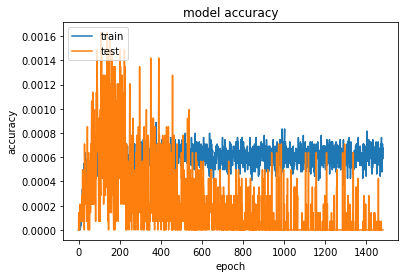

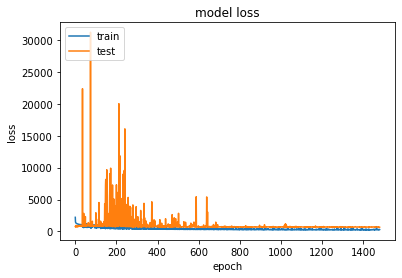

In [455]:
now = 'adr_predict_dnn'
#plot_model(model, to_file='./static/model'+now+'.png',show_shapes=True)
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig('./model_adr1/model_acurracy1.png')
plt.show()
# summarize history for loss 
plt.plot(train_history.history['loss']) 
plt.plot(train_history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig('./model_adr1/model_loss1.png')
plt.show()

In [456]:
Y_predict = model.predict(test)
Y_predict = np.reshape(Y_predict,(Y_predict.shape[0],))
Y_predict

array([ 75.37405 ,  68.96787 ,  71.17329 , ..., 127.69181 , 141.97127 ,
        52.397964], dtype=float32)

In [457]:
train = pd.read_csv('./train.csv')
train_label = pd.read_csv('./train_label.csv')
test = pd.read_csv('./test.csv')
X,Y,test,X_booking,test_booking = pre_adr_model(train,test)

In [460]:
test_booking['booking_total_revenue'] = Y_predict*(test_booking['stays_in_week_nights']+test_booking['stays_in_weekend_nights']+1)
X_tmp = X_booking.groupby('arrival_date').sum()
test_X_tmp = test_booking.groupby('arrival_date').sum()
#leadtime 先保留
X_tmp.drop(['ID','agent','adr'],axis=1,inplace=True)
test_X_tmp.drop(['ID','agent'],axis=1,inplace=True)

In [461]:
X = X_tmp.values
test_X = test_X_tmp.values

In [465]:
Y = train_label.drop(['arrival_date'],axis=1).values

In [467]:
Y = np.reshape(Y,(Y.shape[0],))

In [462]:
X.shape

(640, 73)

In [464]:
test_X.shape

(153, 73)

In [468]:
Y.shape

(640,)

In [470]:
save_dir = "./model_adr1/"
#先預測 rank
import tensorflow.keras.backend as KB
from tensorflow.keras.callbacks import EarlyStopping
# This returns a tensor
model = Sequential()
model.add(Dense(units=256,input_shape=(73,),activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.2))
#model.add(Dense(units=512,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(units=1024,activation='relu',kernel_initializer='normal'))
# model.add(Dense(units=512,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=256,activation='relu',kernel_initializer='normal'))
#model.add(Dense(units=64,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=1,activation='linear',kernel_initializer='normal'))
es = EarlyStopping(monitor='val_loss',patience=500,restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+'model_rank1.h5', 
                                                monitor='val_mean_absolute_error', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='min')
# This creates a model that includes
# the Input layer and three Dense layers
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae',soft_acc])
train_history = model.fit(X, Y,validation_split=0.2, epochs=3000, batch_size=100,callbacks=[es,checkpoint])  # starts training

Train on 512 samples, validate on 128 samples
Epoch 1/3000
100/512 [====>.........................] - ETA: 1s - loss: 386.1860 - mean_absolute_error: 386.1860 - soft_acc: 0.0000e+00
Epoch 00001: val_mean_absolute_error improved from inf to 1154.43384, saving model to ./model_adr1/model_rank1.h5
512/512 [==============================] - 2s 4ms/sample - loss: 2061.1072 - mean_absolute_error: 2061.1072 - soft_acc: 0.0000e+00 - val_loss: 1154.4338 - val_mean_absolute_error: 1154.4338 - val_soft_acc: 0.0000e+00
Epoch 2/3000
100/512 [====>.........................] - ETA: 0s - loss: 2035.5101 - mean_absolute_error: 2035.5101 - soft_acc: 0.0000e+00
Epoch 00002: val_mean_absolute_error improved from 1154.43384 to 484.19153, saving model to ./model_adr1/model_rank1.h5
512/512 [==============================] - 0s 111us/sample - loss: 922.4306 - mean_absolute_error: 922.4306 - soft_acc: 0.0000e+00 - val_loss: 484.1915 - val_mean_absolute_error: 484.1915 - val_soft_acc: 0.0000e+00
Epoch 3/3000
1

Epoch 20/3000
100/512 [====>.........................] - ETA: 0s - loss: 10.6663 - mean_absolute_error: 10.6663 - soft_acc: 0.0500
Epoch 00020: val_mean_absolute_error did not improve from 2.34397
512/512 [==============================] - 0s 47us/sample - loss: 10.8850 - mean_absolute_error: 10.8850 - soft_acc: 0.0556 - val_loss: 4.4996 - val_mean_absolute_error: 4.4996 - val_soft_acc: 0.0507
Epoch 21/3000
100/512 [====>.........................] - ETA: 0s - loss: 9.3468 - mean_absolute_error: 9.3468 - soft_acc: 0.0300
Epoch 00021: val_mean_absolute_error did not improve from 2.34397
512/512 [==============================] - 0s 41us/sample - loss: 9.4702 - mean_absolute_error: 9.4702 - soft_acc: 0.0522 - val_loss: 2.5740 - val_mean_absolute_error: 2.5740 - val_soft_acc: 0.1793
Epoch 22/3000
100/512 [====>.........................] - ETA: 0s - loss: 11.1466 - mean_absolute_error: 11.1466 - soft_acc: 0.0400
Epoch 00022: val_mean_absolute_error did not improve from 2.34397
512/512 [====

Epoch 41/3000
100/512 [====>.........................] - ETA: 0s - loss: 5.2608 - mean_absolute_error: 5.2608 - soft_acc: 0.1200
Epoch 00041: val_mean_absolute_error improved from 1.10223 to 1.05100, saving model to ./model_adr1/model_rank1.h5
512/512 [==============================] - 0s 97us/sample - loss: 5.0808 - mean_absolute_error: 5.0808 - soft_acc: 0.1039 - val_loss: 1.0510 - val_mean_absolute_error: 1.0510 - val_soft_acc: 0.2279
Epoch 42/3000
100/512 [====>.........................] - ETA: 0s - loss: 4.2252 - mean_absolute_error: 4.2252 - soft_acc: 0.0900
Epoch 00042: val_mean_absolute_error did not improve from 1.05100
512/512 [==============================] - 0s 48us/sample - loss: 4.4134 - mean_absolute_error: 4.4134 - soft_acc: 0.0856 - val_loss: 3.4990 - val_mean_absolute_error: 3.4990 - val_soft_acc: 0.0179
Epoch 43/3000
100/512 [====>.........................] - ETA: 0s - loss: 5.6134 - mean_absolute_error: 5.6134 - soft_acc: 0.0700
Epoch 00043: val_mean_absolute_error

100/512 [====>.........................] - ETA: 0s - loss: 0.5618 - mean_absolute_error: 0.5618 - soft_acc: 0.5500
Epoch 00081: val_mean_absolute_error improved from 0.35013 to 0.32687, saving model to ./model_adr1/model_rank1.h5
512/512 [==============================] - 0s 100us/sample - loss: 0.5626 - mean_absolute_error: 0.5626 - soft_acc: 0.5417 - val_loss: 0.3269 - val_mean_absolute_error: 0.3269 - val_soft_acc: 0.7350
Epoch 82/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.5525 - mean_absolute_error: 0.5525 - soft_acc: 0.5000
Epoch 00082: val_mean_absolute_error did not improve from 0.32687
512/512 [==============================] - 0s 48us/sample - loss: 0.5464 - mean_absolute_error: 0.5464 - soft_acc: 0.5417 - val_loss: 0.3376 - val_mean_absolute_error: 0.3376 - val_soft_acc: 0.8064
Epoch 83/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4838 - mean_absolute_error: 0.4838 - soft_acc: 0.6000
Epoch 00083: val_mean_absolute_error did not impr

Epoch 102/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4377 - mean_absolute_error: 0.4377 - soft_acc: 0.6700
Epoch 00102: val_mean_absolute_error did not improve from 0.32254
512/512 [==============================] - 0s 43us/sample - loss: 0.5266 - mean_absolute_error: 0.5266 - soft_acc: 0.6128 - val_loss: 0.4309 - val_mean_absolute_error: 0.4309 - val_soft_acc: 0.6286
Epoch 103/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.6595 - mean_absolute_error: 0.6595 - soft_acc: 0.4300
Epoch 00103: val_mean_absolute_error did not improve from 0.32254
512/512 [==============================] - 0s 44us/sample - loss: 0.5238 - mean_absolute_error: 0.5238 - soft_acc: 0.5822 - val_loss: 0.3759 - val_mean_absolute_error: 0.3759 - val_soft_acc: 0.6814
Epoch 104/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.5329 - mean_absolute_error: 0.5329 - soft_acc: 0.5200
Epoch 00104: val_mean_absolute_error improved from 0.32254 to 0.32110, saving mode

Epoch 143/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4270 - mean_absolute_error: 0.4270 - soft_acc: 0.7100
Epoch 00143: val_mean_absolute_error did not improve from 0.31311
512/512 [==============================] - 0s 45us/sample - loss: 0.4152 - mean_absolute_error: 0.4152 - soft_acc: 0.6800 - val_loss: 0.3238 - val_mean_absolute_error: 0.3238 - val_soft_acc: 0.7550
Epoch 144/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3755 - mean_absolute_error: 0.3755 - soft_acc: 0.7900
Epoch 00144: val_mean_absolute_error did not improve from 0.31311
512/512 [==============================] - 0s 44us/sample - loss: 0.3863 - mean_absolute_error: 0.3863 - soft_acc: 0.7422 - val_loss: 0.3181 - val_mean_absolute_error: 0.3181 - val_soft_acc: 0.7679
Epoch 145/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4374 - mean_absolute_error: 0.4374 - soft_acc: 0.6200
Epoch 00145: val_mean_absolute_error did not improve from 0.31311
512/512 [=======

Epoch 164/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4697 - mean_absolute_error: 0.4697 - soft_acc: 0.6500
Epoch 00164: val_mean_absolute_error did not improve from 0.31311
512/512 [==============================] - 0s 39us/sample - loss: 0.4230 - mean_absolute_error: 0.4230 - soft_acc: 0.6622 - val_loss: 0.3859 - val_mean_absolute_error: 0.3859 - val_soft_acc: 0.6943
Epoch 165/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3746 - mean_absolute_error: 0.3746 - soft_acc: 0.7600
Epoch 00165: val_mean_absolute_error did not improve from 0.31311
512/512 [==============================] - 0s 42us/sample - loss: 0.4320 - mean_absolute_error: 0.4320 - soft_acc: 0.6906 - val_loss: 0.3902 - val_mean_absolute_error: 0.3902 - val_soft_acc: 0.6864
Epoch 166/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4217 - mean_absolute_error: 0.4217 - soft_acc: 0.6900
Epoch 00166: val_mean_absolute_error did not improve from 0.31311
512/512 [=======

Epoch 185/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4316 - mean_absolute_error: 0.4316 - soft_acc: 0.6800
Epoch 00185: val_mean_absolute_error did not improve from 0.31177
512/512 [==============================] - 0s 45us/sample - loss: 0.4033 - mean_absolute_error: 0.4033 - soft_acc: 0.6672 - val_loss: 0.5659 - val_mean_absolute_error: 0.5659 - val_soft_acc: 0.5279
Epoch 186/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.5474 - mean_absolute_error: 0.5474 - soft_acc: 0.5900
Epoch 00186: val_mean_absolute_error did not improve from 0.31177
512/512 [==============================] - 0s 42us/sample - loss: 0.5110 - mean_absolute_error: 0.5110 - soft_acc: 0.5561 - val_loss: 0.4413 - val_mean_absolute_error: 0.4413 - val_soft_acc: 0.6621
Epoch 187/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4545 - mean_absolute_error: 0.4545 - soft_acc: 0.6200
Epoch 00187: val_mean_absolute_error did not improve from 0.31177
512/512 [=======

Epoch 206/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3699 - mean_absolute_error: 0.3699 - soft_acc: 0.7200
Epoch 00206: val_mean_absolute_error did not improve from 0.30913
512/512 [==============================] - 0s 38us/sample - loss: 0.3773 - mean_absolute_error: 0.3773 - soft_acc: 0.6833 - val_loss: 0.3587 - val_mean_absolute_error: 0.3587 - val_soft_acc: 0.7243
Epoch 207/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4038 - mean_absolute_error: 0.4038 - soft_acc: 0.6400
Epoch 00207: val_mean_absolute_error did not improve from 0.30913
512/512 [==============================] - 0s 44us/sample - loss: 0.3779 - mean_absolute_error: 0.3779 - soft_acc: 0.7178 - val_loss: 0.3477 - val_mean_absolute_error: 0.3477 - val_soft_acc: 0.7500
Epoch 208/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3474 - mean_absolute_error: 0.3474 - soft_acc: 0.7400
Epoch 00208: val_mean_absolute_error did not improve from 0.30913
512/512 [=======

Epoch 227/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3922 - mean_absolute_error: 0.3922 - soft_acc: 0.7200
Epoch 00227: val_mean_absolute_error did not improve from 0.30909
512/512 [==============================] - 0s 42us/sample - loss: 0.4046 - mean_absolute_error: 0.4046 - soft_acc: 0.6806 - val_loss: 0.4211 - val_mean_absolute_error: 0.4211 - val_soft_acc: 0.6593
Epoch 228/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3427 - mean_absolute_error: 0.3427 - soft_acc: 0.7300
Epoch 00228: val_mean_absolute_error did not improve from 0.30909
512/512 [==============================] - 0s 44us/sample - loss: 0.4107 - mean_absolute_error: 0.4107 - soft_acc: 0.6689 - val_loss: 0.4613 - val_mean_absolute_error: 0.4613 - val_soft_acc: 0.6057
Epoch 229/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3350 - mean_absolute_error: 0.3350 - soft_acc: 0.7600
Epoch 00229: val_mean_absolute_error did not improve from 0.30909
512/512 [=======

Epoch 248/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.5297 - mean_absolute_error: 0.5297 - soft_acc: 0.5600
Epoch 00248: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 45us/sample - loss: 0.4354 - mean_absolute_error: 0.4354 - soft_acc: 0.6756 - val_loss: 0.5585 - val_mean_absolute_error: 0.5585 - val_soft_acc: 0.4921
Epoch 249/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4451 - mean_absolute_error: 0.4451 - soft_acc: 0.6400
Epoch 00249: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 40us/sample - loss: 0.4096 - mean_absolute_error: 0.4096 - soft_acc: 0.6433 - val_loss: 0.5649 - val_mean_absolute_error: 0.5649 - val_soft_acc: 0.5357
Epoch 250/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.5338 - mean_absolute_error: 0.5338 - soft_acc: 0.5400
Epoch 00250: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 269/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4728 - mean_absolute_error: 0.4728 - soft_acc: 0.6700
Epoch 00269: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 29us/sample - loss: 0.4027 - mean_absolute_error: 0.4027 - soft_acc: 0.6683 - val_loss: 0.5653 - val_mean_absolute_error: 0.5653 - val_soft_acc: 0.4921
Epoch 270/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3904 - mean_absolute_error: 0.3904 - soft_acc: 0.7000
Epoch 00270: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 40us/sample - loss: 0.4631 - mean_absolute_error: 0.4631 - soft_acc: 0.6706 - val_loss: 0.6819 - val_mean_absolute_error: 0.6819 - val_soft_acc: 0.4171
Epoch 271/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4516 - mean_absolute_error: 0.4516 - soft_acc: 0.6800
Epoch 00271: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 290/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3938 - mean_absolute_error: 0.3938 - soft_acc: 0.6900
Epoch 00290: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 46us/sample - loss: 0.3743 - mean_absolute_error: 0.3743 - soft_acc: 0.7439 - val_loss: 0.5903 - val_mean_absolute_error: 0.5903 - val_soft_acc: 0.4543
Epoch 291/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4070 - mean_absolute_error: 0.4070 - soft_acc: 0.6700
Epoch 00291: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 41us/sample - loss: 0.3977 - mean_absolute_error: 0.3977 - soft_acc: 0.6811 - val_loss: 0.6681 - val_mean_absolute_error: 0.6681 - val_soft_acc: 0.3836
Epoch 292/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.5354 - mean_absolute_error: 0.5354 - soft_acc: 0.5600
Epoch 00292: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 311/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3650 - mean_absolute_error: 0.3650 - soft_acc: 0.7500
Epoch 00311: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 45us/sample - loss: 0.3676 - mean_absolute_error: 0.3676 - soft_acc: 0.7356 - val_loss: 0.4460 - val_mean_absolute_error: 0.4460 - val_soft_acc: 0.6257
Epoch 312/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3642 - mean_absolute_error: 0.3642 - soft_acc: 0.7100
Epoch 00312: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 43us/sample - loss: 0.4056 - mean_absolute_error: 0.4056 - soft_acc: 0.6606 - val_loss: 0.4168 - val_mean_absolute_error: 0.4168 - val_soft_acc: 0.7486
Epoch 313/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4407 - mean_absolute_error: 0.4407 - soft_acc: 0.6300
Epoch 00313: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 332/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3809 - mean_absolute_error: 0.3809 - soft_acc: 0.7200
Epoch 00332: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 43us/sample - loss: 0.3568 - mean_absolute_error: 0.3568 - soft_acc: 0.7694 - val_loss: 0.4664 - val_mean_absolute_error: 0.4664 - val_soft_acc: 0.6293
Epoch 333/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3652 - mean_absolute_error: 0.3652 - soft_acc: 0.7800
Epoch 00333: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 47us/sample - loss: 0.3644 - mean_absolute_error: 0.3644 - soft_acc: 0.7756 - val_loss: 0.5584 - val_mean_absolute_error: 0.5584 - val_soft_acc: 0.5386
Epoch 334/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3360 - mean_absolute_error: 0.3360 - soft_acc: 0.8000
Epoch 00334: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 353/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3011 - mean_absolute_error: 0.3011 - soft_acc: 0.8100
Epoch 00353: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 42us/sample - loss: 0.3689 - mean_absolute_error: 0.3689 - soft_acc: 0.7583 - val_loss: 0.6599 - val_mean_absolute_error: 0.6599 - val_soft_acc: 0.4450
Epoch 354/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3865 - mean_absolute_error: 0.3865 - soft_acc: 0.7100
Epoch 00354: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 37us/sample - loss: 0.3629 - mean_absolute_error: 0.3629 - soft_acc: 0.7700 - val_loss: 0.5673 - val_mean_absolute_error: 0.5673 - val_soft_acc: 0.4929
Epoch 355/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3607 - mean_absolute_error: 0.3607 - soft_acc: 0.7300
Epoch 00355: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 374/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3824 - mean_absolute_error: 0.3824 - soft_acc: 0.7100
Epoch 00374: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 42us/sample - loss: 0.4160 - mean_absolute_error: 0.4160 - soft_acc: 0.6650 - val_loss: 0.4726 - val_mean_absolute_error: 0.4726 - val_soft_acc: 0.5371
Epoch 375/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3722 - mean_absolute_error: 0.3722 - soft_acc: 0.7300
Epoch 00375: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 41us/sample - loss: 0.3301 - mean_absolute_error: 0.3301 - soft_acc: 0.7789 - val_loss: 0.5022 - val_mean_absolute_error: 0.5022 - val_soft_acc: 0.5686
Epoch 376/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3653 - mean_absolute_error: 0.3653 - soft_acc: 0.7500
Epoch 00376: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 395/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3113 - mean_absolute_error: 0.3113 - soft_acc: 0.8300
Epoch 00395: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 43us/sample - loss: 0.3367 - mean_absolute_error: 0.3367 - soft_acc: 0.7783 - val_loss: 0.6180 - val_mean_absolute_error: 0.6180 - val_soft_acc: 0.4164
Epoch 396/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3409 - mean_absolute_error: 0.3409 - soft_acc: 0.7600
Epoch 00396: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 42us/sample - loss: 0.3722 - mean_absolute_error: 0.3722 - soft_acc: 0.7506 - val_loss: 0.5065 - val_mean_absolute_error: 0.5065 - val_soft_acc: 0.5507
Epoch 397/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3869 - mean_absolute_error: 0.3869 - soft_acc: 0.8000
Epoch 00397: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 416/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4514 - mean_absolute_error: 0.4514 - soft_acc: 0.7100
Epoch 00416: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 29us/sample - loss: 0.4088 - mean_absolute_error: 0.4088 - soft_acc: 0.6961 - val_loss: 0.8904 - val_mean_absolute_error: 0.8904 - val_soft_acc: 0.2679
Epoch 417/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.5295 - mean_absolute_error: 0.5295 - soft_acc: 0.5200
Epoch 00417: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 39us/sample - loss: 0.5575 - mean_absolute_error: 0.5575 - soft_acc: 0.5267 - val_loss: 0.5822 - val_mean_absolute_error: 0.5822 - val_soft_acc: 0.4957
Epoch 418/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3434 - mean_absolute_error: 0.3434 - soft_acc: 0.8100
Epoch 00418: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 437/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3471 - mean_absolute_error: 0.3471 - soft_acc: 0.8000
Epoch 00437: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 47us/sample - loss: 0.3716 - mean_absolute_error: 0.3716 - soft_acc: 0.7250 - val_loss: 0.5811 - val_mean_absolute_error: 0.5811 - val_soft_acc: 0.4879
Epoch 438/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3062 - mean_absolute_error: 0.3062 - soft_acc: 0.8000
Epoch 00438: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 46us/sample - loss: 0.3301 - mean_absolute_error: 0.3301 - soft_acc: 0.7511 - val_loss: 0.5624 - val_mean_absolute_error: 0.5624 - val_soft_acc: 0.4593
Epoch 439/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3198 - mean_absolute_error: 0.3198 - soft_acc: 0.7800
Epoch 00439: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 458/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4296 - mean_absolute_error: 0.4296 - soft_acc: 0.7000
Epoch 00458: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 37us/sample - loss: 0.3871 - mean_absolute_error: 0.3871 - soft_acc: 0.7011 - val_loss: 0.7569 - val_mean_absolute_error: 0.7569 - val_soft_acc: 0.3664
Epoch 459/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3859 - mean_absolute_error: 0.3859 - soft_acc: 0.7400
Epoch 00459: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 49us/sample - loss: 0.3655 - mean_absolute_error: 0.3655 - soft_acc: 0.7094 - val_loss: 0.6941 - val_mean_absolute_error: 0.6941 - val_soft_acc: 0.3250
Epoch 460/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3061 - mean_absolute_error: 0.3061 - soft_acc: 0.8100
Epoch 00460: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 479/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3109 - mean_absolute_error: 0.3109 - soft_acc: 0.8300
Epoch 00479: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 41us/sample - loss: 0.3175 - mean_absolute_error: 0.3175 - soft_acc: 0.7950 - val_loss: 0.6646 - val_mean_absolute_error: 0.6646 - val_soft_acc: 0.3964
Epoch 480/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3265 - mean_absolute_error: 0.3265 - soft_acc: 0.8000
Epoch 00480: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 45us/sample - loss: 0.3344 - mean_absolute_error: 0.3344 - soft_acc: 0.8150 - val_loss: 0.7245 - val_mean_absolute_error: 0.7245 - val_soft_acc: 0.2764
Epoch 481/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3948 - mean_absolute_error: 0.3948 - soft_acc: 0.6900
Epoch 00481: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 500/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.8772 - mean_absolute_error: 0.8772 - soft_acc: 0.4000
Epoch 00500: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 37us/sample - loss: 0.7061 - mean_absolute_error: 0.7061 - soft_acc: 0.4400 - val_loss: 0.8591 - val_mean_absolute_error: 0.8591 - val_soft_acc: 0.2550
Epoch 501/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4659 - mean_absolute_error: 0.4659 - soft_acc: 0.5800
Epoch 00501: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 37us/sample - loss: 0.4873 - mean_absolute_error: 0.4873 - soft_acc: 0.6339 - val_loss: 1.0019 - val_mean_absolute_error: 1.0019 - val_soft_acc: 0.1593
Epoch 502/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.6458 - mean_absolute_error: 0.6458 - soft_acc: 0.4700
Epoch 00502: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 521/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4724 - mean_absolute_error: 0.4724 - soft_acc: 0.5700
Epoch 00521: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 43us/sample - loss: 0.4551 - mean_absolute_error: 0.4551 - soft_acc: 0.6294 - val_loss: 0.5927 - val_mean_absolute_error: 0.5927 - val_soft_acc: 0.4393
Epoch 522/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3000 - mean_absolute_error: 0.3000 - soft_acc: 0.8200
Epoch 00522: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 42us/sample - loss: 0.3914 - mean_absolute_error: 0.3914 - soft_acc: 0.7206 - val_loss: 0.4922 - val_mean_absolute_error: 0.4922 - val_soft_acc: 0.4736
Epoch 523/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3312 - mean_absolute_error: 0.3312 - soft_acc: 0.7700
Epoch 00523: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 542/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3739 - mean_absolute_error: 0.3739 - soft_acc: 0.7600
Epoch 00542: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 47us/sample - loss: 0.3464 - mean_absolute_error: 0.3464 - soft_acc: 0.7600 - val_loss: 0.5574 - val_mean_absolute_error: 0.5574 - val_soft_acc: 0.4414
Epoch 543/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.2806 - mean_absolute_error: 0.2806 - soft_acc: 0.8400
Epoch 00543: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 51us/sample - loss: 0.3131 - mean_absolute_error: 0.3131 - soft_acc: 0.8000 - val_loss: 0.6533 - val_mean_absolute_error: 0.6533 - val_soft_acc: 0.4429
Epoch 544/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3501 - mean_absolute_error: 0.3501 - soft_acc: 0.7800
Epoch 00544: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 563/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3879 - mean_absolute_error: 0.3879 - soft_acc: 0.7300
Epoch 00563: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 40us/sample - loss: 0.3362 - mean_absolute_error: 0.3362 - soft_acc: 0.7633 - val_loss: 0.5640 - val_mean_absolute_error: 0.5640 - val_soft_acc: 0.4671
Epoch 564/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.2867 - mean_absolute_error: 0.2867 - soft_acc: 0.8300
Epoch 00564: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 47us/sample - loss: 0.3149 - mean_absolute_error: 0.3149 - soft_acc: 0.8094 - val_loss: 0.4838 - val_mean_absolute_error: 0.4838 - val_soft_acc: 0.5479
Epoch 565/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3412 - mean_absolute_error: 0.3412 - soft_acc: 0.7500
Epoch 00565: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 584/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3847 - mean_absolute_error: 0.3847 - soft_acc: 0.7500
Epoch 00584: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 43us/sample - loss: 0.3660 - mean_absolute_error: 0.3660 - soft_acc: 0.6983 - val_loss: 0.5417 - val_mean_absolute_error: 0.5417 - val_soft_acc: 0.5336
Epoch 585/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3117 - mean_absolute_error: 0.3117 - soft_acc: 0.7800
Epoch 00585: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 45us/sample - loss: 0.3262 - mean_absolute_error: 0.3262 - soft_acc: 0.7628 - val_loss: 0.6806 - val_mean_absolute_error: 0.6806 - val_soft_acc: 0.3843
Epoch 586/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3851 - mean_absolute_error: 0.3851 - soft_acc: 0.7700
Epoch 00586: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 605/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3624 - mean_absolute_error: 0.3624 - soft_acc: 0.7500
Epoch 00605: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 42us/sample - loss: 0.3261 - mean_absolute_error: 0.3261 - soft_acc: 0.7933 - val_loss: 0.5392 - val_mean_absolute_error: 0.5392 - val_soft_acc: 0.4486
Epoch 606/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3279 - mean_absolute_error: 0.3279 - soft_acc: 0.8200
Epoch 00606: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 43us/sample - loss: 0.3418 - mean_absolute_error: 0.3418 - soft_acc: 0.7822 - val_loss: 0.5804 - val_mean_absolute_error: 0.5804 - val_soft_acc: 0.4493
Epoch 607/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.2701 - mean_absolute_error: 0.2701 - soft_acc: 0.8200
Epoch 00607: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 626/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4157 - mean_absolute_error: 0.4157 - soft_acc: 0.6600
Epoch 00626: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 41us/sample - loss: 0.3791 - mean_absolute_error: 0.3791 - soft_acc: 0.7150 - val_loss: 0.8284 - val_mean_absolute_error: 0.8284 - val_soft_acc: 0.2571
Epoch 627/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4483 - mean_absolute_error: 0.4483 - soft_acc: 0.5700
Epoch 00627: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 45us/sample - loss: 0.4029 - mean_absolute_error: 0.4029 - soft_acc: 0.6883 - val_loss: 0.8657 - val_mean_absolute_error: 0.8657 - val_soft_acc: 0.2807
Epoch 628/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.5267 - mean_absolute_error: 0.5267 - soft_acc: 0.5400
Epoch 00628: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 647/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3818 - mean_absolute_error: 0.3818 - soft_acc: 0.7100
Epoch 00647: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 39us/sample - loss: 0.3188 - mean_absolute_error: 0.3188 - soft_acc: 0.8094 - val_loss: 0.8121 - val_mean_absolute_error: 0.8121 - val_soft_acc: 0.2593
Epoch 648/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4286 - mean_absolute_error: 0.4286 - soft_acc: 0.6300
Epoch 00648: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 40us/sample - loss: 0.3420 - mean_absolute_error: 0.3420 - soft_acc: 0.7944 - val_loss: 0.6987 - val_mean_absolute_error: 0.6987 - val_soft_acc: 0.3129
Epoch 649/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.2867 - mean_absolute_error: 0.2867 - soft_acc: 0.8300
Epoch 00649: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 668/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.2848 - mean_absolute_error: 0.2848 - soft_acc: 0.8100
Epoch 00668: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 43us/sample - loss: 0.3153 - mean_absolute_error: 0.3153 - soft_acc: 0.8111 - val_loss: 0.7237 - val_mean_absolute_error: 0.7237 - val_soft_acc: 0.3207
Epoch 669/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.2974 - mean_absolute_error: 0.2974 - soft_acc: 0.9000
Epoch 00669: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 42us/sample - loss: 0.2883 - mean_absolute_error: 0.2883 - soft_acc: 0.8506 - val_loss: 0.6049 - val_mean_absolute_error: 0.6049 - val_soft_acc: 0.3936
Epoch 670/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.2941 - mean_absolute_error: 0.2941 - soft_acc: 0.8200
Epoch 00670: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 689/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4958 - mean_absolute_error: 0.4958 - soft_acc: 0.6200
Epoch 00689: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 46us/sample - loss: 0.3734 - mean_absolute_error: 0.3734 - soft_acc: 0.7233 - val_loss: 0.8633 - val_mean_absolute_error: 0.8633 - val_soft_acc: 0.3064
Epoch 690/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4231 - mean_absolute_error: 0.4231 - soft_acc: 0.6900
Epoch 00690: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 41us/sample - loss: 0.3885 - mean_absolute_error: 0.3885 - soft_acc: 0.7517 - val_loss: 0.8204 - val_mean_absolute_error: 0.8204 - val_soft_acc: 0.3057
Epoch 691/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4102 - mean_absolute_error: 0.4102 - soft_acc: 0.6500
Epoch 00691: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 710/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3007 - mean_absolute_error: 0.3007 - soft_acc: 0.8300
Epoch 00710: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 43us/sample - loss: 0.3318 - mean_absolute_error: 0.3318 - soft_acc: 0.7328 - val_loss: 0.4571 - val_mean_absolute_error: 0.4571 - val_soft_acc: 0.5964
Epoch 711/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.3526 - mean_absolute_error: 0.3526 - soft_acc: 0.7600
Epoch 00711: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 41us/sample - loss: 0.3759 - mean_absolute_error: 0.3759 - soft_acc: 0.7406 - val_loss: 0.5372 - val_mean_absolute_error: 0.5372 - val_soft_acc: 0.4514
Epoch 712/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.2805 - mean_absolute_error: 0.2805 - soft_acc: 0.8400
Epoch 00712: val_mean_absolute_error did not improve from 0.30867
512/512 [=======

Epoch 731/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.2820 - mean_absolute_error: 0.2820 - soft_acc: 0.8400
Epoch 00731: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 41us/sample - loss: 0.2969 - mean_absolute_error: 0.2969 - soft_acc: 0.8156 - val_loss: 0.8398 - val_mean_absolute_error: 0.8398 - val_soft_acc: 0.2829
Epoch 732/3000
100/512 [====>.........................] - ETA: 0s - loss: 0.4877 - mean_absolute_error: 0.4877 - soft_acc: 0.5600
Epoch 00732: val_mean_absolute_error did not improve from 0.30867
512/512 [==============================] - 0s 893us/sample - loss: 0.3542 - mean_absolute_error: 0.3542 - soft_acc: 0.7250 - val_loss: 0.6264 - val_mean_absolute_error: 0.6264 - val_soft_acc: 0.3964


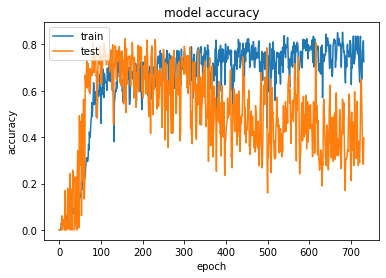

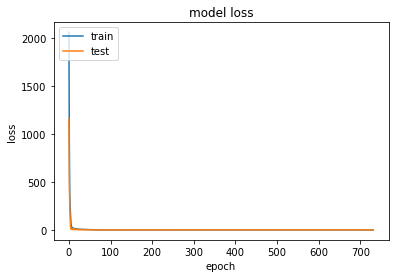

In [473]:
now = 'adr_predict_dnn'
#plot_model(model, to_file='./static/model'+now+'.png',show_shapes=True)
# summarize history for accuracy
plt.plot(train_history.history['soft_acc'])
plt.plot(train_history.history['val_soft_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig('./model_adr1/model_rank_acurracy1.png')
plt.show()
# summarize history for loss 
plt.plot(train_history.history['loss']) 
plt.plot(train_history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig('./model_adr1/model_rank_loss1.png')
plt.show()

In [474]:
Y_predict = model.predict(test_X)

In [477]:
Y_predict = np.reshape(Y_predict,(Y_predict.shape[0],))
Y_predict = transfer_label(Y_predict)
Y_predict

array([0., 0., 0., 0., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 7., 0., 0., 4., 0., 2., 0., 0., 0., 0., 0., 2., 4.,
       4., 0., 0., 0., 4., 0., 0., 2., 0., 0., 0., 0., 6., 0., 9., 4., 0.,
       0., 5., 0., 0., 6., 6., 0., 0., 9., 0., 5., 4., 1., 0., 0., 4., 0.,
       9., 8., 0., 0., 0., 4., 9., 5., 9., 8., 0., 0., 7., 6., 1., 9., 9.,
       0., 5., 0., 9., 4., 1., 9., 0., 0., 0., 8., 8., 9., 0., 0., 0., 1.,
       9., 0., 0., 1., 0., 0., 8., 4., 0., 0., 2., 0., 0., 7., 9., 0., 3.,
       7., 0., 0., 0., 0., 0., 4., 0., 0., 0., 6., 8., 0., 0., 9., 0., 0.,
       3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0.])

In [478]:
test_nolabel = pd.read_csv('./test_nolabel.csv')
test_label = pd.DataFrame()
test_label['arrival_date'] = test_nolabel['arrival_date']
test_label['label'] = Y_predict.astype('int64')
test_label

,arrival_date,label
0,2017-04-01,0
1,2017-04-02,0
2,2017-04-03,0
3,2017-04-04,0
4,2017-04-05,4
...,...,...
148,2017-08-27,0
149,2017-08-28,0
150,2017-08-29,6
151,2017-08-30,0


In [479]:
test_label.to_csv('./test_label_dnn_2_time.csv',index=False)

In [219]:
# not use
test_data['booking_total_revenue'] = Y_predict*(test_data['stays_in_week_nights']+test_data['stays_in_weekend_nights']+1)
test_data = combine_arrival_date(test_data)
test_data = test_data.groupby('arrival_date').sum()
test_data = test_data['booking_total_revenue']
test_data = test_data.values
test_data = np.reshape(test_data,(test_data.shape[0],1))

 `去跑revenue rank 預測`

In [402]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
not_use,not_use2,not_use3,X_preprocess,test_preprocess = pre_adr_model(train,test)

In [403]:
X_tmp = X_preprocess.groupby('arrival_date').sum()
test_X_tmp = test_preprocess.groupby('arrival_date').sum()
#leadtime 先保留
X_tmp.drop(['ID','agent','adr','booking_total_revenue'],axis=1,inplace=True)
test_X_tmp.drop(['ID','agent'],axis=1,inplace=True)

In [404]:
X_tmp

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,assigned_room_type_P,reserved_room_type_P
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,19600,2781,38,276,186,2,0,1,0,9,...,0.0,103.0,0.0,0.0,6.0,0.0,97.0,0.0,0,0
2015-07-02,2518,972,55,150,71,2,0,0,0,0,...,0.0,36.0,0.0,0.0,13.0,0.0,20.0,3.0,0,0
2015-07-03,2419,999,37,123,74,3,0,0,0,0,...,0.0,37.0,0.0,0.0,6.0,0.0,22.0,9.0,0,0
2015-07-04,11415,1836,129,202,135,5,2,0,23,0,...,0.0,45.0,23.0,0.0,7.0,0.0,26.0,35.0,0,0
2015-07-05,2789,1036,86,140,72,8,0,0,0,0,...,0.0,37.0,0.0,0.0,9.0,1.0,27.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,15621,2067,167,263,296,0,0,9,1,18,...,0.0,114.0,45.0,0.0,0.0,2.0,112.0,45.0,0,0
2017-03-28,3520,871,33,223,120,3,1,7,1,43,...,0.0,67.0,0.0,0.0,0.0,1.0,64.0,2.0,0,0
2017-03-29,5347,1690,31,333,215,7,2,17,2,72,...,2.0,130.0,0.0,0.0,0.0,3.0,125.0,2.0,0,0


In [405]:

X = X_tmp.valuesX = X_tmp.values
test_X = test_X_tmp.values

In [406]:
X.shape

(640, 72)

In [407]:
test_X.shape

(153, 72)

In [408]:
Y = train_label.drop(['arrival_date'],axis=1).values
Y = np.reshape(Y,(Y.shape[0],))
Y.shape

(640,)

In [409]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [410]:
X_train.shape

(512, 72)

In [411]:
Y_OneHot = to_categorical(Y)

In [412]:
Y_TrainOneHot = to_categorical(Y_train) 
Y_TestOneHot = to_categorical(Y_test) 

In [413]:
Y_TrainOneHot.shape

(512, 10)

Train on 512 samples, validate on 128 samples
Epoch 1/3000
512/512 [==============================] - 0s 919us/sample - loss: 1871.7993 - mean_absolute_error: 1871.7993 - soft_acc: 0.0000e+00 - val_loss: 340.6542 - val_mean_absolute_error: 340.6542 - val_soft_acc: 0.0000e+00
Epoch 2/3000
512/512 [==============================] - 0s 47us/sample - loss: 262.6454 - mean_absolute_error: 262.6454 - soft_acc: 0.0033 - val_loss: 140.5340 - val_mean_absolute_error: 140.5340 - val_soft_acc: 0.0000e+00
Epoch 3/3000
512/512 [==============================] - 0s 49us/sample - loss: 92.8451 - mean_absolute_error: 92.8451 - soft_acc: 0.0133 - val_loss: 11.2670 - val_mean_absolute_error: 11.2670 - val_soft_acc: 0.0607
Epoch 4/3000
512/512 [==============================] - 0s 38us/sample - loss: 118.7212 - mean_absolute_error: 118.7212 - soft_acc: 0.0050 - val_loss: 92.0567 - val_mean_absolute_error: 92.0567 - val_soft_acc: 0.0000e+00
Epoch 5/3000
512/512 [==============================] - 0s 43us/s

512/512 [==============================] - 0s 35us/sample - loss: 4.2912 - mean_absolute_error: 4.2912 - soft_acc: 0.1117 - val_loss: 7.5996 - val_mean_absolute_error: 7.5996 - val_soft_acc: 0.0379
Epoch 77/3000
512/512 [==============================] - 0s 15us/sample - loss: 10.1230 - mean_absolute_error: 10.1230 - soft_acc: 0.0706 - val_loss: 5.6097 - val_mean_absolute_error: 5.6097 - val_soft_acc: 0.0636
Epoch 78/3000
512/512 [==============================] - 0s 29us/sample - loss: 10.3729 - mean_absolute_error: 10.3729 - soft_acc: 0.0783 - val_loss: 3.8007 - val_mean_absolute_error: 3.8007 - val_soft_acc: 0.0707
Epoch 79/3000
512/512 [==============================] - 0s 39us/sample - loss: 6.2561 - mean_absolute_error: 6.2561 - soft_acc: 0.0706 - val_loss: 3.7255 - val_mean_absolute_error: 3.7255 - val_soft_acc: 0.0986
Epoch 80/3000
512/512 [==============================] - 0s 24us/sample - loss: 3.8760 - mean_absolute_error: 3.8760 - soft_acc: 0.1661 - val_loss: 1.6081 - val_m

Epoch 114/3000
512/512 [==============================] - 0s 39us/sample - loss: 3.0211 - mean_absolute_error: 3.0211 - soft_acc: 0.1694 - val_loss: 2.0136 - val_mean_absolute_error: 2.0136 - val_soft_acc: 0.1850
Epoch 115/3000
512/512 [==============================] - 0s 25us/sample - loss: 2.4101 - mean_absolute_error: 2.4101 - soft_acc: 0.1828 - val_loss: 1.7084 - val_mean_absolute_error: 1.7084 - val_soft_acc: 0.1893
Epoch 116/3000
512/512 [==============================] - 0s 42us/sample - loss: 2.1478 - mean_absolute_error: 2.1478 - soft_acc: 0.2544 - val_loss: 1.2092 - val_mean_absolute_error: 1.2092 - val_soft_acc: 0.3200
Epoch 117/3000
512/512 [==============================] - 0s 37us/sample - loss: 2.5201 - mean_absolute_error: 2.5201 - soft_acc: 0.2022 - val_loss: 1.4796 - val_mean_absolute_error: 1.4796 - val_soft_acc: 0.2829
Epoch 118/3000
512/512 [==============================] - 0s 11us/sample - loss: 2.7031 - mean_absolute_error: 2.7031 - soft_acc: 0.2111 - val_loss:

512/512 [==============================] - 0s 38us/sample - loss: 0.8078 - mean_absolute_error: 0.8078 - soft_acc: 0.4506 - val_loss: 0.9280 - val_mean_absolute_error: 0.9280 - val_soft_acc: 0.3257
Epoch 190/3000
512/512 [==============================] - 0s 43us/sample - loss: 0.8924 - mean_absolute_error: 0.8924 - soft_acc: 0.4317 - val_loss: 0.8475 - val_mean_absolute_error: 0.8475 - val_soft_acc: 0.5086
Epoch 191/3000
512/512 [==============================] - 0s 33us/sample - loss: 1.0816 - mean_absolute_error: 1.0816 - soft_acc: 0.4028 - val_loss: 0.8516 - val_mean_absolute_error: 0.8516 - val_soft_acc: 0.3050
Epoch 192/3000
512/512 [==============================] - 0s 37us/sample - loss: 0.8031 - mean_absolute_error: 0.8031 - soft_acc: 0.4833 - val_loss: 0.7607 - val_mean_absolute_error: 0.7607 - val_soft_acc: 0.4486
Epoch 193/3000
512/512 [==============================] - 0s 19us/sample - loss: 0.9005 - mean_absolute_error: 0.9005 - soft_acc: 0.4606 - val_loss: 0.7658 - val_m

512/512 [==============================] - 0s 35us/sample - loss: 0.6351 - mean_absolute_error: 0.6351 - soft_acc: 0.5867 - val_loss: 0.5935 - val_mean_absolute_error: 0.5935 - val_soft_acc: 0.5764
Epoch 266/3000
512/512 [==============================] - 0s 37us/sample - loss: 0.5918 - mean_absolute_error: 0.5918 - soft_acc: 0.5589 - val_loss: 0.6841 - val_mean_absolute_error: 0.6841 - val_soft_acc: 0.4600
Epoch 267/3000
512/512 [==============================] - 0s 44us/sample - loss: 0.6170 - mean_absolute_error: 0.6170 - soft_acc: 0.5672 - val_loss: 0.6869 - val_mean_absolute_error: 0.6869 - val_soft_acc: 0.4771
Epoch 268/3000
512/512 [==============================] - 0s 29us/sample - loss: 0.7440 - mean_absolute_error: 0.7440 - soft_acc: 0.5300 - val_loss: 0.5615 - val_mean_absolute_error: 0.5615 - val_soft_acc: 0.5529
Epoch 269/3000
512/512 [==============================] - 0s 38us/sample - loss: 0.6644 - mean_absolute_error: 0.6644 - soft_acc: 0.5322 - val_loss: 0.6564 - val_m

512/512 [==============================] - 0s 35us/sample - loss: 0.5738 - mean_absolute_error: 0.5738 - soft_acc: 0.5706 - val_loss: 0.5566 - val_mean_absolute_error: 0.5566 - val_soft_acc: 0.5836
Epoch 342/3000
512/512 [==============================] - 0s 39us/sample - loss: 0.5078 - mean_absolute_error: 0.5078 - soft_acc: 0.6872 - val_loss: 0.8481 - val_mean_absolute_error: 0.8481 - val_soft_acc: 0.4071
Epoch 343/3000
512/512 [==============================] - 0s 19us/sample - loss: 0.6299 - mean_absolute_error: 0.6299 - soft_acc: 0.5828 - val_loss: 0.5485 - val_mean_absolute_error: 0.5485 - val_soft_acc: 0.4964
Epoch 344/3000
512/512 [==============================] - 0s 31us/sample - loss: 0.4865 - mean_absolute_error: 0.4865 - soft_acc: 0.6056 - val_loss: 0.5848 - val_mean_absolute_error: 0.5848 - val_soft_acc: 0.5429
Epoch 345/3000
512/512 [==============================] - 0s 38us/sample - loss: 0.4945 - mean_absolute_error: 0.4945 - soft_acc: 0.6789 - val_loss: 0.7679 - val_m

512/512 [==============================] - 0s 40us/sample - loss: 0.7192 - mean_absolute_error: 0.7192 - soft_acc: 0.5700 - val_loss: 0.5942 - val_mean_absolute_error: 0.5942 - val_soft_acc: 0.5021
Epoch 418/3000
512/512 [==============================] - 0s 40us/sample - loss: 0.4990 - mean_absolute_error: 0.4990 - soft_acc: 0.6711 - val_loss: 0.6274 - val_mean_absolute_error: 0.6274 - val_soft_acc: 0.4900
Epoch 419/3000
512/512 [==============================] - 0s 37us/sample - loss: 0.5465 - mean_absolute_error: 0.5465 - soft_acc: 0.6417 - val_loss: 0.6540 - val_mean_absolute_error: 0.6540 - val_soft_acc: 0.5057
Epoch 420/3000
512/512 [==============================] - 0s 44us/sample - loss: 0.4679 - mean_absolute_error: 0.4679 - soft_acc: 0.6472 - val_loss: 0.6430 - val_mean_absolute_error: 0.6430 - val_soft_acc: 0.5021
Epoch 421/3000
512/512 [==============================] - 0s 31us/sample - loss: 0.4564 - mean_absolute_error: 0.4564 - soft_acc: 0.6694 - val_loss: 0.6838 - val_m

512/512 [==============================] - 0s 17us/sample - loss: 0.3939 - mean_absolute_error: 0.3939 - soft_acc: 0.6728 - val_loss: 0.6266 - val_mean_absolute_error: 0.6266 - val_soft_acc: 0.5607
Epoch 494/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.4402 - mean_absolute_error: 0.4402 - soft_acc: 0.7089 - val_loss: 0.6384 - val_mean_absolute_error: 0.6384 - val_soft_acc: 0.4286
Epoch 495/3000
512/512 [==============================] - 0s 40us/sample - loss: 0.3909 - mean_absolute_error: 0.3909 - soft_acc: 0.6906 - val_loss: 0.5462 - val_mean_absolute_error: 0.5462 - val_soft_acc: 0.5400
Epoch 496/3000
512/512 [==============================] - 0s 33us/sample - loss: 0.3474 - mean_absolute_error: 0.3474 - soft_acc: 0.7817 - val_loss: 0.7011 - val_mean_absolute_error: 0.7011 - val_soft_acc: 0.4643
Epoch 497/3000
512/512 [==============================] - 0s 29us/sample - loss: 0.4504 - mean_absolute_error: 0.4504 - soft_acc: 0.6767 - val_loss: 0.6357 - val_m

512/512 [==============================] - 0s 35us/sample - loss: 0.3680 - mean_absolute_error: 0.3680 - soft_acc: 0.7811 - val_loss: 0.4963 - val_mean_absolute_error: 0.4963 - val_soft_acc: 0.6007
Epoch 570/3000
512/512 [==============================] - 0s 31us/sample - loss: 0.3596 - mean_absolute_error: 0.3596 - soft_acc: 0.7672 - val_loss: 0.5184 - val_mean_absolute_error: 0.5184 - val_soft_acc: 0.5579
Epoch 571/3000
512/512 [==============================] - 0s 13us/sample - loss: 0.3688 - mean_absolute_error: 0.3688 - soft_acc: 0.7344 - val_loss: 0.5896 - val_mean_absolute_error: 0.5896 - val_soft_acc: 0.5300
Epoch 572/3000
512/512 [==============================] - 0s 33us/sample - loss: 0.3894 - mean_absolute_error: 0.3894 - soft_acc: 0.7350 - val_loss: 0.6577 - val_mean_absolute_error: 0.6577 - val_soft_acc: 0.4543
Epoch 573/3000
512/512 [==============================] - 0s 39us/sample - loss: 0.4239 - mean_absolute_error: 0.4239 - soft_acc: 0.6744 - val_loss: 0.5285 - val_m

512/512 [==============================] - 0s 12us/sample - loss: 0.3986 - mean_absolute_error: 0.3986 - soft_acc: 0.7339 - val_loss: 0.6058 - val_mean_absolute_error: 0.6058 - val_soft_acc: 0.4764
Epoch 646/3000
512/512 [==============================] - 0s 27us/sample - loss: 0.3815 - mean_absolute_error: 0.3815 - soft_acc: 0.7161 - val_loss: 0.5480 - val_mean_absolute_error: 0.5480 - val_soft_acc: 0.4914
Epoch 647/3000
512/512 [==============================] - 0s 36us/sample - loss: 0.3582 - mean_absolute_error: 0.3582 - soft_acc: 0.7978 - val_loss: 0.5448 - val_mean_absolute_error: 0.5448 - val_soft_acc: 0.5557
Epoch 648/3000
512/512 [==============================] - 0s 29us/sample - loss: 0.4039 - mean_absolute_error: 0.4039 - soft_acc: 0.7400 - val_loss: 0.5843 - val_mean_absolute_error: 0.5843 - val_soft_acc: 0.5636
Epoch 649/3000
512/512 [==============================] - 0s 29us/sample - loss: 0.4148 - mean_absolute_error: 0.4148 - soft_acc: 0.6844 - val_loss: 0.5624 - val_m

512/512 [==============================] - 0s 15us/sample - loss: 0.3844 - mean_absolute_error: 0.3844 - soft_acc: 0.7333 - val_loss: 0.5196 - val_mean_absolute_error: 0.5196 - val_soft_acc: 0.5550
Epoch 722/3000
512/512 [==============================] - 0s 34us/sample - loss: 0.3284 - mean_absolute_error: 0.3284 - soft_acc: 0.7700 - val_loss: 0.4908 - val_mean_absolute_error: 0.4908 - val_soft_acc: 0.5957
Epoch 723/3000
512/512 [==============================] - 0s 39us/sample - loss: 0.3556 - mean_absolute_error: 0.3556 - soft_acc: 0.7361 - val_loss: 0.4754 - val_mean_absolute_error: 0.4754 - val_soft_acc: 0.6086
Epoch 724/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.3826 - mean_absolute_error: 0.3826 - soft_acc: 0.7122 - val_loss: 0.5215 - val_mean_absolute_error: 0.5215 - val_soft_acc: 0.5957
Epoch 725/3000
512/512 [==============================] - 0s 20us/sample - loss: 0.3556 - mean_absolute_error: 0.3556 - soft_acc: 0.7828 - val_loss: 0.5561 - val_m

512/512 [==============================] - 0s 37us/sample - loss: 0.4296 - mean_absolute_error: 0.4296 - soft_acc: 0.7039 - val_loss: 0.5034 - val_mean_absolute_error: 0.5034 - val_soft_acc: 0.6214
Epoch 798/3000
512/512 [==============================] - 0s 39us/sample - loss: 0.3647 - mean_absolute_error: 0.3647 - soft_acc: 0.7172 - val_loss: 0.5473 - val_mean_absolute_error: 0.5473 - val_soft_acc: 0.5986
Epoch 799/3000
512/512 [==============================] - 0s 41us/sample - loss: 0.3423 - mean_absolute_error: 0.3423 - soft_acc: 0.7761 - val_loss: 0.5011 - val_mean_absolute_error: 0.5011 - val_soft_acc: 0.6471
Epoch 800/3000
512/512 [==============================] - 0s 16us/sample - loss: 0.3120 - mean_absolute_error: 0.3120 - soft_acc: 0.7900 - val_loss: 0.4742 - val_mean_absolute_error: 0.4742 - val_soft_acc: 0.6314
Epoch 801/3000
512/512 [==============================] - 0s 34us/sample - loss: 0.3476 - mean_absolute_error: 0.3476 - soft_acc: 0.7617 - val_loss: 0.4756 - val_m

512/512 [==============================] - 0s 29us/sample - loss: 0.4103 - mean_absolute_error: 0.4103 - soft_acc: 0.7239 - val_loss: 0.5122 - val_mean_absolute_error: 0.5122 - val_soft_acc: 0.6400
Epoch 874/3000
512/512 [==============================] - 0s 40us/sample - loss: 0.4233 - mean_absolute_error: 0.4233 - soft_acc: 0.6806 - val_loss: 0.4980 - val_mean_absolute_error: 0.4980 - val_soft_acc: 0.6850
Epoch 875/3000
512/512 [==============================] - 0s 29us/sample - loss: 0.3579 - mean_absolute_error: 0.3579 - soft_acc: 0.7706 - val_loss: 0.5315 - val_mean_absolute_error: 0.5315 - val_soft_acc: 0.5986
Epoch 876/3000
512/512 [==============================] - 0s 36us/sample - loss: 0.5470 - mean_absolute_error: 0.5470 - soft_acc: 0.5394 - val_loss: 0.5548 - val_mean_absolute_error: 0.5548 - val_soft_acc: 0.4686
Epoch 877/3000
512/512 [==============================] - 0s 30us/sample - loss: 0.4516 - mean_absolute_error: 0.4516 - soft_acc: 0.6472 - val_loss: 0.5110 - val_m

512/512 [==============================] - 0s 41us/sample - loss: 0.4308 - mean_absolute_error: 0.4308 - soft_acc: 0.6850 - val_loss: 0.5280 - val_mean_absolute_error: 0.5280 - val_soft_acc: 0.5400
Epoch 950/3000
512/512 [==============================] - 0s 32us/sample - loss: 0.3816 - mean_absolute_error: 0.3816 - soft_acc: 0.7289 - val_loss: 0.4716 - val_mean_absolute_error: 0.4716 - val_soft_acc: 0.6729
Epoch 951/3000
512/512 [==============================] - 0s 28us/sample - loss: 0.3536 - mean_absolute_error: 0.3536 - soft_acc: 0.7706 - val_loss: 0.5089 - val_mean_absolute_error: 0.5089 - val_soft_acc: 0.5350
Epoch 952/3000
512/512 [==============================] - 0s 42us/sample - loss: 0.4097 - mean_absolute_error: 0.4097 - soft_acc: 0.7344 - val_loss: 0.4467 - val_mean_absolute_error: 0.4467 - val_soft_acc: 0.6564
Epoch 953/3000
512/512 [==============================] - 0s 14us/sample - loss: 0.3351 - mean_absolute_error: 0.3351 - soft_acc: 0.7561 - val_loss: 0.5024 - val_m

512/512 [==============================] - 0s 17us/sample - loss: 0.3185 - mean_absolute_error: 0.3185 - soft_acc: 0.8094 - val_loss: 0.5023 - val_mean_absolute_error: 0.5023 - val_soft_acc: 0.6036
Epoch 1026/3000
512/512 [==============================] - 0s 36us/sample - loss: 0.3255 - mean_absolute_error: 0.3255 - soft_acc: 0.7717 - val_loss: 0.5087 - val_mean_absolute_error: 0.5087 - val_soft_acc: 0.5371
Epoch 1027/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.3332 - mean_absolute_error: 0.3332 - soft_acc: 0.7806 - val_loss: 0.5548 - val_mean_absolute_error: 0.5548 - val_soft_acc: 0.5964
Epoch 1028/3000
512/512 [==============================] - 0s 38us/sample - loss: 0.3914 - mean_absolute_error: 0.3914 - soft_acc: 0.7211 - val_loss: 0.5045 - val_mean_absolute_error: 0.5045 - val_soft_acc: 0.5907
Epoch 1029/3000
512/512 [==============================] - 0s 39us/sample - loss: 0.3642 - mean_absolute_error: 0.3642 - soft_acc: 0.7689 - val_loss: 0.7477 - v

Epoch 1101/3000
512/512 [==============================] - 0s 37us/sample - loss: 0.3599 - mean_absolute_error: 0.3599 - soft_acc: 0.7400 - val_loss: 0.5144 - val_mean_absolute_error: 0.5144 - val_soft_acc: 0.6629
Epoch 1102/3000
512/512 [==============================] - 0s 37us/sample - loss: 0.3003 - mean_absolute_error: 0.3003 - soft_acc: 0.8156 - val_loss: 0.4851 - val_mean_absolute_error: 0.4851 - val_soft_acc: 0.6679
Epoch 1103/3000
512/512 [==============================] - 0s 23us/sample - loss: 0.3134 - mean_absolute_error: 0.3134 - soft_acc: 0.8128 - val_loss: 0.4900 - val_mean_absolute_error: 0.4900 - val_soft_acc: 0.5321
Epoch 1104/3000
512/512 [==============================] - 0s 40us/sample - loss: 0.2814 - mean_absolute_error: 0.2814 - soft_acc: 0.8111 - val_loss: 0.4827 - val_mean_absolute_error: 0.4827 - val_soft_acc: 0.6243
Epoch 1105/3000
512/512 [==============================] - 0s 18us/sample - loss: 0.2772 - mean_absolute_error: 0.2772 - soft_acc: 0.8411 - val_

512/512 [==============================] - 0s 31us/sample - loss: 0.3111 - mean_absolute_error: 0.3111 - soft_acc: 0.7694 - val_loss: 0.4573 - val_mean_absolute_error: 0.4573 - val_soft_acc: 0.6136
Epoch 1178/3000
512/512 [==============================] - 0s 33us/sample - loss: 0.3043 - mean_absolute_error: 0.3043 - soft_acc: 0.7778 - val_loss: 0.5248 - val_mean_absolute_error: 0.5248 - val_soft_acc: 0.5450
Epoch 1179/3000
512/512 [==============================] - 0s 42us/sample - loss: 0.3225 - mean_absolute_error: 0.3225 - soft_acc: 0.7789 - val_loss: 0.4825 - val_mean_absolute_error: 0.4825 - val_soft_acc: 0.6543
Epoch 1180/3000
512/512 [==============================] - 0s 25us/sample - loss: 0.2853 - mean_absolute_error: 0.2853 - soft_acc: 0.8344 - val_loss: 0.4678 - val_mean_absolute_error: 0.4678 - val_soft_acc: 0.5450
Epoch 1181/3000
512/512 [==============================] - 0s 31us/sample - loss: 0.2891 - mean_absolute_error: 0.2891 - soft_acc: 0.8417 - val_loss: 0.4691 - v

512/512 [==============================] - 0s 36us/sample - loss: 0.4520 - mean_absolute_error: 0.4520 - soft_acc: 0.7256 - val_loss: 0.5931 - val_mean_absolute_error: 0.5931 - val_soft_acc: 0.5357
Epoch 1254/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.4747 - mean_absolute_error: 0.4747 - soft_acc: 0.6639 - val_loss: 0.4570 - val_mean_absolute_error: 0.4570 - val_soft_acc: 0.6721
Epoch 1255/3000
512/512 [==============================] - 0s 40us/sample - loss: 0.4126 - mean_absolute_error: 0.4126 - soft_acc: 0.6933 - val_loss: 0.4881 - val_mean_absolute_error: 0.4881 - val_soft_acc: 0.6571
Epoch 1256/3000
512/512 [==============================] - 0s 18us/sample - loss: 0.3753 - mean_absolute_error: 0.3753 - soft_acc: 0.7711 - val_loss: 0.4734 - val_mean_absolute_error: 0.4734 - val_soft_acc: 0.6086
Epoch 1257/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.3276 - mean_absolute_error: 0.3276 - soft_acc: 0.7556 - val_loss: 0.5062 - v

512/512 [==============================] - 0s 31us/sample - loss: 0.3456 - mean_absolute_error: 0.3456 - soft_acc: 0.7711 - val_loss: 0.4748 - val_mean_absolute_error: 0.4748 - val_soft_acc: 0.6057
Epoch 1330/3000
512/512 [==============================] - 0s 34us/sample - loss: 0.3412 - mean_absolute_error: 0.3412 - soft_acc: 0.7394 - val_loss: 0.4717 - val_mean_absolute_error: 0.4717 - val_soft_acc: 0.5914
Epoch 1331/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.3253 - mean_absolute_error: 0.3253 - soft_acc: 0.7628 - val_loss: 0.4687 - val_mean_absolute_error: 0.4687 - val_soft_acc: 0.5700
Epoch 1332/3000
512/512 [==============================] - 0s 19us/sample - loss: 0.2937 - mean_absolute_error: 0.2937 - soft_acc: 0.8228 - val_loss: 0.4874 - val_mean_absolute_error: 0.4874 - val_soft_acc: 0.5293
Epoch 1333/3000
512/512 [==============================] - 0s 33us/sample - loss: 0.2701 - mean_absolute_error: 0.2701 - soft_acc: 0.8628 - val_loss: 0.4872 - v

512/512 [==============================] - 0s 23us/sample - loss: 0.3494 - mean_absolute_error: 0.3494 - soft_acc: 0.7200 - val_loss: 0.4906 - val_mean_absolute_error: 0.4906 - val_soft_acc: 0.5886
Epoch 1406/3000
512/512 [==============================] - 0s 31us/sample - loss: 0.3134 - mean_absolute_error: 0.3134 - soft_acc: 0.7906 - val_loss: 0.4836 - val_mean_absolute_error: 0.4836 - val_soft_acc: 0.5579
Epoch 1407/3000
512/512 [==============================] - 0s 39us/sample - loss: 0.2890 - mean_absolute_error: 0.2890 - soft_acc: 0.8189 - val_loss: 0.4364 - val_mean_absolute_error: 0.4364 - val_soft_acc: 0.5957
Epoch 1408/3000
512/512 [==============================] - 0s 13us/sample - loss: 0.2596 - mean_absolute_error: 0.2596 - soft_acc: 0.8400 - val_loss: 0.4332 - val_mean_absolute_error: 0.4332 - val_soft_acc: 0.5879
Epoch 1409/3000
512/512 [==============================] - 0s 41us/sample - loss: 0.2655 - mean_absolute_error: 0.2655 - soft_acc: 0.8633 - val_loss: 0.4608 - v

512/512 [==============================] - 0s 43us/sample - loss: 0.3025 - mean_absolute_error: 0.3025 - soft_acc: 0.7883 - val_loss: 0.4780 - val_mean_absolute_error: 0.4780 - val_soft_acc: 0.5836
Epoch 1482/3000
512/512 [==============================] - 0s 27us/sample - loss: 0.2752 - mean_absolute_error: 0.2752 - soft_acc: 0.8294 - val_loss: 0.4922 - val_mean_absolute_error: 0.4922 - val_soft_acc: 0.5736
Epoch 1483/3000
512/512 [==============================] - 0s 46us/sample - loss: 0.2547 - mean_absolute_error: 0.2547 - soft_acc: 0.8539 - val_loss: 0.5095 - val_mean_absolute_error: 0.5095 - val_soft_acc: 0.5500
Epoch 1484/3000
512/512 [==============================] - 0s 39us/sample - loss: 0.3257 - mean_absolute_error: 0.3257 - soft_acc: 0.7978 - val_loss: 0.5144 - val_mean_absolute_error: 0.5144 - val_soft_acc: 0.5071
Epoch 1485/3000
512/512 [==============================] - 0s 20us/sample - loss: 0.2971 - mean_absolute_error: 0.2971 - soft_acc: 0.8083 - val_loss: 0.4675 - v

512/512 [==============================] - 0s 33us/sample - loss: 0.2657 - mean_absolute_error: 0.2657 - soft_acc: 0.8544 - val_loss: 0.5080 - val_mean_absolute_error: 0.5080 - val_soft_acc: 0.5429
Epoch 1558/3000
512/512 [==============================] - 0s 36us/sample - loss: 0.2953 - mean_absolute_error: 0.2953 - soft_acc: 0.8067 - val_loss: 0.4704 - val_mean_absolute_error: 0.4704 - val_soft_acc: 0.5450
Epoch 1559/3000
512/512 [==============================] - 0s 38us/sample - loss: 0.3017 - mean_absolute_error: 0.3017 - soft_acc: 0.7928 - val_loss: 0.4813 - val_mean_absolute_error: 0.4813 - val_soft_acc: 0.5629
Epoch 1560/3000
512/512 [==============================] - 0s 41us/sample - loss: 0.2605 - mean_absolute_error: 0.2605 - soft_acc: 0.8628 - val_loss: 0.4523 - val_mean_absolute_error: 0.4523 - val_soft_acc: 0.6057
Epoch 1561/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.2583 - mean_absolute_error: 0.2583 - soft_acc: 0.8594 - val_loss: 0.4732 - v

512/512 [==============================] - 0s 39us/sample - loss: 0.2374 - mean_absolute_error: 0.2374 - soft_acc: 0.8778 - val_loss: 0.4876 - val_mean_absolute_error: 0.4876 - val_soft_acc: 0.6014
Epoch 1596/3000
512/512 [==============================] - 0s 36us/sample - loss: 0.2269 - mean_absolute_error: 0.2269 - soft_acc: 0.8911 - val_loss: 0.4938 - val_mean_absolute_error: 0.4938 - val_soft_acc: 0.5707
Epoch 1597/3000
512/512 [==============================] - 0s 37us/sample - loss: 0.2294 - mean_absolute_error: 0.2294 - soft_acc: 0.8411 - val_loss: 0.4974 - val_mean_absolute_error: 0.4974 - val_soft_acc: 0.6036
Epoch 1598/3000
512/512 [==============================] - 0s 31us/sample - loss: 0.3020 - mean_absolute_error: 0.3020 - soft_acc: 0.8072 - val_loss: 0.4877 - val_mean_absolute_error: 0.4877 - val_soft_acc: 0.5757
Epoch 1599/3000
512/512 [==============================] - 0s 39us/sample - loss: 0.3110 - mean_absolute_error: 0.3110 - soft_acc: 0.8167 - val_loss: 0.4703 - v

512/512 [==============================] - 0s 18us/sample - loss: 0.3062 - mean_absolute_error: 0.3062 - soft_acc: 0.7694 - val_loss: 0.5203 - val_mean_absolute_error: 0.5203 - val_soft_acc: 0.5329
Epoch 1672/3000
512/512 [==============================] - 0s 36us/sample - loss: 0.3006 - mean_absolute_error: 0.3006 - soft_acc: 0.8133 - val_loss: 0.4825 - val_mean_absolute_error: 0.4825 - val_soft_acc: 0.6214
Epoch 1673/3000
512/512 [==============================] - 0s 40us/sample - loss: 0.2858 - mean_absolute_error: 0.2858 - soft_acc: 0.8156 - val_loss: 0.5471 - val_mean_absolute_error: 0.5471 - val_soft_acc: 0.5457
Epoch 1674/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.3124 - mean_absolute_error: 0.3124 - soft_acc: 0.7939 - val_loss: 0.5076 - val_mean_absolute_error: 0.5076 - val_soft_acc: 0.5579
Epoch 1675/3000
512/512 [==============================] - 0s 22us/sample - loss: 0.2862 - mean_absolute_error: 0.2862 - soft_acc: 0.7933 - val_loss: 0.4841 - v

512/512 [==============================] - 0s 15us/sample - loss: 0.2129 - mean_absolute_error: 0.2129 - soft_acc: 0.8894 - val_loss: 0.5013 - val_mean_absolute_error: 0.5013 - val_soft_acc: 0.5629
Epoch 1748/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.2159 - mean_absolute_error: 0.2159 - soft_acc: 0.8961 - val_loss: 0.4837 - val_mean_absolute_error: 0.4837 - val_soft_acc: 0.5864
Epoch 1749/3000
512/512 [==============================] - 0s 36us/sample - loss: 0.2373 - mean_absolute_error: 0.2373 - soft_acc: 0.8744 - val_loss: 0.5114 - val_mean_absolute_error: 0.5114 - val_soft_acc: 0.5471
Epoch 1750/3000
512/512 [==============================] - 0s 33us/sample - loss: 0.2446 - mean_absolute_error: 0.2446 - soft_acc: 0.8517 - val_loss: 0.4962 - val_mean_absolute_error: 0.4962 - val_soft_acc: 0.5707
Epoch 1751/3000
512/512 [==============================] - 0s 31us/sample - loss: 0.2411 - mean_absolute_error: 0.2411 - soft_acc: 0.8917 - val_loss: 0.4778 - v

512/512 [==============================] - 0s 35us/sample - loss: 0.2351 - mean_absolute_error: 0.2351 - soft_acc: 0.8828 - val_loss: 0.4929 - val_mean_absolute_error: 0.4929 - val_soft_acc: 0.5500
Epoch 1786/3000
512/512 [==============================] - 0s 42us/sample - loss: 0.2392 - mean_absolute_error: 0.2392 - soft_acc: 0.8761 - val_loss: 0.5558 - val_mean_absolute_error: 0.5558 - val_soft_acc: 0.5607
Epoch 1787/3000
512/512 [==============================] - 0s 47us/sample - loss: 0.3179 - mean_absolute_error: 0.3179 - soft_acc: 0.7411 - val_loss: 0.4868 - val_mean_absolute_error: 0.4868 - val_soft_acc: 0.6164
Epoch 1788/3000
512/512 [==============================] - 0s 21us/sample - loss: 0.2991 - mean_absolute_error: 0.2991 - soft_acc: 0.7900 - val_loss: 0.4966 - val_mean_absolute_error: 0.4966 - val_soft_acc: 0.5507
Epoch 1789/3000
512/512 [==============================] - 0s 38us/sample - loss: 0.3047 - mean_absolute_error: 0.3047 - soft_acc: 0.8228 - val_loss: 0.5313 - v

512/512 [==============================] - 0s 32us/sample - loss: 0.2608 - mean_absolute_error: 0.2608 - soft_acc: 0.8317 - val_loss: 0.4747 - val_mean_absolute_error: 0.4747 - val_soft_acc: 0.6779
Epoch 1824/3000
512/512 [==============================] - 0s 33us/sample - loss: 0.3333 - mean_absolute_error: 0.3333 - soft_acc: 0.7722 - val_loss: 0.4864 - val_mean_absolute_error: 0.4864 - val_soft_acc: 0.4857
Epoch 1825/3000
512/512 [==============================] - 0s 40us/sample - loss: 0.2630 - mean_absolute_error: 0.2630 - soft_acc: 0.8378 - val_loss: 0.5550 - val_mean_absolute_error: 0.5550 - val_soft_acc: 0.5657
Epoch 1826/3000
512/512 [==============================] - 0s 16us/sample - loss: 0.2850 - mean_absolute_error: 0.2850 - soft_acc: 0.8194 - val_loss: 0.4858 - val_mean_absolute_error: 0.4858 - val_soft_acc: 0.5857
Epoch 1827/3000
512/512 [==============================] - 0s 39us/sample - loss: 0.2316 - mean_absolute_error: 0.2316 - soft_acc: 0.8489 - val_loss: 0.4849 - v

512/512 [==============================] - 0s 38us/sample - loss: 0.2263 - mean_absolute_error: 0.2263 - soft_acc: 0.8606 - val_loss: 0.4892 - val_mean_absolute_error: 0.4892 - val_soft_acc: 0.5936
Epoch 1900/3000
512/512 [==============================] - 0s 29us/sample - loss: 0.2324 - mean_absolute_error: 0.2324 - soft_acc: 0.8950 - val_loss: 0.5227 - val_mean_absolute_error: 0.5227 - val_soft_acc: 0.5350
Epoch 1901/3000
512/512 [==============================] - 0s 29us/sample - loss: 0.1941 - mean_absolute_error: 0.1941 - soft_acc: 0.9028 - val_loss: 0.4701 - val_mean_absolute_error: 0.4701 - val_soft_acc: 0.6393
Epoch 1902/3000
512/512 [==============================] - 0s 37us/sample - loss: 0.1922 - mean_absolute_error: 0.1922 - soft_acc: 0.9150 - val_loss: 0.5051 - val_mean_absolute_error: 0.5051 - val_soft_acc: 0.5707
Epoch 1903/3000
512/512 [==============================] - 0s 22us/sample - loss: 0.1985 - mean_absolute_error: 0.1985 - soft_acc: 0.9150 - val_loss: 0.4983 - v

512/512 [==============================] - 0s 18us/sample - loss: 0.2101 - mean_absolute_error: 0.2101 - soft_acc: 0.9133 - val_loss: 0.5155 - val_mean_absolute_error: 0.5155 - val_soft_acc: 0.5629
Epoch 1976/3000
512/512 [==============================] - 0s 37us/sample - loss: 0.1860 - mean_absolute_error: 0.1860 - soft_acc: 0.9211 - val_loss: 0.5018 - val_mean_absolute_error: 0.5018 - val_soft_acc: 0.6043
Epoch 1977/3000
512/512 [==============================] - 0s 36us/sample - loss: 0.2259 - mean_absolute_error: 0.2259 - soft_acc: 0.8828 - val_loss: 0.4720 - val_mean_absolute_error: 0.4720 - val_soft_acc: 0.5936
Epoch 1978/3000
512/512 [==============================] - 0s 35us/sample - loss: 0.2478 - mean_absolute_error: 0.2478 - soft_acc: 0.8578 - val_loss: 0.5208 - val_mean_absolute_error: 0.5208 - val_soft_acc: 0.5686
Epoch 1979/3000
512/512 [==============================] - 0s 25us/sample - loss: 0.3066 - mean_absolute_error: 0.3066 - soft_acc: 0.7800 - val_loss: 0.5246 - v

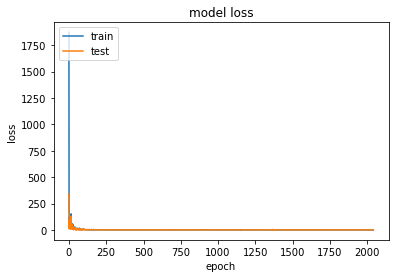

In [446]:
import tensorflow.keras.backend as KB
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.layers import Activation
adam = Adam(lr=0.001)
# def linear_custom(x):
#     tmp = KB.tanh(x) + 1
#     return tmp*4.5
# get_custom_objects().update({'linear_custom': Activation(linear_custom)})
def soft_acc(y_true, y_pred):
    return KB.mean(KB.equal(KB.round(y_true),KB.round(y_pred)))
# This returns a tensor
model = Sequential()
model.add(Dense(units=512,input_shape=(72,),activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(units=512,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=1024,activation='relu',kernel_initializer='normal'))
# model.add(Dense(units=512,activation='relu',kernel_initializer='normal'))
#model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='linear'))
es = EarlyStopping(monitor='val_loss',patience=500,restore_best_weights=True)
# This creates a model that includes
# the Input layer and three Dense layers
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mae',soft_acc])
train_history = model.fit(X, Y,validation_split=0.2, epochs=3000, batch_size=100,callbacks=[es])  # starts training
ploting(train_history,model,'model2')

In [447]:
import os
def ploting(train_history,model,modeldir):
    now = datetime.datetime.now()
    now = now.strftime("%Y-%m-%d_%H_%M_%S")
    os.mkdir('./static/'+modeldir)
    plot_model(model, to_file='./static/'+modeldir+'model'+now+'.png',show_shapes=True)
    plt.plot(train_history.history['loss']) 
    plt.plot(train_history.history['val_loss']) 
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left') 
    plt.savefig('./static/'+modeldir+'model_loss_'+now+'.png')
    plt.show()
    plt.plot(train_history.history['soft_acc'])
    plt.plot(train_history.history['val_soft_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left') 
    plt.savefig('./static/'+modeldir+'model_acurracy_'+now+'.png')
    plt.show()

In [363]:
now = datetime.datetime.now()
now = now.strftime("%Y-%m-%d_%H_%M_%S")
plot_model(model, to_file='./static/model'+now+'.png',show_shapes=True)

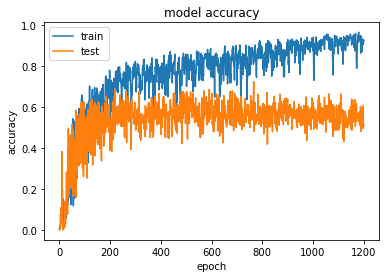

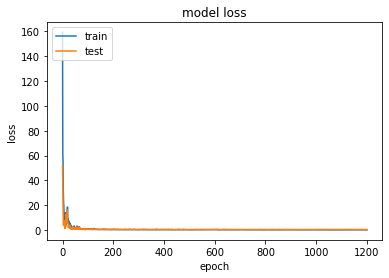

In [364]:
# summarize history for accuracy
plt.plot(train_history.history['soft_acc'])
plt.plot(train_history.history['val_soft_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig('./static/model_acurracy_'+now+'.png')
plt.show()
# summarize history for loss 
plt.plot(train_history.history['loss']) 
plt.plot(train_history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig('./static/model_loss_'+now+'.png')
plt.show()

In [448]:
err_func(transfer_label(np.reshape(model.predict(X_test),(Y_test.shape[0],))),Y_test)

0.234375

In [425]:
test_Y = transfer_label(np.reshape(model.predict(test_X),(test_X.shape[0],)))

In [426]:
test_Y

array([2., 1., 3., 1., 3., 2., 1., 4., 5., 2., 1., 2., 4., 3., 4., 3., 2.,
       1., 1., 2., 3., 4., 3., 2., 1., 3., 2., 4., 5., 3., 4., 2., 3., 5.,
       4., 5., 3., 4., 3., 2., 3., 2., 3., 4., 6., 2., 3., 3., 5., 5., 4.,
       4., 2., 5., 6., 3., 3., 5., 3., 4., 3., 4., 5., 5., 3., 4., 2., 2.,
       6., 4., 3., 6., 4., 2., 3., 4., 4., 6., 4., 4., 3., 3., 3., 4., 4.,
       5., 4., 3., 4., 3., 4., 5., 4., 4., 4., 3., 4., 4., 3., 5., 4., 4.,
       4., 5., 3., 6., 4., 5., 3., 2., 3., 3., 5., 4., 5., 3., 4., 3., 4.,
       6., 4., 5., 4., 4., 4., 3., 4., 5., 5., 3., 3., 3., 3., 5., 5., 4.,
       3., 4., 5., 4., 5., 5., 4., 2., 3., 3., 4., 5., 5., 6., 2., 2., 3.])

In [427]:
test_nolabel = pd.read_csv('./test_nolabel.csv')
test_label = pd.DataFrame()
test_label['arrival_date'] = test_nolabel['arrival_date']
test_label['label'] = test_Y.astype('int64')
test_label

,arrival_date,label
0,2017-04-01,2
1,2017-04-02,1
2,2017-04-03,3
3,2017-04-04,1
4,2017-04-05,3
...,...,...
148,2017-08-27,5
149,2017-08-28,6
150,2017-08-29,2
151,2017-08-30,2


In [428]:
test_label.to_csv('./test_label_dnn_mae_metric'+now+'.csv',index=False)

In [96]:
np.argmax(train_history.history['val_soft_acc'])

168

In [109]:
train_history.history['val_soft_acc'][575]

0.6528571

In [110]:
train_history.history['soft_acc'][575]

0.76055557

In [106]:
tmp = (np.array(train_history.history['val_soft_acc'])+np.array(train_history.history['soft_acc']))/2

In [108]:
np.argmax(tmp)

575

In [367]:
test.shape

(27859, 72)

In [462]:
# 全拿來 train
clf = RandomForestRegressor(oob_score=True).fit(X,Y)
Y_test_predict = clf.predict(test)
print('out of bag score:',clf.oob_score_)
# ******* predict adr、no agent ***********
# out of bag score: 0.6998593881224198
# ******* predict adr、with agent ***********
# out of bag score: 0.7148486662759064
# ******* predict adr、with agent，cut half features ***********
# out of bag score: 0.6889236846429683

out of bag score: 0.6889236846429683


In [463]:
Y_test_predict.shape

(27859,)

# LSTM

In [ ]:
im

# 再預測 revenue rank

In [464]:
test_data = pd.read_csv('./test.csv')
test_data['booking_total_revenue'] = Y_test_predict*(test_data['stays_in_week_nights']+test_data['stays_in_weekend_nights']+1)
# test_data['booking_total_revenue'] = Y_test_predict
test_data = combine_arrival_date(test_data)
test_data = test_data.groupby('arrival_date').sum()
test_data = test_data['booking_total_revenue']
test_data = test_data.values
test_data = np.reshape(test_data,(test_data.shape[0],1))

In [220]:
test_nolabel = pd.read_csv('./test_nolabel.csv')

In [221]:
train = pd.read_csv('./train.csv')
train_data,not_use = preprocess_x(train)
train_label = pd.read_csv('./train_label.csv').set_index('arrival_date').values
train_label = np.reshape(train_label,(train_label.shape[0],))

In [467]:
train_data.shape

(640, 1)

In [468]:
train_label.shape

(640,)

In [469]:
test_data.shape

(153, 1)

In [470]:
test_nolabel

,arrival_date
0,2017-04-01
1,2017-04-02
2,2017-04-03
3,2017-04-04
4,2017-04-05
...,...
148,2017-08-27
149,2017-08-28
150,2017-08-29
151,2017-08-30


#### LinearRegression 

In [222]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data,train_label,test_size=0.2,random_state=0)
clf = LinearRegression().fit(X_train,Y_train)
Y_val_predict = clf.predict(X_test)
err_func(transfer_label(Y_val_predict),Y_test)

0.1171875

#### LinearRegression with norm

In [472]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data,train_label,test_size=0.2,random_state=0)
clf = LinearRegression(normalize=True).fit(X_train,Y_train)
Y_val_predict = clf.predict(X_test)
err_func(transfer_label(Y_val_predict),Y_test)

0.1171875

#### OVR with SVC

In [282]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data,train_label,test_size=0.2,random_state=0)
clf = OneVsRestClassifier(svm.SVC()).fit(X_train,Y_train)
Y_val_predict = clf.predict(X_test)
err_func(Y_val_predict,Y_test)

0.1953125

Confusion matrix, without normalization
[[15  1  0  0  0  0  0]
 [ 1 23  2  0  0  0  0]
 [ 1  6 36  4  0  0  0]
 [ 0  0  1 20  2  0  0]
 [ 0  0  0  0  7  5  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3]]


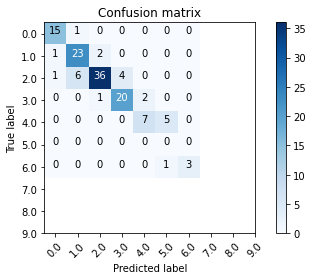

In [283]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_val_predict,Y_test)
plot_confusion_matrix(cm,classes=clf.classes_)
plt.show()

#### OVO with SVC

In [284]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data,train_label,test_size=0.2,random_state=0)
clf = OneVsOneClassifier(svm.SVC()).fit(X_train,Y_train)
Y_val_predict = clf.predict(X_test)
err_func(Y_val_predict,Y_test)

0.1484375

Confusion matrix, without normalization
[[15  1  0  0  0  0  0]
 [ 1 23  2  0  0  0  0]
 [ 1  6 36  3  0  0  0]
 [ 0  0  1 21  2  0  0]
 [ 0  0  0  0  7  1  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  3]]


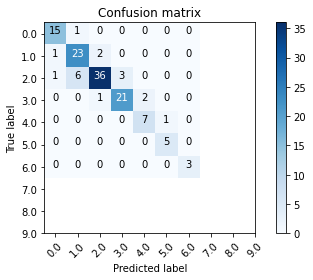

In [285]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_val_predict,Y_test)
plot_confusion_matrix(cm,classes=clf.classes_)
plt.show()

#### OVO with SVC with different hyperparameters

In [286]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_data,train_label,test_size=0.2,random_state=0)
#linear和 rbf : 0.1484375
#poly : 0.140625
#sigmoid : 1.78125
#C=1000 : 0.125
#C=10000 : 0.1328125
#degree high performance bad with large C
clf = OneVsOneClassifier(svm.SVC(kernel='poly',C=1000,degree=3)).fit(X_train,Y_train)
Y_val_predict = clf.predict(X_test)
err_func(Y_val_predict,Y_test)

0.125

#### RandomForest

In [287]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data,train_label,test_size=0.2,random_state=0)
clf = RandomForestRegressor(oob_score=True).fit(X_train,Y_train)
Y_val_predict = clf.predict(X_test)
mse = np.mean((Y_val_predict - Y_test) ** 2)
r_squared = clf.score(X_test, Y_test)
adj_r_squared = r_squared - (1 - r_squared) * (X_test.shape[1] / (X_test.shape[0] - X_test.shape[1] - 1))
mae = err_func(transfer_label(Y_val_predict),Y_test)
print('mean square error:',mse)
print('mean absolute error:',mae)
print('r2 score:',r_squared)
print('adjusted r2 score:',adj_r_squared)
print('out of bag score:',clf.oob_score_)

mean square error: 0.186678125
mean absolute error: 0.2265625
r2 score: 0.9079198458574181
adjusted r2 score: 0.9071890509832706
out of bag score: 0.9233861177974241


In [288]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(train_data,train_label,test_size=0.2,random_state=0)
clf = RandomForestClassifier(oob_score=True).fit(X_train,Y_train)
Y_val_predict = clf.predict(X_test)
mae = err_func(Y_val_predict,Y_test)
print('mean absolute error:',mse)
print('out of bag score:',clf.oob_score_)

mean absolute error: 0.186678125
out of bag score: 0.783203125


In [289]:
clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

# Test

In [290]:
clf = OneVsOneClassifier(svm.SVC(kernel='poly',C=1000,degree=3)).fit(train_data,train_label)
test_predict = clf.predict(test_data)

In [223]:
#LinearRegression才需要
clf = LinearRegression().fit(train_data,train_label)
test_predict = clf.predict(test_data)
test_predict = transfer_label(test_predict)

In [224]:
test_predict.astype('int64')

array([3, 2, 5, 2, 5, 3, 2, 6, 8, 4, 2, 3, 6, 5, 7, 5, 4, 2, 3, 3, 4, 6,
       4, 2, 1, 5, 4, 6, 8, 4, 5, 3, 4, 5, 6, 5, 3, 5, 3, 3, 4, 3, 4, 4,
       7, 3, 2, 4, 6, 6, 4, 4, 2, 4, 6, 3, 3, 6, 3, 4, 3, 4, 5, 6, 4, 5,
       3, 2, 7, 5, 3, 6, 5, 2, 3, 4, 4, 6, 4, 5, 3, 3, 4, 4, 4, 5, 5, 4,
       4, 3, 5, 5, 4, 5, 4, 2, 4, 3, 3, 5, 5, 4, 4, 3, 4, 6, 4, 5, 3, 2,
       3, 3, 5, 5, 5, 3, 4, 4, 4, 6, 3, 5, 4, 4, 4, 4, 5, 5, 6, 3, 3, 4,
       4, 6, 5, 4, 4, 5, 6, 5, 6, 5, 5, 2, 3, 4, 4, 6, 5, 7, 2, 2, 4],
      dtype=int64)

In [225]:
test_label = pd.DataFrame()
test_label['arrival_date'] = test_nolabel['arrival_date']
test_label['label'] = test_predict.astype('int64')
test_label

,arrival_date,label
0,2017-04-01,3
1,2017-04-02,2
2,2017-04-03,5
3,2017-04-04,2
4,2017-04-05,5
...,...,...
148,2017-08-27,5
149,2017-08-28,7
150,2017-08-29,2
151,2017-08-30,2


In [226]:
test_label.to_csv('./test_label_adr_dnn_linearRegression.csv',index=False)

In [980]:
?test_label.to_csv

In [991]:
?np.savetxt

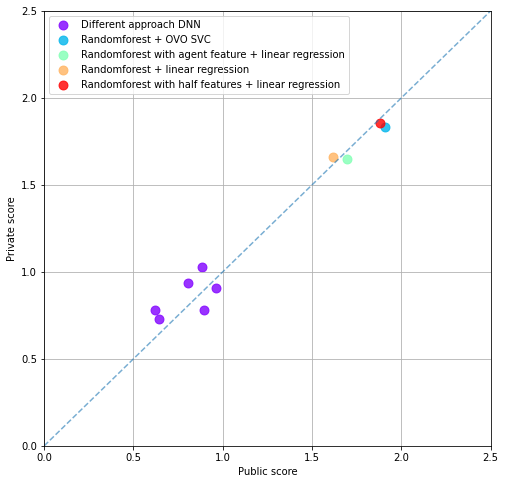

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
dnn_1 = (0.960526,0.909091)
dnn_2 = (0.618421,0.779221)
dnn_3 = (0.894737,0.779221)
dnn_4 = (0.644737,0.727273)
dnn_5 = (0.802632,0.935065)
dnn_adr_linear_rank = (0.881579,1.025974)
ovo_agent=(1.907895,1.831169)
linerar_agent = (1.697368,1.649351)
linear = (1.618421,1.662338)
linear_cut = (1.881579,1.857143)
x = [dnn_1[0],dnn_2[0],dnn_3[0],dnn_4[0],dnn_5[0],dnn_adr_linear_rank[0],ovo_agent[0],linerar_agent[0],linear[0],linear_cut[0]]
y = [dnn_1[1],dnn_2[1],dnn_3[1],dnn_4[1],dnn_5[1],dnn_adr_linear_rank[1],ovo_agent[1],linerar_agent[1],linear[1],linear_cut[1]]
plt.figure(figsize=(8,8))
plt.xlim(0,2.5)
plt.xlabel('Public score')
plt.ylabel('Private score')
plt.ylim(0,2.5)
colors = cm.rainbow(np.linspace(0, 1, 5))
plt.scatter(x[0:6], y[0:6], s=80,alpha=0.8,color=colors[0],label='Different approach DNN')
plt.scatter(x[6:7], y[6:7], s=80,alpha=0.8,color=colors[1],label='Randomforest + OVO SVC')
plt.scatter(x[7:8], y[7:8], s=80,alpha=0.8,color=colors[2],label='Randomforest with agent feature + linear regression')
plt.scatter(x[8:9], y[8:9], s=80,alpha=0.8,color=colors[3],label='Randomforest + linear regression')
plt.scatter(x[9:], y[9:], s=80,alpha=0.8,color=colors[4],label='Randomforest with half features + linear regression')
plt.plot([0,2.5],[0,2.5],alpha=0.6,linestyle='dashed')
plt.grid()
plt.legend()
plt.show()